# Predicting Redistribution Preferences: The Role of Educational Mobility, Social Attitudes, and Machine Learning Approaches

## Table of Contents

1. [Introduction](#1.-Introduction)  
2. [Data Collection & Overview](#2.-Data-Collection--Overview)  
   - [2-1. Data Collection and Integration](#2-1.-Data-Collection-and-Integration)  
   - [2-2. Structure of the Dataset](#2-2.-Structure-of-the-Dataset)  
   - [2-3. Justification for Early Data Splitting](#2-3.-Justification-for-Early-Data-Splitting)  
3. [Data Preprocessing & Visualization](#3.-Data-Preprocessing--Visualization)  
   - [3-1. Data Cleaning & Recoding with Visualization](#3-1.-Data-Cleaning--Recoding-with-Visualization)  
   - [3-2. Encoding and Transformations](#3-2.-Encoding-and-Transformations)  
   - [3-3. Data Finalization](#3-3.-Data-Finalization)  
4. [Model Development & Evaluation](#4.-Model-Development--Evaluation)  
   - [4-1. Data Preparation for Modelling](#4-1.-Data-Preparation-for-Modelling)  
   - [4-2. Baseline Model and Classification Strategy](#4-2.-Baseline-Model-and-Classification-Strategy)  
     - [4-2-1. Baseline Model Comparison (Multinomial VS OVA Logistic Regression)](#4-2-1.-Baseline-Model-Comparison-Multinomial-VS-OVA-Logistic-Regression)  
   - [4-3. Model Training and Model Comparison](#4-3.-Model-Training-and-Model-Comparison)  
     - [4-3-1. K-Nearest Neighbors (KNN)](#4-3-1.-K-Nearest-Neighbors-KNN)  
     - [4-3-2. Support Vector Machine (SVM)](#4-3-2.-Support-Vector-Machine-SVM)  
     - [4-3-3. Naïve Bayes](#4-3-3.-Naïve-Bayes)  
     - [4-3-4. Random Forest](#4-3-4.-Random-Forest)  
     - [4-3-5. XGBoost and LightGBM](#4-3-5.-XGBoost-and-LightGBM)  
     - [4-3-6. Ensemble Method](#4-3-6.-Ensemble-Method)  
     - [4-3-7. Neural Network](#4-3-7.-Neural-Network)  
   - [4-4. Model Selection and Fine-Tuning](#4-4.-Model-Selection-and-Fine-Tuning)  
     - [4-4-1. LightGBM Fine-Tuning](#4-4-1.-LightGBM-Fine-Tuning)  
     - [4-4-2. Multi-Model Ensemble Fine-Tuning](#4-4-2.-Multi-Model-Ensemble-Fine-Tuning)  
     - [4-4-3. Neural Network Fine-Tuning](#4-4-3.-Neural-Network-Fine-Tuning)  
   - [4-5. Final Model Performance and Interpretation](#4-5.-Final-Model-Performance-and-Interpretation)  
     - [4-5-1. Final Model Performance](#4-5-1.-Final-Model-Performance)  
     - [4-5-2. Final Model Interpretation](#4-5-2.-Final-Model-Interpretation)  
5. [Discussion and Limitation](#5.-Discussion-and-Limitation)  
6. [Conclusion](#6.-Conclusion)  
7. [References](#7.-References)  
8. [Appendix](#8.-Appendix)  
   - [8-1. Table](#8-1.-Table)  


## 1. Introduction
<a id="introduction"></a>

Income inequality remains a critical issue worldwide, shaping economic stability and social cohesion. Preferences for income redistribution, which reflect whether individuals support or oppose government interventions to reduce income disparities. They are influenced by a range of factors, including intergenerational educational mobility, social attitudes, and sociodemographic characteristics (Alesina & Giuliano, 2011; Jerrim & Macmillan, 2015). Intergenerational educational mobility refers to the differences between an individual’s level of education and that of their parents, capturing whether someone attains higher, lower, or similar educational achievements compared to their family background. Prior research suggests that individuals who experience upward educational mobility often perceive economic systems as meritocratic, which may reduce their support for redistribution (Piketty, 1995; Roemer, 1998). Conversely, those with limited mobility or downward mobility may favor redistributive policies to address structural inequalities (Chetty et al., 2014). While these relationships have been examined in different socioeconomic contexts, the extent to which educational mobility predicts redistribution preferences relative to other determinants, such as political ideology, economic self-interest, and perceptions of fairness, remains an open question (Alesina & La Ferrara, 2005; Corneo & Grüner, 2002).

This study contributes to the broader discourse on economic inequality, social mobility, and policymaking by employing predictive modeling techniques to examine how intergenerational educational mobility, social attitudes, and sociodemographic factors influence individuals’ preferences for income redistribution. While previous research has primarily explored correlations between these factors and redistribution attitudes, this study adopts a comparative modeling approach to evaluate the predictive strength of different statistical and machine learning techniques. By assessing the performance of multiple models, this research aims to determine the most effective methodology for predicting redistribution preferences and to provide insights into the relative importance of different predictors. The findings offer valuable implications for policymakers seeking to understand the social and economic drivers of public support for redistributive policies, contributing to the development of more equitable economic frameworks


## 2. Data Collection & Overview
<a id="data-preparation"></a>
### 2-1. Data Collection and Integration
<a id="data-sourcing"></a>

In this study, analysis was performed using a total of two datasets, and necessary variables were extracted and integrated from each dataset. The primary dataset was sourced from the European Social Survey Multilevel data (ESS MD) Round 10, which collects cross-sectional data on public attitudes, values, and their interactions with European institutions and social indicators. Focusing on demographic and socioeconomic characteristics across 22 countries, this dataset included key variables such as preferences for income redistribution and educational mobility from surveys conducted between 2020 and 2022.

The second supporting dataset was extracted from the 2021 Regional Level EQI Dataset provided by the Quality of Government (QoG) Institute. This data contains European Quality Index (EQI) information at the regional level, which was combined with the first dataset to supplement the variables necessary to analyze the impact of social attitudes on the relationship between educational mobility and income redistribution preferences.

Through this data integration process, the necessary variables were organized and combined so that the research question, "How do social attitudes, trust, educational mobility, and perceptions of economic inequality affect preferences for income redistribution?" could be explored in more depth. 

In [767]:
import os
os.getcwd()


'/Users/dundun/Downloads'

In [769]:
import sys
sys.executable


'/Users/dundun/myenv/bin/python'

In [771]:
#Import libraries and modules needed for the project

# Standard Libraries
import os
import numpy as np
import pandas as pd
import shap

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine Learning: Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

# Machine Learning: Model Selection & Evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix, precision_recall_curve
)

# Machine Learning: Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb

# Machine Learning: Feature Engineering & Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE

# Deep Learning (TensorFlow & Keras)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from scikeras.wrappers import KerasClassifier
from kerastuner.tuners import RandomSearch

### 2-2. Structure of the Dataset
<a id="data-overview"></a>

We combined the main and supporting datasets using the NUTS2 regional identifier, focusing on selected countries present in both datasets, which was stored as "combined_data.csv", an uncleaned version of the final dataset.

In [4]:
# Our combined dataset has 24511 rows and 32 column over 14 countries.
# These are a large and representative sample of European countries, both in terms of welfare system and history.

data_file = "combined_data.csv"
combined_data = pd.read_csv(data_file, low_memory=False)

print(f"The combined dataset has {combined_data.shape[0]} rows and {combined_data.shape[1]} columns.")
combined_data.info()

The combined dataset has 24511 rows and 32 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24511 entries, 0 to 24510
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   idno                  24511 non-null  int64  
 1   gincdif               24511 non-null  int64  
 2   nuts2                 21871 non-null  object 
 3   eisced                24511 non-null  int64  
 4   eiscedf               24511 non-null  int64  
 5   eiscedm               24511 non-null  float64
 6   domicil               24511 non-null  int64  
 7   n2_unrao25_2022       21862 non-null  float64
 8   wkhtot                24511 non-null  int64  
 9   ipeqopt               24511 non-null  int64  
 10  inprdsc               24511 non-null  int64  
 11  ppltrst               24511 non-null  int64  
 12  trstprl               24511 non-null  int64  
 13  gndr                  24511 non-null  int64  
 14  agea              

In [6]:
# 3. Quick look at the outcome variable (gincidif)
#    "gincidif" is the variable for attitude to income redistribution
print("\nOutcome variable (gincidif) distribution:")
print(combined_data["gincdif"].value_counts(dropna=False).sort_index())


Outcome variable (gincidif) distribution:
gincdif
1     7703
2    10186
3     3738
4     1949
5      587
7       29
8      289
9       30
Name: count, dtype: int64


In [8]:
# ========== 2. OUTCOME VARIABLE (gincidif) ==========

print("\n=== Outcome Variable: gincidif (Attitude to Income Redistribution) ===")
print("Value counts (including potential placeholders):")
print(combined_data["gincdif"].value_counts(dropna=False).sort_index().head(15))


=== Outcome Variable: gincidif (Attitude to Income Redistribution) ===
Value counts (including potential placeholders):
gincdif
1     7703
2    10186
3     3738
4     1949
5      587
7       29
8      289
9       30
Name: count, dtype: int64


In [10]:
# ========== 3. MAIN PREDICTORS FOR EDUCATIONAL MOBILITY ==========

# Education columns: eisced (respondent's education), eiscedf (father's), eiscedm (mother's).
education_cols = ["eisced", "eiscedf", "eiscedm"]
for col in education_cols:
    if col in combined_data.columns:
        print(f"\n=== {col} Distribution ===")
        print(combined_data[col].value_counts(dropna=False).sort_index().head(15))


=== eisced Distribution ===
eisced
1     1791
2     3623
3     3206
4     7054
5     2401
6     2796
7     3483
55      41
77      64
88      24
99      28
Name: count, dtype: int64

=== eiscedf Distribution ===
eiscedf
1     6023
2     4580
3     3473
4     4154
5     1358
6     1066
7     1801
55      57
77     380
88    1613
99       6
Name: count, dtype: int64

=== eiscedm Distribution ===
eiscedm
1.0     6710
2.0     5283
3.0     2689
4.0     4553
5.0     1385
6.0     1264
7.0     1227
55.0      32
77.0     361
88.0    1001
99.0       6
Name: count, dtype: int64


In [12]:
# ========== 4. ADDITIONAL KEY VARIABLES TO EXPLORE ==========

# Define your categorical and numerical columns
cat_vars = ["domicil", "ipeqopt", "inprdsc", "ppltrst", "trstprl"]
num_vars = ["eqi21_n2", "n2_unrao25_2022", "wkhtot"]

print("\n===== CATEGORICAL VARIABLES OVERVIEW =====")
for col in cat_vars:
    if col in combined_data.columns:
        print(f"\n--- {col} ---")
        # Show the first few categories by sorted index
        val_counts = combined_data[col].value_counts(dropna=False).sort_index()
        print("Value counts (sorted by category):")
        print(val_counts.head(15))  # just limiting to 15 in case of many categories
    else:
        print(f"[Warning] {col} not found in the dataset.")

print("\n===== NUMERICAL VARIABLES OVERVIEW =====")
for col in num_vars:
    if col in combined_data.columns:
        print(f"\n--- {col} ---")
        print("Descriptive stats:")
        print(combined_data[col].describe())
    else:
        print(f"[Warning] {col} not found in the dataset.")



===== CATEGORICAL VARIABLES OVERVIEW =====

--- domicil ---
Value counts (sorted by category):
domicil
1    5247
2    1977
3    7769
4    8404
5    1074
7      21
8       7
9      12
Name: count, dtype: int64

--- ipeqopt ---
Value counts (sorted by category):
ipeqopt
1    7809
2    9191
3    4778
4    1632
5     590
6     178
7      95
8     207
9      31
Name: count, dtype: int64

--- inprdsc ---
Value counts (sorted by category):
inprdsc
0     1673
1     4802
2     6054
3     5380
4     4723
5      805
6      593
77     171
88     281
99      29
Name: count, dtype: int64

--- ppltrst ---
Value counts (sorted by category):
ppltrst
0     1854
1     1019
2     1749
3     2515
4     2273
5     4476
6     2741
7     3755
8     2767
9      771
10     498
77      19
88      66
99       8
Name: count, dtype: int64

--- trstprl ---
Value counts (sorted by category):
trstprl
0     3066
1     1295
2     2143
3     2669
4     2190
5     4196
6     2729
7     2773
8     1935
9      602
10     4

In [14]:
# ========== 5. DETECT PLACEHOLDER MISSING VALUES ==========

# List of known placeholders in your dataset
placeholders = [7, 8, 9, 55, 77, 88, 99, 666, 777, 888, 999]

print("\n=== Checking for placeholder codes in each column ===")
for col in combined_data.columns:
    # Only check if column is numeric or object with likely numeric codes
    if pd.api.types.is_numeric_dtype(combined_data[col]) or pd.api.types.is_object_dtype(combined_data[col]):
        counts = {}
        for ph in placeholders:
            ph_count = (combined_data[col] == ph).sum()
            if ph_count > 0:
                counts[ph] = ph_count
        if counts:
            print(f"{col}: {counts}")



=== Checking for placeholder codes in each column ===
gincdif: {7: np.int64(29), 8: np.int64(289), 9: np.int64(30)}
eisced: {7: np.int64(3483), 55: np.int64(41), 77: np.int64(64), 88: np.int64(24), 99: np.int64(28)}
eiscedf: {7: np.int64(1801), 55: np.int64(57), 77: np.int64(380), 88: np.int64(1613), 99: np.int64(6)}
eiscedm: {7: np.int64(1227), 55: np.int64(32), 77: np.int64(361), 88: np.int64(1001), 99: np.int64(6)}
domicil: {7: np.int64(21), 8: np.int64(7), 9: np.int64(12)}
n2_unrao25_2022: {9: np.int64(411)}
wkhtot: {7: np.int64(29), 8: np.int64(118), 9: np.int64(28), 55: np.int64(234), 77: np.int64(4), 666: np.int64(2287), 777: np.int64(414), 888: np.int64(1575), 999: np.int64(37)}
ipeqopt: {7: np.int64(95), 8: np.int64(207), 9: np.int64(31)}
inprdsc: {77: np.int64(171), 88: np.int64(281), 99: np.int64(29)}
ppltrst: {7: np.int64(3755), 8: np.int64(2767), 9: np.int64(771), 77: np.int64(19), 88: np.int64(66), 99: np.int64(8)}
trstprl: {7: np.int64(2773), 8: np.int64(1935), 9: np.in

In [16]:
# ========== 6. CHECK NaN MISSING VALUES ==========

print("\n=== NaN Missing Values per Column ===")
missing_counts = combined_data.isna().sum()
print(missing_counts[missing_counts > 0].sort_values(ascending=False))


=== NaN Missing Values per Column ===
n2_unrao25_2022    2649
n2_unrao25_2020    2649
n2_unrao25_2021    2649
nuts2              2640
dtype: int64


**The dependent variable (`inc_redist`) is derived from respondents’ answers to the survey question:**  
*"The government should take measures to reduce differences in income levels."*

Originally measured on a five-point Likert scale, responses were recoded into **three categories**, following established conventions in redistribution preference research (Corneo & Grüner, 2002; Ohtake & Tomioka, 2004):

- **1: Agree/Strongly Agree** (Support redistribution)  
- **2: Neutral**  
- **3: Disagree/Strongly Disagree** (Oppose redistribution)

This categorical structure frames the study as a **classification task**, aiming to predict whether an individual **supports**, **remains neutral**, or **opposes** income redistribution policies.
es.


In [18]:
#Create 'inc_redist' from 'gincidif' (dependent variable: Preference for income redistribution)

# Replace non-response codes with NaN
non_response_codes = [7, 8, 9]
combined_data['gincdif'] = combined_data['gincdif'].replace(non_response_codes, np.nan)

# Recode the outcome variable into 3 classes
def recode_gincdif(x):
    if pd.isna(x):
        return np.nan
    if x in [1, 2]:
        return 1  # Agree/Strongly Agree
    elif x == 3:
        return 2  # Neutral
    elif x in [4, 5]:
        return 3  # Disagree/Strongly Disagree
    else:
        return np.nan

combined_data['inc_redist'] = combined_data['gincdif'].apply(recode_gincdif)

# Drop rows where the target is missing
combined_data_clean = combined_data.dropna(subset=['inc_redist']).copy()
combined_data_clean['inc_redist'] = combined_data_clean['inc_redist'].astype(int)

# Check distribution
print("Final 'inc_redist' value counts:")
print(combined_data_clean['inc_redist'].value_counts())

Final 'inc_redist' value counts:
inc_redist
1    17889
2     3738
3     2536
Name: count, dtype: int64


A key challenge in this classification task is the class imbalance observed in the outcome variable. The Figure 1 below shows the distribution of inc_redist, which indicates that around **74%** of respondents support redistribution, while **15%** are neutral and only **10%** oppose it. This imbalance poses potential issues for model training, as standard classification algorithms may be biased toward the majority class. 

/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_39755/3470169329.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='inc_redist_label', data=combined_data_clean, palette='Blues')


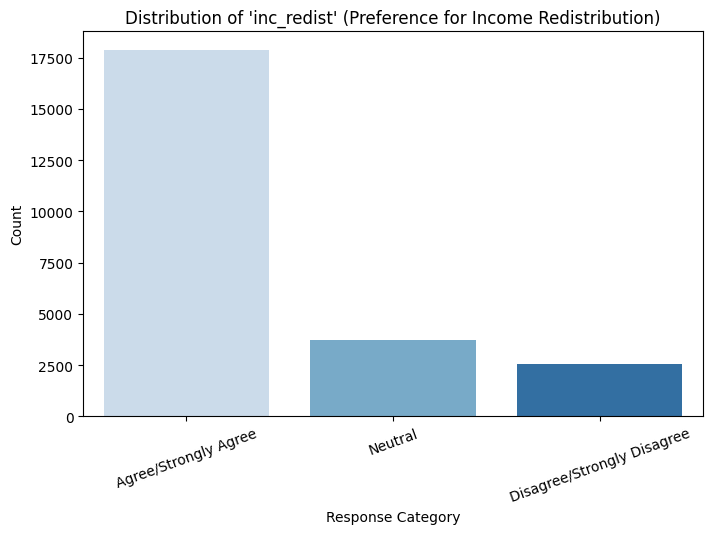

In [20]:
# Define category labels
labels = {
    1: "Agree/Strongly Agree",
    2: "Neutral",
    3: "Disagree/Strongly Disagree"
}

# Map integer values to category labels
combined_data_clean['inc_redist_label'] = combined_data_clean['inc_redist'].map(labels)

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='inc_redist_label', data=combined_data_clean, palette='Blues')

# Customize the plot
plt.title("Distribution of 'inc_redist' (Preference for Income Redistribution)")
plt.xlabel("Response Category")
plt.ylabel("Count")
plt.xticks(rotation=20)  # Rotate labels for better readability

# Show the plot
plt.show()


### 2-3. Justification for Early Data Splitting
<a id="train-test-split"></a>
Given the imbalance in inc_redist, an early train-test split was performed before data preprocessing to ensure proportional class representation across both subsets. Performing the split at this stage mitigates the risk of data leakage, which could occur if transformations such as scaling, encoding, or imputation were applied to the entire dataset before separation. By stratifying the split, the study preserves the natural distribution of the outcome variable across training and test sets, ensuring that the classification models are evaluated on a dataset that reflects real-world class proportions.
This approach enhances the generalizability of the model and provides a more robust assessment of its predictive performance. The final split resulted in a training set of 19,330 observations and a test set of 4,833 observations, both maintaining the class distribution seen in the full dataset.


In [22]:
# Split the data while stratifying by the outcome variable 'inc_redist'
train_set, test_set = train_test_split(
    combined_data_clean,
    test_size=0.2,
    random_state=42,
    stratify=combined_data_clean['inc_redist']
)

In [24]:
# Check target distribution in training set
print("Train set 'inc_redist' distribution (proportions):")
print(train_set['inc_redist'].value_counts(normalize=True))

# Check target distribution in test set
print("\nTest set 'inc_redist' distribution (proportions):")
print(test_set['inc_redist'].value_counts(normalize=True))


Train set 'inc_redist' distribution (proportions):
inc_redist
1    0.740352
2    0.154682
3    0.104966
Name: proportion, dtype: float64

Test set 'inc_redist' distribution (proportions):
inc_redist
1    0.740327
2    0.154769
3    0.104904
Name: proportion, dtype: float64


In [26]:
# Summary statistics for the training set
print("\nTraining set summary:")
print(train_set.describe())

# Summary statistics for the test set
print("\nTest set summary:")
print(test_set.describe())



Training set summary:
               idno       gincdif        eisced       eiscedf       eiscedm  \
count  19330.000000  19330.000000  19330.000000  19330.000000  19330.000000   
mean   29144.227781      2.070771      4.595965      9.698914      7.492706   
std    21023.814306      1.003723      6.257931     22.594047     18.978006   
min    10002.000000      1.000000      1.000000      1.000000      1.000000   
25%    15618.000000      1.000000      3.000000      2.000000      1.000000   
50%    21223.000000      2.000000      4.000000      3.000000      3.000000   
75%    26987.750000      3.000000      6.000000      5.000000      4.000000   
max    93040.000000      5.000000     99.000000     99.000000     99.000000   

            domicil  n2_unrao25_2022        wkhtot       ipeqopt  \
count  19330.000000     17256.000000  19330.000000  19330.000000   
mean       2.928298         4.235420    164.103466      2.186032   
std        1.218756         1.809205    275.886266      1.234

In [28]:
# Checking the shape of train/test set
print("\nTraining set shape:", train_set.shape)
print("Test set shape:", test_set.shape)



Training set shape: (19330, 34)
Test set shape: (4833, 34)


In [30]:
# Check missing values in training set
print("\nMissing values in training set:")
print(train_set.isna().sum())

# Check missing values in test set
print("\nMissing values in test set:")
print(test_set.isna().sum())



Missing values in training set:
idno                       0
gincdif                    0
nuts2                   2067
eisced                     0
eiscedf                    0
eiscedm                    0
domicil                    0
n2_unrao25_2022         2074
wkhtot                     0
ipeqopt                    0
inprdsc                    0
ppltrst                    0
trstprl                    0
gndr                       0
agea                       0
cntry                      0
marsts                     0
chldhhe                    0
uemp3m                     0
mbtru                      0
hinctnta                   0
c_gini_2022                0
c_effectiveness_2022       0
n2_unrao25_2020         2074
n2_unrao25_2021         2074
c_gini_2020                0
c_gini_2021                0
c_effectiveness_2020       0
c_effectiveness_2021       0
eqi21_n2                   0
eqi21_n2_lowME             0
eqi21_n2_highME            0
inc_redist                 0
inc_redist

## 3. Data Preprocessing & Visualization
<a id="data-cleaning-for-dependent-independent-variables"></a>
### 3-1. Data Cleaning and Recoding with Visualization
<a id="data-cleaning-for-dependent-independent-variables"></a>

The data underwent systematic cleaning and recoding to ensure consistency, address missing values, and prepare variables for analysis. For categorical variables, responses were consolidated into meaningful categories to improve interpretability. This process involved merging similar response groups and converting special codes for non-responses, such as refusals or "don't know" answers, to missing values (NaN). Continuous variables were restricted to reasonable ranges to mitigate the influence of extreme values, with outliers such as unrealistically high weekly working hours being set to NaN. Missing values were handled cautiously to avoid unnecessary data loss. Instead of removing entire observations, missing values were temporarily retained to allow for imputation or selective exclusion during analysis. 

Educational mobility, a key explanatory variable, measures the difference between an individual’s highest attained education level and that of their parents. Based on the International Standard Classification of Education (ISCED) [0,6] scale, it was rescaled to a 13-point scale [0,12], where 6 represents no mobility, higher values indicate upward mobility, and lower values signify downward mobility. Respondents under 25 were excluded to ensure completed education levels.

In [34]:
# ================================
# Step 1: Define Educational Mobility Cleaning Function
# ================================
def clean_educational_mobility(df):
    """
    Cleans and processes educational mobility variables:
    - Filters respondents aged 25 or older.
    - Recodes ISCED education levels (1-7 scale → 0-6 scale).
    - Computes educational mobility for father and mother.
    - Creates an average educational mobility measure.
    - Categorizes mobility into 'Neutral' (1), 'Downward' (2), 'Upward' (3).
    - Drops rows with missing values in `educ_mob_avg` and `educ_mob_avg_category`.
    """
    df = df.copy()  # Work on a copy

    # Step 1: Remove respondents younger than 25
    if 'agea' in df.columns:
        df = df[df['agea'] >= 25].reset_index(drop=True)
    else:
        print("Warning: 'agea' column not found. Skipping age filter.")

    # Step 2: Recode ISCED education levels (1-7 → 0-6 scale)
    def recode_education(value):
        if value in [0, 55, 77, 88, 99]:  # Invalid/missing codes
            return np.nan
        return value - 1  # Shift to 0-6 scale

    # List of education columns (respondent, father, mother)
    edu_cols = ['eisced', 'eiscedf', 'eiscedm']
    for col in edu_cols:
        if col in df.columns:
            df[f"{col}_recode"] = df[col].apply(recode_education)
        else:
            print(f"Warning: Column '{col}' not found.")

    # Rename the recoded columns
    df.rename(columns={'eisced_recode': 'resp_ed', 'eiscedf_recode': 'fath_ed', 'eiscedm_recode': 'moth_ed'}, inplace=True)

    # Step 3: Compute Educational Mobility
    if {'resp_ed', 'fath_ed', 'moth_ed'}.issubset(df.columns):
        df['educ_mob_father'] = df['resp_ed'] - df['fath_ed'] + 6
        df['educ_mob_mother'] = df['resp_ed'] - df['moth_ed'] + 6

        # Handle missing values: Set mobility to NaN if parent education is missing
        df.loc[df[['resp_ed', 'fath_ed']].isnull().any(axis=1), 'educ_mob_father'] = np.nan
        df.loc[df[['resp_ed', 'moth_ed']].isnull().any(axis=1), 'educ_mob_mother'] = np.nan

    # Step 4: Compute Average Educational Mobility
    df['educ_mob_avg'] = df[['educ_mob_father', 'educ_mob_mother']].mean(axis=1)

    # Step 5: Categorize Educational Mobility (1=Neutral, 2=Downward, 3=Upward)
    def categorize_avg_mobility(value):
        if pd.isna(value):
            return np.nan
        elif value == 6:
            return 0  # Neutral
        elif value < 6:
            return 1  # Downward
        else:
            return 2  # Upward

    df['educ_mob_avg_category'] = df['educ_mob_avg'].apply(categorize_avg_mobility)

    # **Step 6: Drop Missing Values in Key Predictor (`educ_mob_avg` and `educ_mob_avg_category`)**
    df = df.dropna(subset=['educ_mob_avg', 'educ_mob_avg_category']).reset_index(drop=True)


    return df

# ================================
# Step 2: Apply Cleaning to the Training Set
# ================================
train_set_cleaned = clean_educational_mobility(train_set)

# Step 3: Apply the SAME transformation to the test set
test_set_cleaned = clean_educational_mobility(test_set)

# ================================
# Step 3: Check Processed Output (Training Set)
# ================================
print(train_set_cleaned[['resp_ed', 'fath_ed', 'moth_ed', 'educ_mob_father', 'educ_mob_mother', 'educ_mob_avg', 'educ_mob_avg_category']].head())

# Optional: Check the test set as well (to ensure consistency)
print(test_set_cleaned[['resp_ed', 'fath_ed', 'moth_ed', 'educ_mob_father', 'educ_mob_mother', 'educ_mob_avg', 'educ_mob_avg_category']].head())

   resp_ed  fath_ed  moth_ed  educ_mob_father  educ_mob_mother  educ_mob_avg  \
0      3.0      0.0      0.0              9.0              9.0           9.0   
1      3.0      0.0      0.0              9.0              9.0           9.0   
2      1.0      1.0      0.0              6.0              7.0           6.5   
3      1.0      2.0      1.0              5.0              6.0           5.5   
4      0.0      0.0      0.0              6.0              6.0           6.0   

   educ_mob_avg_category  
0                    2.0  
1                    2.0  
2                    2.0  
3                    1.0  
4                    0.0  
   resp_ed  fath_ed  moth_ed  educ_mob_father  educ_mob_mother  educ_mob_avg  \
0      2.0      1.0      1.0              7.0              7.0           7.0   
1      6.0      6.0      6.0              6.0              6.0           6.0   
2      5.0      3.0      0.0              8.0             11.0           9.5   
3      6.0      6.0      6.0         

In [36]:
print(train_set_cleaned.columns)  # Check immediately after transformation
print(test_set_cleaned.columns) 


Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl',
       'gndr', 'agea', 'cntry', 'marsts', 'chldhhe', 'uemp3m', 'mbtru',
       'hinctnta', 'c_gini_2022', 'c_effectiveness_2022', 'n2_unrao25_2020',
       'n2_unrao25_2021', 'c_gini_2020', 'c_gini_2021', 'c_effectiveness_2020',
       'c_effectiveness_2021', 'eqi21_n2', 'eqi21_n2_lowME', 'eqi21_n2_highME',
       'inc_redist', 'inc_redist_label', 'resp_ed', 'fath_ed', 'moth_ed',
       'educ_mob_father', 'educ_mob_mother', 'educ_mob_avg',
       'educ_mob_avg_category'],
      dtype='object')
Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl',
       'gndr', 'agea', 'cntry', 'marsts', 'chldhhe', 'uemp3m', 'mbtru',
       'hinctnta', 'c_gini_2022', 'c_effectiveness_2022', 'n2_unrao25_2020',
       'n2_unrao25_2021', 'c_gini_20

Below shows the visualization to justify the mobility measure. Unlike prior studies that relied solely on the father’s education, this analysis incorporates both parents. A comparative assessment (**Box Plot**)reveals significant discrepancies between father-based and combined-parent measures, with statistical tests (**Bar Chart**) confirming that using both parents yields the strongest association with income redistribution preferences. Thus, the final model employs the averaged parental mobility measure.

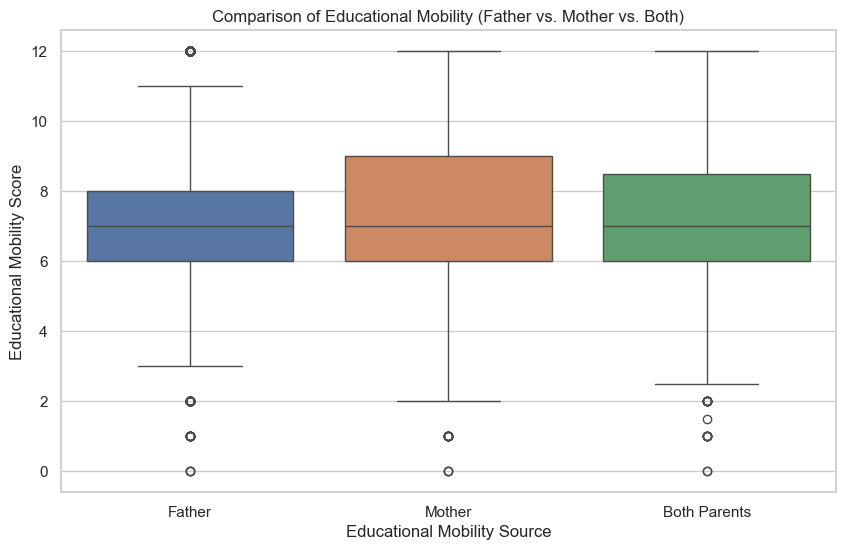

In [76]:
# Set visualization style
sns.set(style="whitegrid")

# Box Plot: Educational Mobility Relative to Father vs. Mother vs. Both**
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_set_cleaned[["educ_mob_father", "educ_mob_mother", "educ_mob_avg"]])

plt.xlabel("Educational Mobility Source")
plt.ylabel("Educational Mobility Score")
plt.title("Comparison of Educational Mobility (Father vs. Mother vs. Both)")
plt.xticks(ticks=[0, 1, 2], labels=["Father", "Mother", "Both Parents"])
plt.show()


In [765]:
def compute_chi_square(df, col1, col2):
    """
    Computes the Chi-Square test for two categorical variables.
    
    Parameters:
    df (pd.DataFrame): The dataset.
    col1 (str): The first categorical column.
    col2 (str): The second categorical column.

    Returns:
    tuple: (Chi-square statistic, p-value)
    """
    contingency_table = pd.crosstab(df[col1], df[col2])  # Create contingency table
    chi2, p, _, _ = chi2_contingency(contingency_table)  # Perform Chi-square test
    return chi2, p  # Return Chi-square statistic and p-value


/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_39755/4056142594.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Mobility Source", y="Chi-Square Value", data=chi_values, palette="Blues")


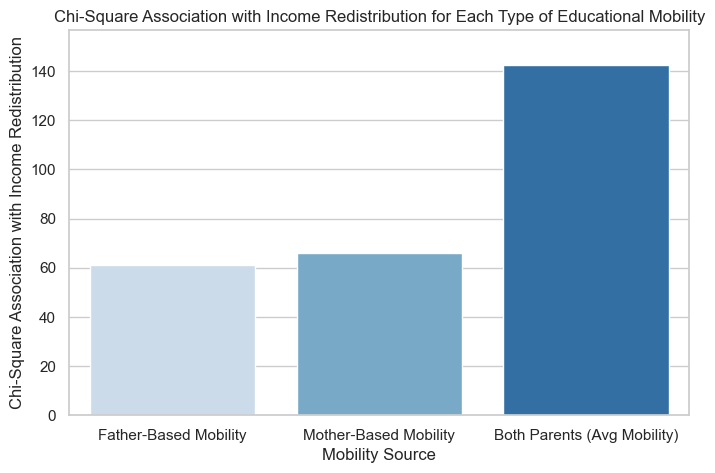

               Mobility Source  Chi-Square Value       p-value
0        Father-Based Mobility         61.055011  4.526393e-05
1        Mother-Based Mobility         65.857701  9.103081e-06
2  Both Parents (Avg Mobility)        142.411515  8.651230e-12


In [66]:
# Test how strongly different mobility versions explain income redistribution preference**
chi_father = compute_chi_square(train_set_cleaned, "educ_mob_father", "inc_redist")  
chi_mother = compute_chi_square(train_set_cleaned, "educ_mob_mother", "inc_redist")  
chi_both = compute_chi_square(train_set_cleaned, "educ_mob_avg", "inc_redist")  # Both Parents

# Convert to DataFrame for visualization
chi_values = pd.DataFrame({
    "Mobility Source": ["Father-Based Mobility", "Mother-Based Mobility", "Both Parents (Avg Mobility)"],
    "Chi-Square Value": [chi_father[0], chi_mother[0], chi_both[0]],
    "p-value": [chi_father[1], chi_mother[1], chi_both[1]]
})

# Bar Chart: Strength of Mobility Association with `inc_redist`**
plt.figure(figsize=(8, 5))
sns.barplot(x="Mobility Source", y="Chi-Square Value", data=chi_values, palette="Blues")

plt.xlabel("Mobility Source")
plt.ylabel("Chi-Square Association with Income Redistribution")
plt.title("Chi-Square Association with Income Redistribution for Each Type of Educational Mobility")
plt.ylim(0, max(chi_values["Chi-Square Value"]) * 1.1)  # Scaling for visibility
plt.show()

# Print p-values to check significance**
print(chi_values)


The distribution of educational mobility is centered around 6, reflecting limited movement for many individuals but with notable variation in both directions. This underscores the relevance of mobility as a key factor in socioeconomic analysis. 

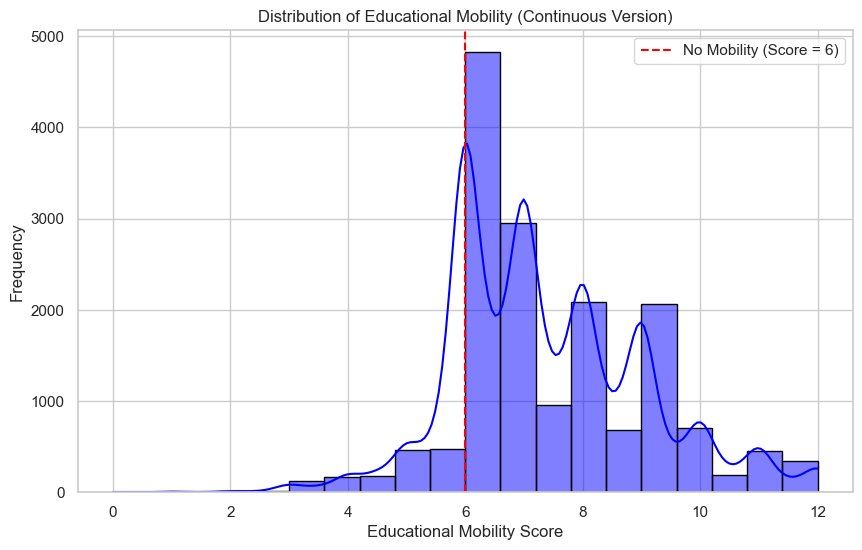

In [47]:
# Visualize the Educational Mobility Distribution to show the full range and information

# Set visualization style
sns.set(style="whitegrid")

# **1. Histogram with Density Plot: Educational Mobility Distribution**
plt.figure(figsize=(10, 6))
sns.histplot(train_set_cleaned["educ_mob_avg"], bins=20, kde=True, color="blue", edgecolor="black")

plt.xlabel("Educational Mobility Score")
plt.ylabel("Frequency")
plt.title("Distribution of Educational Mobility (Continuous Version)")
plt.axvline(x=6, color="red", linestyle="--", label="No Mobility (Score = 6)")
plt.legend()
plt.show()


Each parent's educational mobility was averaged, and the average mobility variable (`educ_mob_avg`) of parents was newly created and added to the data. For visualisation, the average mobility of parents was categorized into netural(1), downward(2), and upward(3). 


 **Summary for Educational Mobility Categories (Training Set)**
       Frequency  Percentage (%)
0.0         3617       21.683352
1.0         1426        8.548648
2.0        11638       69.768000
Total      16681      100.000000


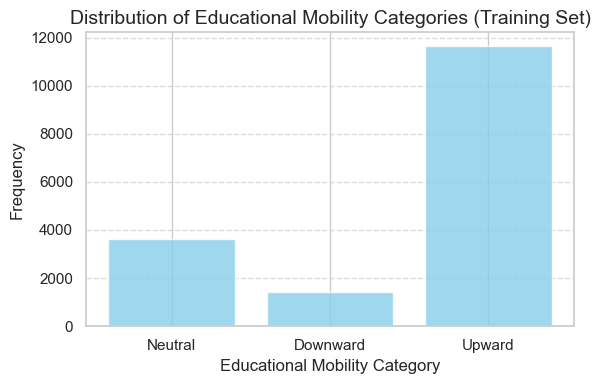

In [51]:
# Summary Statistics for Categorica Educational Mobility

# ===============================
# Summary Function for Educational Mobility
# ===============================
def calculate_summary(data, column_name):
    """
    Compute frequency and percentage summary for a given categorical variable.
    """
    freq = data[column_name].value_counts(dropna=False, sort=False)
    percentage = (freq / freq.sum()) * 100
    summary = pd.DataFrame({
        'Frequency': freq,
        'Percentage (%)': percentage
    }).sort_index()
    
    # Add total row
    total_row = pd.DataFrame({
        'Frequency': [freq.sum()],
        'Percentage (%)': [100.0]
    }, index=['Total'])
    
    return pd.concat([summary, total_row])

# ===============================
# Display Summary for Educational Mobility Categories
# ===============================
print("\n **Summary for Educational Mobility Categories (Training Set)**")
print(calculate_summary(train_set_cleaned, 'educ_mob_avg_category'))

# ===============================
# Visualization: Distribution of Educational Mobility
# ===============================
category_labels = {0: "Neutral", 1: "Downward", 2: "Upward"}
category_counts = train_set_cleaned['educ_mob_avg_category'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(x=[category_labels[k] for k in category_counts.index], height=category_counts.values, color='skyblue', alpha=0.8)
plt.title("Distribution of Educational Mobility Categories (Training Set)", fontsize=14)
plt.xlabel("Educational Mobility Category", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=category_counts.index, labels=[category_labels[k] for k in category_counts.index], rotation=0)
plt.tight_layout()
plt.show()


Below, we started from cleaning and recoding the regional and local factors and generated visualization to justify the reason of including these factors.

In [54]:
# Independent variable : EQI index
# For the EQI index, error values were processed as NaN after converting to numbers.
# After that, the EQI category was created by categorizing it into four stages (Bottom, Third, Second, Top). 

# ================================
# Step 1: Define EQI Cleaning Function 
# ================================
def clean_eqi_variable(df):
    """
    Cleans and processes the EQI index variable:
    - Converts to numeric (handling errors).
    - Identifies and processes missing values.
    - Categorizes into four quartiles, but **does NOT encode them yet**.
    """
    df = df.copy()  # Work on a copy

    # Step 1: Convert EQI to Numeric (handling errors)
    df['eqi21_n2'] = pd.to_numeric(df['eqi21_n2'], errors='coerce')

    # Step 2: Check for missing values
    missing_count = df['eqi21_n2'].isnull().sum()
    print(f"Missing values in 'eqi21_n2': {missing_count}")

    # Step 3: Compute Quartile Bin Edges
    bin_edges = pd.qcut(df['eqi21_n2'], q=4, duplicates='drop', retbins=True)[1]  # Get bin edges

    # Step 4: Categorize EQI using these bins
    df['EQI'] = pd.cut(df['eqi21_n2'], bins=bin_edges, labels=['Bottom', 'Third', 'Second', 'Top'], include_lowest=True)

    return df, bin_edges  # Return processed DataFrame and bin edges

# ================================
# Step 2: Apply Cleaning Function to Training Set Only
# ================================
train_set_cleaned, eqi_bins = clean_eqi_variable(train_set_cleaned)  # Use train_set_cleaned

# ================================
# Step 3: Apply SAME Cleaning to the Test Set (NO RECOMPUTATION of QUARTILES)
# ================================
test_set_cleaned['eqi21_n2'] = pd.to_numeric(test_set_cleaned['eqi21_n2'], errors='coerce')
test_set_cleaned['EQI'] = pd.cut(
    test_set_cleaned['eqi21_n2'], 
    bins=eqi_bins, 
    labels=['Bottom', 'Third', 'Second', 'Top'], 
    include_lowest=True
)

# ================================
# Step 4: Check Processed Output
# ================================
print(train_set_cleaned[['eqi21_n2', 'EQI']].head())
print(test_set_cleaned[['eqi21_n2', 'EQI']].head())


Missing values in 'eqi21_n2': 0
   eqi21_n2     EQI
0     0.355  Second
1    -0.089   Third
2     0.355  Second
3    -0.354   Third
4     0.002  Second
   eqi21_n2     EQI
0    -1.139  Bottom
1    -0.344   Third
2     0.753     Top
3     0.894     Top
4     0.355  Second


In [56]:
print("Columns in training set after EQI processing:", train_set_cleaned.columns)
print("Columns in test set after EQI processing:", test_set_cleaned.columns)


Columns in training set after EQI processing: Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl',
       'gndr', 'agea', 'cntry', 'marsts', 'chldhhe', 'uemp3m', 'mbtru',
       'hinctnta', 'c_gini_2022', 'c_effectiveness_2022', 'n2_unrao25_2020',
       'n2_unrao25_2021', 'c_gini_2020', 'c_gini_2021', 'c_effectiveness_2020',
       'c_effectiveness_2021', 'eqi21_n2', 'eqi21_n2_lowME', 'eqi21_n2_highME',
       'inc_redist', 'inc_redist_label', 'resp_ed', 'fath_ed', 'moth_ed',
       'educ_mob_father', 'educ_mob_mother', 'educ_mob_avg',
       'educ_mob_avg_category', 'parent_avg_ed', 'EQI'],
      dtype='object')
Columns in test set after EQI processing: Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl',
       'gndr', 'agea', 'cntry', 'marsts', 'chldhhe', 'uemp3m', 'mbtru',
 

/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_39755/2285575298.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


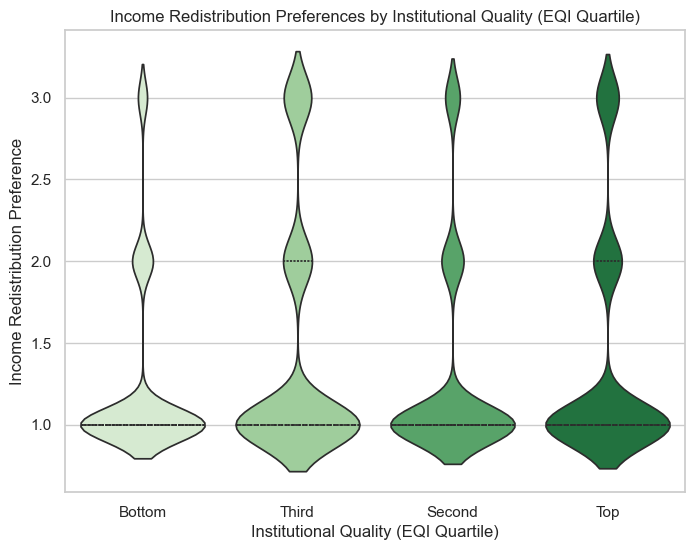

/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_39755/2285575298.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EQI', y='educ_mob_avg', data=train_set_cleaned, palette='Blues')


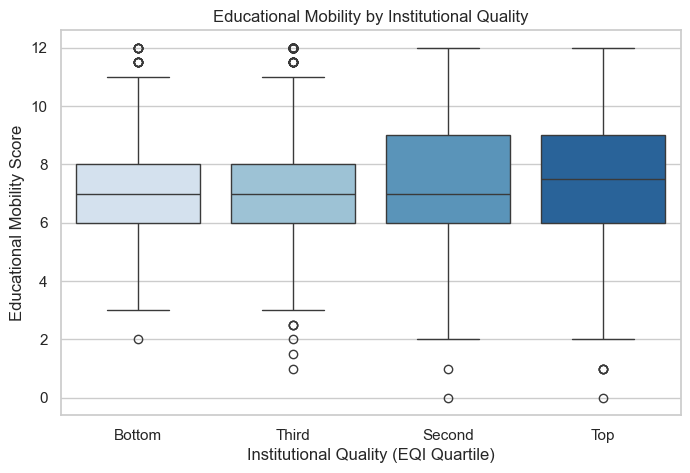

In [88]:
#Visual to show the effect of whether to include this 'EQI' variable

def plot_eqi_vs_mobility(df):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='EQI', y='educ_mob_avg', data=train_set_cleaned, palette='Blues')
    plt.xlabel('Institutional Quality (EQI Quartile)')
    plt.ylabel('Educational Mobility Score')
    plt.title('Educational Mobility by Institutional Quality')
    plt.show()


# Set figure size
plt.figure(figsize=(8, 6))

# Create the violin plot
sns.violinplot(
    x="EQI", 
    y="inc_redist", 
    data=train_set_cleaned, 
    palette="Greens", 
    inner="quartile"
)

# Title and labels
plt.title("Income Redistribution Preferences by Institutional Quality (EQI Quartile)")
plt.xlabel("Institutional Quality (EQI Quartile)")
plt.ylabel("Income Redistribution Preference")

# Show plot
plt.show()
plot_eqi_vs_mobility(train_set_cleaned)




In [60]:
#Cleaning and Recoding deomicile (domicile_cleaned)

# ================================
# Step 1: Define Domicile Cleaning Function
# ================================
def clean_domicile_variable(df):
    """
    Cleans and processes the domicile variable:
    - Converts invalid values (7, 8, 9) to NaN.
    - Keeps other values unchanged.
    - Does NOT encode at this stage (encoding will be handled later).
    """
    df = df.copy()  # Work on a copy

    # Step 1: Replace 7, 8, 9 with NaN
    df['domicile_cleaned'] = df['domicil'].replace({7: np.nan, 8: np.nan, 9: np.nan})

    # Step 2: Check for missing values
    missing_count = df['domicile_cleaned'].isnull().sum()
    print(f"Missing values in 'domicile_cleaned': {missing_count}")

    return df

# ================================
# Step 2: Apply Cleaning to Training Set Only
# ================================
train_set_cleaned = clean_domicile_variable(train_set_cleaned)

# ================================
# Step 3: Apply SAME Cleaning to Test Set (No New Processing)
# ================================
test_set_cleaned = clean_domicile_variable(test_set_cleaned)

# ================================
# Step 4: Check Processed Output
# ================================
print("\nDomicile Categories Distribution (Training Set - Including Missing Values):")
print(train_set_cleaned['domicile_cleaned'].value_counts(dropna=False))

print("\nDomicile Categories Distribution (Test Set - Including Missing Values):")
print(test_set_cleaned['domicile_cleaned'].value_counts(dropna=False))


Missing values in 'domicile_cleaned': 18
Missing values in 'domicile_cleaned': 5

Domicile Categories Distribution (Training Set - Including Missing Values):
domicile_cleaned
4.0    5718
3.0    5258
1.0    3581
2.0    1355
5.0     751
NaN      18
Name: count, dtype: int64

Domicile Categories Distribution (Test Set - Including Missing Values):
domicile_cleaned
4.0    1431
3.0    1319
1.0     879
2.0     325
5.0     192
NaN       5
Name: count, dtype: int64


In [62]:
print(train_set_cleaned.columns)
print(test_set_cleaned.columns)

Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl',
       'gndr', 'agea', 'cntry', 'marsts', 'chldhhe', 'uemp3m', 'mbtru',
       'hinctnta', 'c_gini_2022', 'c_effectiveness_2022', 'n2_unrao25_2020',
       'n2_unrao25_2021', 'c_gini_2020', 'c_gini_2021', 'c_effectiveness_2020',
       'c_effectiveness_2021', 'eqi21_n2', 'eqi21_n2_lowME', 'eqi21_n2_highME',
       'inc_redist', 'inc_redist_label', 'resp_ed', 'fath_ed', 'moth_ed',
       'educ_mob_father', 'educ_mob_mother', 'educ_mob_avg',
       'educ_mob_avg_category', 'parent_avg_ed', 'EQI', 'domicile_cleaned'],
      dtype='object')
Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl',
       'gndr', 'agea', 'cntry', 'marsts', 'chldhhe', 'uemp3m', 'mbtru',
       'hinctnta', 'c_gini_2022', 'c_effectiveness_2022', 'n2_unrao25

<Figure size 800x500 with 0 Axes>

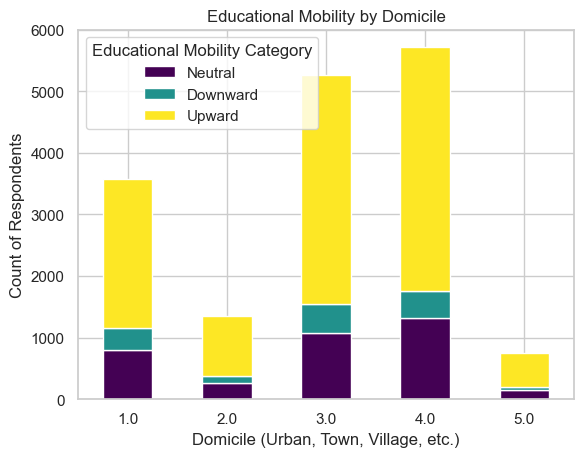

In [90]:
# Visualize the relationship between domicile and educational mobility

# Set plot style
sns.set(style="whitegrid")

# **1. Stacked Bar Chart: Domicile vs. Educational Mobility**
plt.figure(figsize=(8, 5))
mobility_domicile = train_set_cleaned.groupby(['domicile_cleaned', 'educ_mob_avg_category']).size().unstack()
mobility_domicile.plot(kind='bar', stacked=True, colormap="viridis")

plt.xlabel("Domicile (Urban, Town, Village, etc.)")
plt.ylabel("Count of Respondents")
plt.title("Educational Mobility by Domicile")
plt.legend(title="Educational Mobility Category", labels=["Neutral", "Downward", "Upward"])
plt.xticks(rotation=0)
plt.show()


In [68]:
# Cleaning and recoding unemployment rate at regional level (unemp_nuts2)

# ================================
# Step 1: Define Unemployment Rate Cleaning Function
# ================================
def clean_unemployment_variable(df):
    """
    Cleans and processes the unemployment rate variable:
    - Converts to numeric (handling errors).
    - Preserves missing values.
    - Categorizes into six levels based on the description.
    """
    df = df.copy()  # Work on a copy

    # Step 1: Convert Unemployment Rate to Numeric (handling errors)
    df['n2_unrao25_2022'] = pd.to_numeric(df['n2_unrao25_2022'], errors='coerce')

    # Step 2: Check for missing values
    missing_count = df['n2_unrao25_2022'].isnull().sum()
    print(f"Missing values in 'n2_unrao25_2022': {missing_count}")

    # Step 3: Categorize Unemployment Rate into Defined Groups
    def categorize_unemployment(value):
        if pd.isnull(value):
            return np.nan  # Preserve missing values
        elif 2 <= value < 4:
            return 0
        elif 4 <= value < 6:
            return 1
        elif 6 <= value < 8:
            return 2
        elif 8 <= value < 10:
            return 3
        elif 10 <= value < 15:
            return 4
        else:  # value >= 15
            return 5

    df['unemp_nuts2'] = df['n2_unrao25_2022'].apply(categorize_unemployment).astype('Int64')

    return df

# ================================
# Step 2: Apply Cleaning Function to Training Set Only
# ================================
train_set_cleaned = clean_unemployment_variable(train_set_cleaned)

# ================================
# Step 3: Apply SAME Cleaning to the Test Set
# ================================
test_set_cleaned = clean_unemployment_variable(test_set_cleaned)

# ================================
# Step 4: Check Processed Output
# ================================
print("\nValue Counts for 'unemp_nuts2' in Training Set:")
print(train_set_cleaned['unemp_nuts2'].value_counts(dropna=False))

print("\nValue Counts for 'unemp_nuts2' in Test Set:")
print(test_set_cleaned['unemp_nuts2'].value_counts(dropna=False))


Missing values in 'n2_unrao25_2022': 1760
Missing values in 'n2_unrao25_2022': 477

Value Counts for 'unemp_nuts2' in Training Set:
unemp_nuts2
0       6045
1       4687
2       2140
<NA>    1760
5       1656
3        331
4         62
Name: count, dtype: Int64

Value Counts for 'unemp_nuts2' in Test Set:
unemp_nuts2
0       1463
1       1152
2        552
<NA>     477
5        407
3         84
4         16
Name: count, dtype: Int64


In [70]:
print(train_set_cleaned.columns)
print(test_set_cleaned.columns)

Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl',
       'gndr', 'agea', 'cntry', 'marsts', 'chldhhe', 'uemp3m', 'mbtru',
       'hinctnta', 'c_gini_2022', 'c_effectiveness_2022', 'n2_unrao25_2020',
       'n2_unrao25_2021', 'c_gini_2020', 'c_gini_2021', 'c_effectiveness_2020',
       'c_effectiveness_2021', 'eqi21_n2', 'eqi21_n2_lowME', 'eqi21_n2_highME',
       'inc_redist', 'inc_redist_label', 'resp_ed', 'fath_ed', 'moth_ed',
       'educ_mob_father', 'educ_mob_mother', 'educ_mob_avg',
       'educ_mob_avg_category', 'parent_avg_ed', 'EQI', 'domicile_cleaned',
       'unemp_nuts2'],
      dtype='object')
Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl',
       'gndr', 'agea', 'cntry', 'marsts', 'chldhhe', 'uemp3m', 'mbtru',
       'hinctnta', 'c_gini_2022', 'c_effectiven

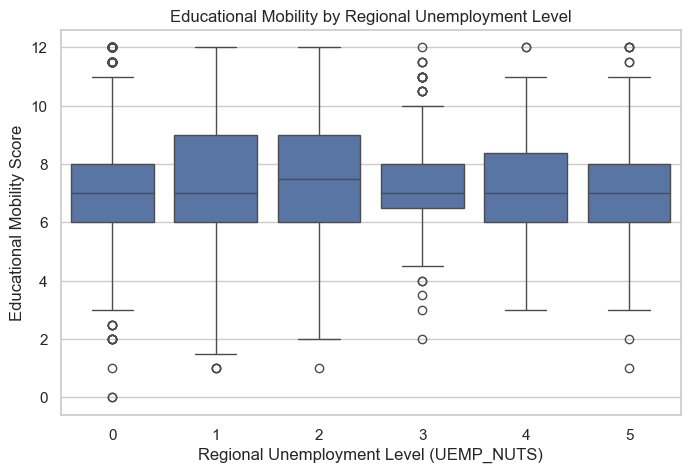

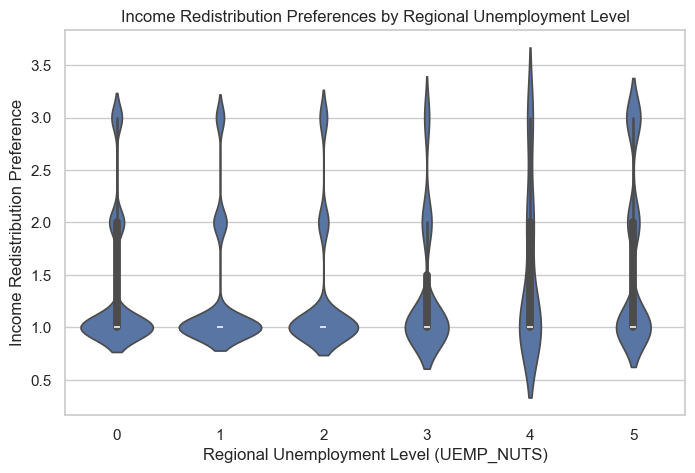

In [72]:
# Visualize the relationships between unemployment levels, educational mobility, and redistribution preferences.

# Boxplot: Unemployment Level vs. Educational Mobility
plt.figure(figsize=(8, 5))
sns.boxplot(x=train_set_cleaned['unemp_nuts2'], y=train_set_cleaned['educ_mob_avg'])
plt.xlabel("Regional Unemployment Level (UEMP_NUTS)")
plt.ylabel("Educational Mobility Score")
plt.title("Educational Mobility by Regional Unemployment Level")
plt.show()

# Violin Plot: Unemployment Level vs. Redistribution Preferences
plt.figure(figsize=(8, 5))
sns.violinplot(x=train_set_cleaned['unemp_nuts2'], y=train_set_cleaned['inc_redist'])
plt.xlabel("Regional Unemployment Level (UEMP_NUTS)")
plt.ylabel("Income Redistribution Preference")
plt.title("Income Redistribution Preferences by Regional Unemployment Level")
plt.show()


In [94]:
# Processing and analyzing 'wkhtot' variable (Weekly working hours)

# ================================
# Step 1: Define Cleaning Function for Weekly Working Hours (wkhtot)
# ================================
def clean_wkhtot_variable(df):
    """
    Cleans and processes the 'wkhtot' (Weekly Working Hours) variable:
    - Identifies and handles outliers.
    - Removes unrealistic values (>168 hours per week).
    - Replaces special codes (666, 777, 888, 999) with NaN.
    - Keeps working hours between 100 and 168 for further analysis.
    """
    df = df.copy()  # Work on a copy
    
    # Step 1: Replace unusual codes (666, 777, 888, 999) with NaN
    unusual_values = [666, 777, 888, 999]
    df['wkhtot'] = df['wkhtot'].replace(unusual_values, np.nan)

    # Step 2: Identify and handle outliers (>168 hours per week)
    df.loc[df['wkhtot'] > 168, 'wkhtot'] = np.nan

    return df

# ================================
# Step 2: Apply Cleaning Function to Training Set Only
# ================================
train_set_cleaned = clean_wkhtot_variable(train_set_cleaned)

# ================================
# Step 3: Apply SAME Cleaning to the Test Set
# ================================
test_set_cleaned = clean_wkhtot_variable(test_set_cleaned)

# ================================
# Step 4: Check Processed Output
# ================================
print("Summary Statistics for 'wkhtot' in Training Set:")
print(train_set_cleaned['wkhtot'].describe())

print("\nSummary Statistics for 'wkhtot' in Test Set:")
print(test_set_cleaned['wkhtot'].describe())

# Optional: Check number of missing values
print(f"\nMissing values in 'wkhtot' (Training Set): {train_set_cleaned['wkhtot'].isnull().sum()}")
print(f"Missing values in 'wkhtot' (Test Set): {test_set_cleaned['wkhtot'].isnull().sum()}")


Summary Statistics for 'wkhtot' in Training Set:
count    14599.000000
mean        40.428523
std         14.710741
min          0.000000
25%         38.000000
50%         40.000000
75%         45.000000
max        168.000000
Name: wkhtot, dtype: float64

Summary Statistics for 'wkhtot' in Test Set:
count    3623.000000
mean       40.521667
std        15.214390
min         0.000000
25%        38.000000
50%        40.000000
75%        45.000000
max       168.000000
Name: wkhtot, dtype: float64

Missing values in 'wkhtot' (Training Set): 2082
Missing values in 'wkhtot' (Test Set): 528


In [96]:
print(train_set_cleaned.columns)
print(test_set_cleaned.columns)

Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl',
       'gndr', 'agea', 'cntry', 'marsts', 'chldhhe', 'uemp3m', 'mbtru',
       'hinctnta', 'c_gini_2022', 'c_effectiveness_2022', 'n2_unrao25_2020',
       'n2_unrao25_2021', 'c_gini_2020', 'c_gini_2021', 'c_effectiveness_2020',
       'c_effectiveness_2021', 'eqi21_n2', 'eqi21_n2_lowME', 'eqi21_n2_highME',
       'inc_redist', 'inc_redist_label', 'resp_ed', 'fath_ed', 'moth_ed',
       'educ_mob_father', 'educ_mob_mother', 'educ_mob_avg',
       'educ_mob_avg_category', 'parent_avg_ed', 'EQI', 'domicile_cleaned',
       'unemp_nuts2'],
      dtype='object')
Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl',
       'gndr', 'agea', 'cntry', 'marsts', 'chldhhe', 'uemp3m', 'mbtru',
       'hinctnta', 'c_gini_2022', 'c_effectiven

In [100]:
# Count values >100 hours
num_above_100 = (train_set_cleaned['wkhtot'] > 100).sum()
total_values = train_set_cleaned['wkhtot'].count()
percentage_above_100 = (num_above_100 / total_values) * 100

print(f"Number of values >100 hours: {num_above_100}")
print(f"Percentage of dataset: {percentage_above_100:.2f}%")


Number of values >100 hours: 72
Percentage of dataset: 0.49%


In [102]:
# Count missing values in 'wkhtot' after replacing unusual values
missing_values = train_set_cleaned['wkhtot'].isnull().sum()
total_values = len(train_set_cleaned)
missing_percentage = (missing_values / total_values) * 100

print(f"Missing values in 'wkhtot': {missing_values}")
print(f"Percentage of missing values: {missing_percentage:.2f}%")


Missing values in 'wkhtot': 2082
Percentage of missing values: 12.48%


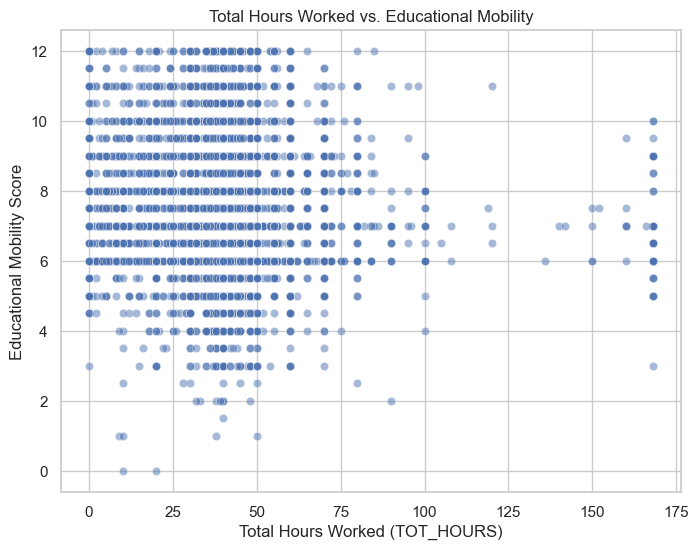

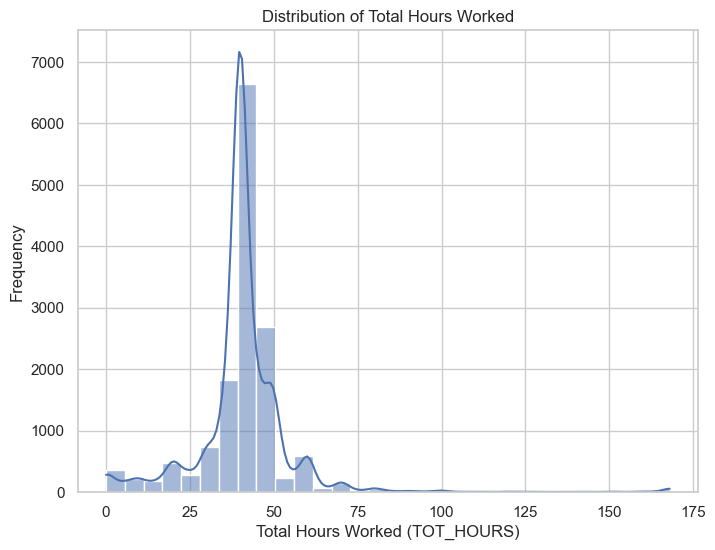

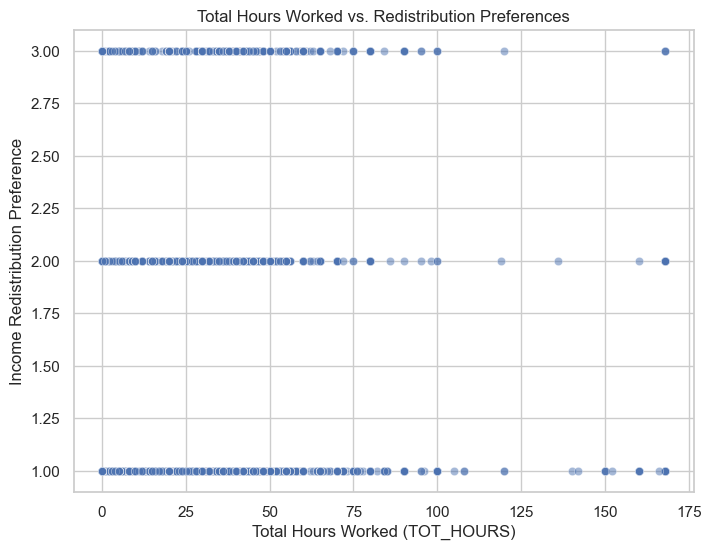

In [98]:
# Visualize the impact of working hours on mobility and redistribution attitudes

# Scatter Plot: Total Hours Worked vs. Educational Mobility
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_set_cleaned["wkhtot"], y=train_set_cleaned["educ_mob_avg"], alpha=0.5)
plt.xlabel("Total Hours Worked (TOT_HOURS)")
plt.ylabel("Educational Mobility Score")
plt.title("Total Hours Worked vs. Educational Mobility")
plt.show()

# Histogram: Distribution of Total Hours Worked
plt.figure(figsize=(8, 6))
sns.histplot(train_set_cleaned["wkhtot"], bins=30, kde=True)
plt.xlabel("Total Hours Worked (TOT_HOURS)")
plt.ylabel("Frequency")
plt.title("Distribution of Total Hours Worked")
plt.show()

# Scatter Plot: Total Hours Worked vs. Redistribution Preferences
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_set_cleaned["wkhtot"], y=train_set_cleaned["inc_redist"], alpha=0.5)
plt.xlabel("Total Hours Worked (TOT_HOURS)")
plt.ylabel("Income Redistribution Preference")
plt.title("Total Hours Worked vs. Redistribution Preferences")
plt.show()


Social attitudes influence redistribution preferences. This study incorporates Government Trust, Equality Importance, Social Ties, and Generalized Trust to capture perceptions of fairness, institutional confidence, and interpersonal trust. Below includes the process of cleaning and recoding for these four variables related to the social attitudes

In [104]:
# 'ipeqopt' to 'equality_importance'
# Independent variable: Important that people are treated equally and have equal opportunities

def clean_equality_importance(df):
    """
    Cleans and processes the 'ipeqopt' variable:
    - Groups values into meaningful categories:
      - 1 & 2 → Combined into Category 1 (High Importance)
      - 3 & 4 → Combined into Category 2 (Moderate Importance)
      - 5 & 6 → Combined into Category 3 (Low Importance)
      - 7, 8, 9 → Treated as missing values (NaN)
    - Converts to integer while preserving NaN.
    """
    df = df.copy()  # Work on a copy

    # Step 1: Recode values
    equality_mapping = {
        1: 1,  # High Importance
        2: 1,  # High Importance
        3: 2,  # Moderate Importance
        4: 2,  # Moderate Importance
        5: 3,  # Low Importance
        6: 3,  # Low Importance
        7: np.nan,  # Missing values
        8: np.nan,
        9: np.nan
    }
    df['equality_importance'] = df['ipeqopt'].map(equality_mapping)

    # Step 2: Convert to integer type while keeping NaNs
    df['equality_importance'] = df['equality_importance'].astype('Int64')

    # Step 3: Check for missing values
    missing_count = df['equality_importance'].isnull().sum()
    print(f"Missing values in 'equality_importance': {missing_count}")

    return df

# ================================
# Step 2: Apply Cleaning to Training Set
# ================================
train_set_cleaned = clean_equality_importance(train_set_cleaned)

# ================================
# Step 3: Apply the SAME Cleaning to the Test Set
# ================================
test_set_cleaned = clean_equality_importance(test_set_cleaned)

# ================================
# Step 4: Check Processed Output
# ================================
print("\nValue Counts for 'equality_importance' in Training Set:")
print(train_set_cleaned['equality_importance'].value_counts(dropna=False))

print("\nValue Counts for 'equality_importance' in Test Set:")
print(test_set_cleaned['equality_importance'].value_counts(dropna=False))


Missing values in 'equality_importance': 184
Missing values in 'equality_importance': 38

Value Counts for 'equality_importance' in Training Set:
equality_importance
1       11570
2        4412
3         515
<NA>      184
Name: count, dtype: Int64

Value Counts for 'equality_importance' in Test Set:
equality_importance
1       2882
2       1107
3        124
<NA>      38
Name: count, dtype: Int64


In [106]:
print(train_set_cleaned.columns)
print(test_set_cleaned.columns)

Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl',
       'gndr', 'agea', 'cntry', 'marsts', 'chldhhe', 'uemp3m', 'mbtru',
       'hinctnta', 'c_gini_2022', 'c_effectiveness_2022', 'n2_unrao25_2020',
       'n2_unrao25_2021', 'c_gini_2020', 'c_gini_2021', 'c_effectiveness_2020',
       'c_effectiveness_2021', 'eqi21_n2', 'eqi21_n2_lowME', 'eqi21_n2_highME',
       'inc_redist', 'inc_redist_label', 'resp_ed', 'fath_ed', 'moth_ed',
       'educ_mob_father', 'educ_mob_mother', 'educ_mob_avg',
       'educ_mob_avg_category', 'parent_avg_ed', 'EQI', 'domicile_cleaned',
       'unemp_nuts2', 'equality_importance'],
      dtype='object')
Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl',
       'gndr', 'agea', 'cntry', 'marsts', 'chldhhe', 'uemp3m', 'mbtru',
       'hinctnta', 'c_gi

In [108]:
# 'inprdsc' to 'social_ties'
# Independent variable: How many people with whom you can discuss intimate and personal matters

# Step 1: Define Cleaning Function for 'social_ties'
def clean_social_ties_variable(df):
    """
    Cleans and processes the 'inprdsc' variable:
    - Replaces coded values with meaningful numerical categories.
    - Groups higher values (7-9, 10+) into a single category.
    - Converts refusal, don't know, and no answer into NaN.
    """
    
    # Define mapping for recoding
    social_ties_mapping = {
        0: 0,   # None
        1: 1,   # 1 person
        2: 2,   # 2 people
        3: 3,   # 3 people
        4: 4,   # 4-6 people
        5: 5,   # 7-9 people -> Grouped as 5
        6: 5,   # 10+ people -> Grouped as 5
        77: np.nan,  # Refusal -> NaN
        88: np.nan,  # Don't know -> NaN
        99: np.nan   # No answer -> NaN
    }

    # Step 2: Apply Mapping
    df['social_ties'] = df['inprdsc'].replace(social_ties_mapping)

    # Step 3: Convert to Integer Type while Preserving NaNs
    df['social_ties'] = df['social_ties'].astype('Int64')

    # Step 4: Check for Missing Values
    missing_count = df['social_ties'].isnull().sum()
    print(f"Missing values in 'social_ties': {missing_count}")

    return df

# ================================
# Step 2: Apply Cleaning Function to Training Set Only
# ================================
train_set_cleaned = clean_social_ties_variable(train_set_cleaned)

# ================================
# Step 3: Apply SAME Cleaning to the Test Set
# ================================
test_set_cleaned = clean_social_ties_variable(test_set_cleaned)



Missing values in 'social_ties': 279
Missing values in 'social_ties': 59


In [110]:
# ================================
# Step 4: Check Processed Output
# ================================
print("\nValue Counts for 'social_ties' in Training Set:")
print(train_set_cleaned['social_ties'].value_counts(dropna=False))

print("\nValue Counts for 'social_ties' in Test Set:")
print(test_set_cleaned['social_ties'].value_counts(dropna=False))


Value Counts for 'social_ties' in Training Set:
social_ties
2       4212
3       3593
1       3423
4       3114
0       1164
5        896
<NA>     279
Name: count, dtype: Int64

Value Counts for 'social_ties' in Test Set:
social_ties
2       1027
3        876
1        867
4        809
0        287
5        226
<NA>      59
Name: count, dtype: Int64


In [112]:
print(train_set_cleaned.columns)
print(test_set_cleaned.columns)

Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl',
       'gndr', 'agea', 'cntry', 'marsts', 'chldhhe', 'uemp3m', 'mbtru',
       'hinctnta', 'c_gini_2022', 'c_effectiveness_2022', 'n2_unrao25_2020',
       'n2_unrao25_2021', 'c_gini_2020', 'c_gini_2021', 'c_effectiveness_2020',
       'c_effectiveness_2021', 'eqi21_n2', 'eqi21_n2_lowME', 'eqi21_n2_highME',
       'inc_redist', 'inc_redist_label', 'resp_ed', 'fath_ed', 'moth_ed',
       'educ_mob_father', 'educ_mob_mother', 'educ_mob_avg',
       'educ_mob_avg_category', 'parent_avg_ed', 'EQI', 'domicile_cleaned',
       'unemp_nuts2', 'equality_importance', 'social_ties'],
      dtype='object')
Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl',
       'gndr', 'agea', 'cntry', 'marsts', 'chldhhe', 'uemp3m', 'mbtru',
       'h

In [114]:
# 'ppltrst' to 'gen_trust'
# Independent variable: Most people can be trusted or you can't be too careful

# Step 1: Define Cleaning Function for 'gen_trust'
def clean_gen_trust_variable(df):
    """
    Cleans and processes the 'ppltrst' variable:
    - Replaces coded values with meaningful numerical categories.
    - Groups responses into broader categories: No Trust, Low, Moderate, and High Trust.
    - Converts refusal, don't know, and no answer into NaN.
    """

    # Define mapping for recoding trust levels
    trust_mapping = {
        0: 0,  # No Trust
        1: 1,  # Low Trust
        2: 1,  # Low Trust
        3: 1,  # Low Trust
        4: 2,  # Moderate Trust
        5: 2,  # Moderate Trust
        6: 2,  # Moderate Trust
        7: 3,  # High Trust
        8: 3,  # High Trust
        9: 3,  # High Trust
        10: 3, # High Trust
        77: np.nan,  # Refusal -> Missing
        88: np.nan,  # Don't know -> Missing
        99: np.nan   # No answer -> Missing
    }

    # Step 2: Apply Mapping
    df['gen_trust'] = df['ppltrst'].map(trust_mapping)

    # Step 3: Convert to Integer Type while Preserving NaNs
    df['gen_trust'] = df['gen_trust'].astype('Int64')

    # Step 4: Check for Missing Values
    missing_count = df['gen_trust'].isnull().sum()
    print(f"Missing values in 'gen_trust': {missing_count}")

    return df

# ================================
# Step 2: Apply Cleaning Function to Training Set Only
# ================================
train_set_cleaned = clean_gen_trust_variable(train_set_cleaned)

# ================================
# Step 3: Apply SAME Cleaning to the Test Set
# ================================
test_set_cleaned = clean_gen_trust_variable(test_set_cleaned)

# ================================
# Step 4: Check Processed Output
# ================================
print("\nValue Counts for 'gen_trust' in Training Set:")
print(train_set_cleaned['gen_trust'].value_counts(dropna=False))

print("\nValue Counts for 'gen_trust' in Test Set:")
print(test_set_cleaned['gen_trust'].value_counts(dropna=False))

Missing values in 'gen_trust': 48
Missing values in 'gen_trust': 15

Value Counts for 'gen_trust' in Training Set:
gen_trust
2       6355
3       5358
1       3618
0       1302
<NA>      48
Name: count, dtype: Int64

Value Counts for 'gen_trust' in Test Set:
gen_trust
2       1578
3       1396
1        888
0        274
<NA>      15
Name: count, dtype: Int64


In [116]:
print(train_set_cleaned.columns)
print(test_set_cleaned.columns)

Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl',
       'gndr', 'agea', 'cntry', 'marsts', 'chldhhe', 'uemp3m', 'mbtru',
       'hinctnta', 'c_gini_2022', 'c_effectiveness_2022', 'n2_unrao25_2020',
       'n2_unrao25_2021', 'c_gini_2020', 'c_gini_2021', 'c_effectiveness_2020',
       'c_effectiveness_2021', 'eqi21_n2', 'eqi21_n2_lowME', 'eqi21_n2_highME',
       'inc_redist', 'inc_redist_label', 'resp_ed', 'fath_ed', 'moth_ed',
       'educ_mob_father', 'educ_mob_mother', 'educ_mob_avg',
       'educ_mob_avg_category', 'parent_avg_ed', 'EQI', 'domicile_cleaned',
       'unemp_nuts2', 'equality_importance', 'social_ties', 'gen_trust'],
      dtype='object')
Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl',
       'gndr', 'agea', 'cntry', 'marsts', 'chldhhe', 'uemp3m', 'mbtr

In [118]:
# 'trstprl' to 'gov_trust'
# Independent Variable: Trust in country's parliament

# Step 1: Define Cleaning Function for 'gov_trust'
def clean_gov_trust_variable(df):
    """
    Cleans and processes the 'trstprl' variable:
    - Replaces coded values with meaningful numerical categories.
    - Groups responses into broader categories: No Trust, Low, Moderate, and High Trust.
    - Converts refusal, don't know, and no answer into NaN.
    """

    # Define mapping for recoding trust levels
    trust_mapping = {
        0: 0,                    # No Trust
        1: 1, 2: 1, 3: 1,        # Low Trust
        4: 2, 5: 2, 6: 2,        # Moderate Trust
        7: 3, 8: 3, 9: 3, 10: 3, # High Trust
        77: np.nan,  # Refusal -> Missing
        88: np.nan,  # Don't know -> Missing
        99: np.nan   # No answer -> Missing
    }

    # Step 2: Apply Mapping
    df['gov_trust'] = df['trstprl'].map(trust_mapping)

    # Step 3: Convert to Integer Type while Preserving NaNs
    df['gov_trust'] = df['gov_trust'].astype('Int64')

    # Step 4: Check for Missing Values
    missing_count = df['gov_trust'].isnull().sum()
    print(f"Missing values in 'gov_trust': {missing_count}")

    return df

# ================================
# Step 2: Apply Cleaning Function to Training Set Only
# ================================
train_set_cleaned = clean_gov_trust_variable(train_set_cleaned)

# ================================
# Step 3: Apply SAME Cleaning to the Test Set
# ================================
test_set_cleaned = clean_gov_trust_variable(test_set_cleaned)

# ================================
# Step 4: Check Processed Output
# ================================
print("\nValue Counts for 'gov_trust' in Training Set:")
print(train_set_cleaned['gov_trust'].value_counts(dropna=False))

print("\nValue Counts for 'gov_trust' in Test Set:")
print(test_set_cleaned['gov_trust'].value_counts(dropna=False))

Missing values in 'gov_trust': 226
Missing values in 'gov_trust': 58

Value Counts for 'gov_trust' in Training Set:
gov_trust
2       6141
1       4261
3       3897
0       2156
<NA>     226
Name: count, dtype: Int64

Value Counts for 'gov_trust' in Test Set:
gov_trust
2       1537
1       1038
3       1017
0        501
<NA>      58
Name: count, dtype: Int64


In [120]:
print(train_set_cleaned.columns)
print(test_set_cleaned.columns)

Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl',
       'gndr', 'agea', 'cntry', 'marsts', 'chldhhe', 'uemp3m', 'mbtru',
       'hinctnta', 'c_gini_2022', 'c_effectiveness_2022', 'n2_unrao25_2020',
       'n2_unrao25_2021', 'c_gini_2020', 'c_gini_2021', 'c_effectiveness_2020',
       'c_effectiveness_2021', 'eqi21_n2', 'eqi21_n2_lowME', 'eqi21_n2_highME',
       'inc_redist', 'inc_redist_label', 'resp_ed', 'fath_ed', 'moth_ed',
       'educ_mob_father', 'educ_mob_mother', 'educ_mob_avg',
       'educ_mob_avg_category', 'parent_avg_ed', 'EQI', 'domicile_cleaned',
       'unemp_nuts2', 'equality_importance', 'social_ties', 'gen_trust',
       'gov_trust'],
      dtype='object')
Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl',
       'gndr', 'agea', 'cntry', 'marsts', 'chldh

In [124]:
# The process of cleaning the data of the respondents' 'age', 'country','household's net income(income_decile)' and 'gender'.

# Step 1: Define Cleaning Function for Personal Variables
def clean_personal_variables(df):
    """
    Cleans and processes the control variables: 'age', 'country', 'income_decile', and 'gender'.
    - Replaces invalid/missing values.
    - Ensures correct data types.
    - Recodes gender into a binary variable.
    """

    # Step 1: Age Cleaning
    df['age'] = df['agea'].replace(999, np.nan).astype('Int64')  # 999 -> NaN
    print(f"Missing values in 'age': {df['age'].isnull().sum()}")

    # Step 2: Country Cleaning
    df['country'] = df['cntry'].astype('category')  # Convert to categorical
    print("Country Frequency Table:")
    print(df['country'].value_counts())

    # Step 3: Household Net Income Cleaning
    df['income_decile'] = df['hinctnta'].replace([77, 88, 99], np.nan).astype('Int64')  # 77, 88, 99 -> NaN
    print(f"Missing values in 'income_decile': {df['income_decile'].isnull().sum()}")

    # Step 4: Gender Recoding
    gender_mapping = {
        1: 0,  # Male -> 0
        2: 1   # Female -> 1
    }
    df['gender'] = df['gndr'].map(gender_mapping).astype('Int64')  # Convert to Int64 to preserve NaNs

    # Drop the original 'gndr' column after recoding
    df = df.drop(columns=['gndr'])
    print(f"Missing values in 'gender': {df['gender'].isnull().sum()}")

    return df

# ================================
# Step 2: Apply Cleaning Function to Training Set Only
# ================================
train_set_cleaned = clean_personal_variables(train_set_cleaned)

# ================================
# Step 3: Apply SAME Cleaning to the Test Set
# ================================
test_set_cleaned = clean_personal_variables(test_set_cleaned)


Missing values in 'age': 116
Country Frequency Table:
country
BG    1955
IT    1754
CZ    1657
PT    1328
HU    1278
IE    1248
FR    1237
FI    1114
LT    1094
SK     984
NL     968
BE     868
SI     844
HR     352
Name: count, dtype: int64
Missing values in 'income_decile': 3289
Missing values in 'gender': 0
Missing values in 'age': 32
Country Frequency Table:
country
IT    476
BG    455
CZ    389
PT    327
FR    326
IE    304
HU    299
LT    284
FI    273
NL    255
SK    236
SI    212
BE    208
HR    107
Name: count, dtype: int64
Missing values in 'income_decile': 806
Missing values in 'gender': 0


In [126]:
print(train_set_cleaned.columns)
print(test_set_cleaned.columns)

Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl',
       'agea', 'cntry', 'marsts', 'chldhhe', 'uemp3m', 'mbtru', 'hinctnta',
       'c_gini_2022', 'c_effectiveness_2022', 'n2_unrao25_2020',
       'n2_unrao25_2021', 'c_gini_2020', 'c_gini_2021', 'c_effectiveness_2020',
       'c_effectiveness_2021', 'eqi21_n2', 'eqi21_n2_lowME', 'eqi21_n2_highME',
       'inc_redist', 'inc_redist_label', 'resp_ed', 'fath_ed', 'moth_ed',
       'educ_mob_father', 'educ_mob_mother', 'educ_mob_avg',
       'educ_mob_avg_category', 'parent_avg_ed', 'EQI', 'domicile_cleaned',
       'unemp_nuts2', 'equality_importance', 'social_ties', 'gen_trust',
       'gov_trust', 'age', 'country', 'income_decile', 'gender'],
      dtype='object')
Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl',
       'age

In [128]:
#Cleaning and Recoding Personal Factors

# ===========================================
# Step 1: Define Cleaning and Recoding Functions
# ===========================================

# 1) whether an individual joined a trade union or similar organization (union_member)
# 'mbtru': whether an individual joined a trade union or similar organization to 'union_member'
def clean_union_member(df):
    """
    Cleans and recodes the 'mbtru' variable:
    - Converts responses to a binary format (1: Member Currently, 0: Not a Member)
    - Maps refusal, don't know, and no answer to NaN
    """
    mapping = {
        1: 1,  # Currently a member
        2: 0,  # Yes, previously
        3: 0,  # No
        7: np.nan,  # Refusal
        8: np.nan,  # Don't know
        9: np.nan   # No answer
    }
    df['union_member'] = df['mbtru'].map(mapping)
    return df

# 2) whether the household had children (child_ever)
# 'chldhe': whether the household had children to 'child_ever'
def clean_child_ever(df):
    """
    Cleans and recodes the 'chldhhe' variable:
    - Converts responses into binary format (1: Had a child, 0: Never had a child)
    - Maps missing responses to NaN
    """
    mapping = {
        1: 1,  # Yes, child now or in the past
        2: 0,  # No, never a child at home
        6: np.nan,  # Not applicable
        7: np.nan,  # Refusal
        8: np.nan,  # Don't know
        9: np.nan   # No answer
    }
    df['child_ever'] = df['chldhhe'].map(mapping)
    return df

# 3) legal marital status (martial_status)
# 'marsts': legal marital status to 'martial_status'
def clean_marital_status(df):
    """
    Cleans and recodes the 'marsts' variable:
    - Groups responses into simplified categories (1: Married, 2: Divorced/Separated, 3: Widowed, 0: Single)
    - Maps missing values to NaN
    """
    mapping = {
        1: 1,  # Married/Civil Union
        2: 1,  # Married/Civil Union
        3: 2,  # Separated/Divorced
        4: 2,  # Separated/Divorced
        5: 3,  # Widowed
        6: 0,  # Single
        66: np.nan,  # Not applicable
        77: np.nan,  # Refusal
        88: np.nan   # Don't know
    }
    df['marital_status'] = df['marsts'].map(mapping)
    return df

# 4) whether they had been unemployed for more than 3 months (unemp_ever)
# 'uemp3m': whether they had been unemployed for more than 3 months to 'unemp_ever'
def clean_unemp_ever(df):
    """
    Cleans and recodes the 'uemp3m' variable:
    - Converts responses into binary format (1: Unemployed >3 months, 0: Not unemployed)
    - Maps missing responses to NaN
    """
    mapping = {
        1: 1,       # Yes, unemployed for more than 3 months
        2: 0,       # No
        7: np.nan,  # Refusal
        8: np.nan,  # Don't know
        9: np.nan   # No answer
    }
    df['unemp_ever'] = df['uemp3m'].map(mapping)
    return df

# ===========================================
# Step 2: Apply Cleaning Functions to Training Set Only
# ===========================================

train_set_cleaned = clean_union_member(train_set_cleaned)
train_set_cleaned = clean_child_ever(train_set_cleaned)
train_set_cleaned = clean_marital_status(train_set_cleaned)
train_set_cleaned = clean_unemp_ever(train_set_cleaned)

# ===========================================
# Step 3: Apply SAME Cleaning to the Test Set
# ===========================================

test_set_cleaned = clean_union_member(test_set_cleaned)
test_set_cleaned = clean_child_ever(test_set_cleaned)
test_set_cleaned = clean_marital_status(test_set_cleaned)
test_set_cleaned = clean_unemp_ever(test_set_cleaned)

# ===========================================
# Step 4: Check Processed Output
# ===========================================

print("\nUnion Membership Binary Variable Counts (Training Set):")
print(train_set_cleaned['union_member'].value_counts(dropna=False))

print("\nBinary Variable 'child_ever' Counts (Training Set):")
print(train_set_cleaned['child_ever'].value_counts(dropna=False))

print("\nCategorical Variable 'marital_status' Counts (Training Set):")
print(train_set_cleaned['marital_status'].value_counts(dropna=False))

print("\nBinary Variable 'unemp_ever' Counts (Training Set):")
print(train_set_cleaned['unemp_ever'].value_counts(dropna=False))



Union Membership Binary Variable Counts (Training Set):
union_member
0.0    14734
1.0     1868
NaN       79
Name: count, dtype: int64

Binary Variable 'child_ever' Counts (Training Set):
child_ever
1.0    6385
NaN    6014
0.0    4282
Name: count, dtype: int64

Categorical Variable 'marital_status' Counts (Training Set):
marital_status
NaN    8575
0.0    3794
2.0    2052
3.0    1764
1.0     496
Name: count, dtype: int64

Binary Variable 'unemp_ever' Counts (Training Set):
unemp_ever
0.0    12115
1.0     4456
NaN      110
Name: count, dtype: int64


In [130]:
print(train_set_cleaned.columns)
print(test_set_cleaned.columns)


Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl',
       'agea', 'cntry', 'marsts', 'chldhhe', 'uemp3m', 'mbtru', 'hinctnta',
       'c_gini_2022', 'c_effectiveness_2022', 'n2_unrao25_2020',
       'n2_unrao25_2021', 'c_gini_2020', 'c_gini_2021', 'c_effectiveness_2020',
       'c_effectiveness_2021', 'eqi21_n2', 'eqi21_n2_lowME', 'eqi21_n2_highME',
       'inc_redist', 'inc_redist_label', 'resp_ed', 'fath_ed', 'moth_ed',
       'educ_mob_father', 'educ_mob_mother', 'educ_mob_avg',
       'educ_mob_avg_category', 'parent_avg_ed', 'EQI', 'domicile_cleaned',
       'unemp_nuts2', 'equality_importance', 'social_ties', 'gen_trust',
       'gov_trust', 'age', 'country', 'income_decile', 'gender',
       'union_member', 'child_ever', 'marital_status', 'unemp_ever'],
      dtype='object')
Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_202

In [132]:
# Feature Engineering
# Add the New Features

# Add Age Squared
train_set_cleaned['age_squared'] = train_set_cleaned['age'] ** 2
test_set_cleaned['age_squared'] = test_set_cleaned['age'] ** 2

# Add Interaction Terms

# Interaction between trust in government and educational mobility
train_set_cleaned['gov_trust_mob'] = train_set_cleaned['gov_trust'] * train_set_cleaned['educ_mob_avg_category']
test_set_cleaned['gov_trust_mob'] = test_set_cleaned['gov_trust'] * test_set_cleaned['educ_mob_avg_category']

# Interaction between equality importance and educational mobility
train_set_cleaned['equality_mob'] = train_set_cleaned['equality_importance'] * train_set_cleaned['educ_mob_avg_category']
test_set_cleaned['equality_mob'] = test_set_cleaned['equality_importance'] * test_set_cleaned['educ_mob_avg_category']


/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_39755/624559660.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


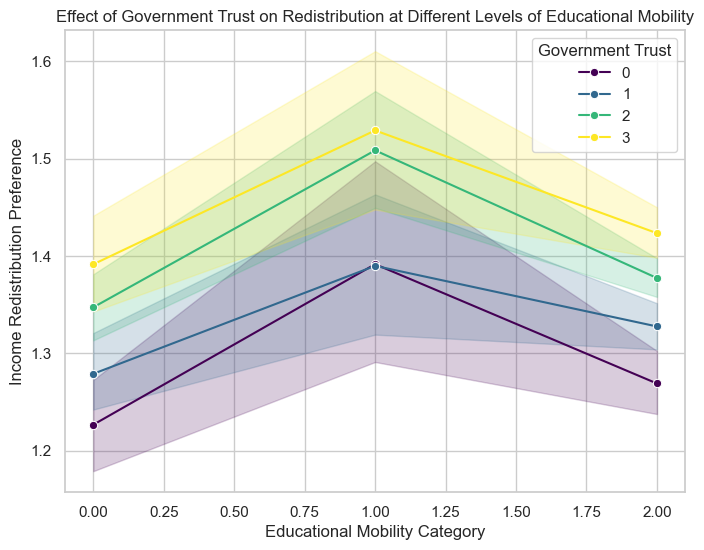

/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_39755/624559660.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


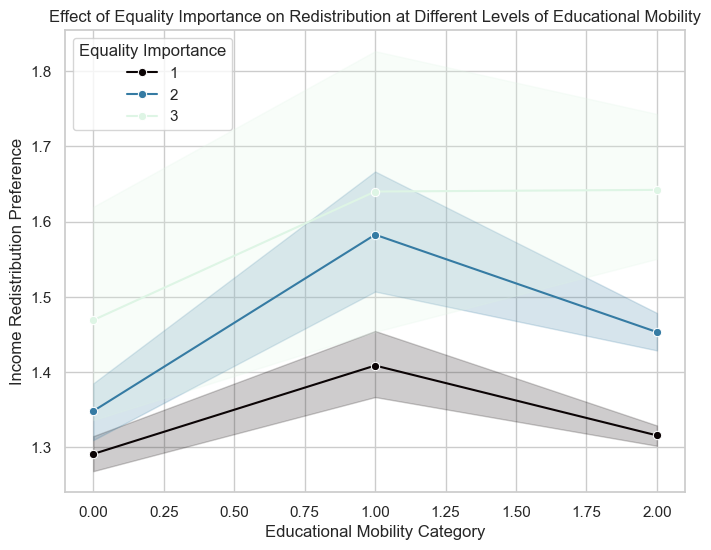

In [136]:
# Justifies the inclusion of interaction terms in modeling
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# Interaction Plot: Government Trust × Educational Mobility on Income Redistribution
plt.figure(figsize=(8, 6))
sns.lineplot(
    x="educ_mob_avg_category",
    y="inc_redist",
    hue="gov_trust",
    data=train_set_cleaned,
    ci=95,
    marker="o",
    palette="viridis"
)
plt.title("Effect of Government Trust on Redistribution at Different Levels of Educational Mobility")
plt.xlabel("Educational Mobility Category")
plt.ylabel("Income Redistribution Preference")
plt.legend(title="Government Trust")
plt.show()

# Interaction Plot: Equality Importance × Educational Mobility on Income Redistribution
plt.figure(figsize=(8, 6))
sns.lineplot(
    x="educ_mob_avg_category",
    y="inc_redist",
    hue="equality_importance",
    data=train_set_cleaned,
    ci=95,
    marker="o",
    palette="mako"
)
plt.title("Effect of Equality Importance on Redistribution at Different Levels of Educational Mobility")
plt.xlabel("Educational Mobility Category")
plt.ylabel("Income Redistribution Preference")
plt.legend(title="Equality Importance")
plt.show()


In [138]:
print(train_set_cleaned.columns)
print(test_set_cleaned.columns)

Index(['idno', 'gincdif', 'nuts2', 'eisced', 'eiscedf', 'eiscedm', 'domicil',
       'n2_unrao25_2022', 'wkhtot', 'ipeqopt', 'inprdsc', 'ppltrst', 'trstprl',
       'agea', 'cntry', 'marsts', 'chldhhe', 'uemp3m', 'mbtru', 'hinctnta',
       'c_gini_2022', 'c_effectiveness_2022', 'n2_unrao25_2020',
       'n2_unrao25_2021', 'c_gini_2020', 'c_gini_2021', 'c_effectiveness_2020',
       'c_effectiveness_2021', 'eqi21_n2', 'eqi21_n2_lowME', 'eqi21_n2_highME',
       'inc_redist', 'inc_redist_label', 'resp_ed', 'fath_ed', 'moth_ed',
       'educ_mob_father', 'educ_mob_mother', 'educ_mob_avg',
       'educ_mob_avg_category', 'parent_avg_ed', 'EQI', 'domicile_cleaned',
       'unemp_nuts2', 'equality_importance', 'social_ties', 'gen_trust',
       'gov_trust', 'age', 'country', 'income_decile', 'gender',
       'union_member', 'child_ever', 'marital_status', 'unemp_ever',
       'age_squared', 'gov_trust_mob', 'equality_mob'],
      dtype='object')
Index(['idno', 'gincdif', 'nuts2', 'eisced', 

### 3-2. Encoding and Transformations
<a id="encoding-&-transformations"></a>
Numerical variables were standardized to facilitate comparability across different scales, while categorical variables were encoded based on their inherent properties. Ordinal variables, which exhibit a meaningful rank order, were transformed using predefined mappings to preserve their ordinal relationships. Nominal categorical variables, which lack a natural ordering, were processed using one-hot encoding. This approach converted each category into a binary indicator, preventing the imposition of an arbitrary hierarchy. To manage missing values effectively, imputation strategies were employed, with numerical variables imputed using the median and categorical variables imputed using the most frequent category. 

In [140]:
# ============================
# Define Mappings for Ordinal Features
# ============================
ordinal_mappings = {
    'educ_mob_avg_category': [[0, 1, 2]],  # Neutral → Downward → Upward
    'gen_trust': [[0, 1, 2, 3]],  # No Trust → Low Trust → Moderate Trust → High Trust
    'gov_trust': [[0, 1, 2, 3]],  # No Trust → Low Trust → Moderate Trust → High Trust
    'equality_importance': [[1, 2, 3]],  # 1: Very important, 2: Somewhat, 3: Not at all
    'income_decile': [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]],  # 1: Lowest, 10: Highest
    'resp_ed': [[0, 1, 2, 3, 4, 5, 6]],  # Education level from low to high
    'fath_ed': [[0, 1, 2, 3, 4, 5, 6]],  # Same as above
    'moth_ed': [[0, 1, 2, 3, 4, 5, 6]],  # Same as above
    'EQI': [['Bottom', 'Third', 'Second', 'Top']],  # EQI from low to high
    'unemp_nuts2': [[0, 1, 2, 3, 4, 5]],  # Different regions with unemployment ranking
    'social_ties': [[0, 1, 2, 3, 4, 5]]  # 0 (No ties) to 5 (Strong ties)
}

# ============================
# Define Feature Groups
# ============================
num_features = ['age', 'wkhtot', 'educ_mob_father', 
                'educ_mob_mother', 'educ_mob_avg', 'gov_trust_mob', 
                'equality_mob', 'age_squared']

ord_features = list(ordinal_mappings.keys())  # Use all defined ordinal features

nom_features = ['gender', 'cntry', 'marital_status', 'union_member', 
                'child_ever', 'domicile_cleaned', 'unemp_ever']

# ============================
# Define Transformation Pipelines
# ============================
# Numerical Features
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),  # Fill missing with median
    ('scaler', StandardScaler())  # Normalize numerical features
])

# Ordinal Features (Apply Predefined Order)
ord_transformers = []
for feature, categories in ordinal_mappings.items():
    transformer = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),  # Fill missing with mode
        ('encoder', OrdinalEncoder(categories=categories))  # Apply predefined order
    ])
    ord_transformers.append((feature, transformer, [feature]))

# Nominal Features (One-Hot Encoding)
nom_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),  # Fill missing with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-Hot Encoding
])

# ============================
# Combine All Transformations
# ============================
preprocessor = ColumnTransformer(
    [('num', num_transformer, num_features)] +
    ord_transformers +  # Add separate ordinal transformers
    [('nom', nom_transformer, nom_features)]
)

# ============================
# Apply Preprocessing Pipeline to Train & Test Sets
# ============================
# Fit & transform training data
train_transformed = preprocessor.fit_transform(train_set_cleaned)

# Transform test data (NO fitting)
test_transformed = preprocessor.transform(test_set_cleaned)

# Convert to DataFrame with Restored Column Names
train_transformed_df = pd.DataFrame(train_transformed, 
                                    columns=preprocessor.get_feature_names_out())

test_transformed_df = pd.DataFrame(test_transformed, 
                                   columns=preprocessor.get_feature_names_out())

# Print Confirmation
print(f"Train shape: {train_transformed_df.shape}, Test shape: {test_transformed_df.shape}")

# ============================
# Final Check: Print Column Names
# ============================
print("Transformed Column Names:", list(train_transformed_df.columns))


Train shape: (16681, 50), Test shape: (4151, 50)
Transformed Column Names: ['num__age', 'num__wkhtot', 'num__educ_mob_father', 'num__educ_mob_mother', 'num__educ_mob_avg', 'num__gov_trust_mob', 'num__equality_mob', 'num__age_squared', 'educ_mob_avg_category__educ_mob_avg_category', 'gen_trust__gen_trust', 'gov_trust__gov_trust', 'equality_importance__equality_importance', 'income_decile__income_decile', 'resp_ed__resp_ed', 'fath_ed__fath_ed', 'moth_ed__moth_ed', 'EQI__EQI', 'unemp_nuts2__unemp_nuts2', 'social_ties__social_ties', 'nom__gender_0', 'nom__gender_1', 'nom__cntry_BE', 'nom__cntry_BG', 'nom__cntry_CZ', 'nom__cntry_FI', 'nom__cntry_FR', 'nom__cntry_HR', 'nom__cntry_HU', 'nom__cntry_IE', 'nom__cntry_IT', 'nom__cntry_LT', 'nom__cntry_NL', 'nom__cntry_PT', 'nom__cntry_SI', 'nom__cntry_SK', 'nom__marital_status_0.0', 'nom__marital_status_1.0', 'nom__marital_status_2.0', 'nom__marital_status_3.0', 'nom__union_member_0.0', 'nom__union_member_1.0', 'nom__child_ever_0.0', 'nom__child_

### 3-3. Data Finalisation
<a id="3-3-data-finalisation--visualisation"></a>
Double check that the train set and test set matches with each other. Finally,saving the datset for the model training

In [142]:
print("Columns in train but not in test:", set(train_transformed_df.columns) - set(test_transformed_df.columns))
print("Columns in test but not in train:", set(test_transformed_df.columns) - set(train_transformed_df.columns))


Columns in train but not in test: set()
Columns in test but not in train: set()


In [144]:
# Print unique values for some ordinal-encoded features
for col in ['educ_mob_avg_category__educ_mob_avg_category', 'EQI__EQI', 'gen_trust__gen_trust']:
    print(f"Unique values in {col}: {train_transformed_df[col].unique()}")


Unique values in educ_mob_avg_category__educ_mob_avg_category: [2. 1. 0.]
Unique values in EQI__EQI: [2. 1. 0. 3.]
Unique values in gen_trust__gen_trust: [1. 3. 0. 2.]


In [146]:
# Check one-hot encoded columns for a categorical feature
print(train_transformed_df.filter(like='cntry_').head())  # Example for 'cntry'


   nom__cntry_BE  nom__cntry_BG  nom__cntry_CZ  nom__cntry_FI  nom__cntry_FR  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            1.0   

   nom__cntry_HR  nom__cntry_HU  nom__cntry_IE  nom__cntry_IT  nom__cntry_LT  \
0            0.0            0.0            0.0            1.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            1.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   nom__cntry_NL  nom__cntry_PT  nom__

In [148]:
print(train_transformed_df[['num__age', 'num__wkhtot']].describe())


           num__age   num__wkhtot
count  1.668100e+04  1.668100e+04
mean   2.640948e-17  1.696915e-16
std    1.000030e+00  1.000030e+00
min   -1.842897e+00 -2.933727e+00
25%   -7.819915e-01 -2.725094e-02
50%    2.928951e-02 -2.725094e-02
75%    7.781643e-01  1.907348e-01
max    2.213508e+00  9.273474e+00


In [150]:
print("Missing values in train set:", train_transformed_df.isnull().sum().sum())
print("Missing values in test set:", test_transformed_df.isnull().sum().sum())


Missing values in train set: 0
Missing values in test set: 0


In [152]:
print("Train shape:", train_transformed_df.shape)
print("Test shape:", test_transformed_df.shape)


Train shape: (16681, 50)
Test shape: (4151, 50)


In [154]:
print("Training Set Columns:")
print(train_transformed_df.columns.tolist())


Training Set Columns:
['num__age', 'num__wkhtot', 'num__educ_mob_father', 'num__educ_mob_mother', 'num__educ_mob_avg', 'num__gov_trust_mob', 'num__equality_mob', 'num__age_squared', 'educ_mob_avg_category__educ_mob_avg_category', 'gen_trust__gen_trust', 'gov_trust__gov_trust', 'equality_importance__equality_importance', 'income_decile__income_decile', 'resp_ed__resp_ed', 'fath_ed__fath_ed', 'moth_ed__moth_ed', 'EQI__EQI', 'unemp_nuts2__unemp_nuts2', 'social_ties__social_ties', 'nom__gender_0', 'nom__gender_1', 'nom__cntry_BE', 'nom__cntry_BG', 'nom__cntry_CZ', 'nom__cntry_FI', 'nom__cntry_FR', 'nom__cntry_HR', 'nom__cntry_HU', 'nom__cntry_IE', 'nom__cntry_IT', 'nom__cntry_LT', 'nom__cntry_NL', 'nom__cntry_PT', 'nom__cntry_SI', 'nom__cntry_SK', 'nom__marital_status_0.0', 'nom__marital_status_1.0', 'nom__marital_status_2.0', 'nom__marital_status_3.0', 'nom__union_member_0.0', 'nom__union_member_1.0', 'nom__child_ever_0.0', 'nom__child_ever_1.0', 'nom__domicile_cleaned_1.0', 'nom__domicil

In [156]:
train_transformed_df['inc_redist'] = train_set_cleaned['inc_redist'].values
test_transformed_df['inc_redist'] = test_set_cleaned['inc_redist'].values


In [763]:
# Check if row order is unchanged
assert (train_set_cleaned.index == train_transformed_df.index).all(), "Row order mismatch in training set!"
assert (test_set_cleaned.index == test_transformed_df.index).all(), "Row order mismatch in test set!"
print("Row order is preserved!")


Row order is preserved!


In [160]:
print("Unique values in train_transformed_df['inc_redist']:", train_transformed_df['inc_redist'].unique())
print("Unique values in test_transformed_df['inc_redist']:", test_transformed_df['inc_redist'].unique())


Unique values in train_transformed_df['inc_redist']: [1 3 2]
Unique values in test_transformed_df['inc_redist']: [1 3 2]


In [164]:
# Save processed datasets to CSV
train_transformed_df.to_csv("train_transformed.csv", index=False)
test_transformed_df.to_csv("test_transformed.csv", index=False)

print("Preprocessed datasets saved successfully!")


Preprocessed datasets saved successfully!


## 4. Model Development & Evaluation
<a id="predictive-modeling"></a>

### 4-1 Data Preparation for Modelling
<a id="data preparation for modelling"></a>
The dataset was pre-processed by loading transformed training and test sets, with income redistribution preference (`inc_redist`) as the target variable. Predictors included individual, social, and regional factors. To enhance model efficiency, redundant features (e.g., detailed parental education levels, country dummies) were removed.
Variable selection varied by model characteristics. Logistic regression, sensitive to multicollinearity, required VIF-based filtering and mutual information-based feature selection. K-Nearest Neighbors (KNN) and Support Vector Machine (SVM) models, while needing feature selection, were less affected by multicollinearity. These models used the continuous parental educational mobility( `num_educ_mob_avg`))  to preserve magnitude differences, which is relevant for distance-based (KNN) and hyperplane-separating (SVM) methods.
For models not requiring additional handling, all predictors were retained. The categorical parental educational mobilit( `educ_mob_avg_category__educ_mob_avg_category` )y) was preferred, as it captures group-level differences without imposing a rigid numerical scale. Processed datasets were saved for model training, ensuring consistency.


In [169]:
# Load the preprocessed datasets
train_full = pd.read_csv("train_transformed.csv")
test_full = pd.read_csv("test_transformed.csv")

print("Original Dataset Columns:", list(train_full.columns))

Original Dataset Columns: ['num__age', 'num__wkhtot', 'num__educ_mob_father', 'num__educ_mob_mother', 'num__educ_mob_avg', 'num__gov_trust_mob', 'num__equality_mob', 'num__age_squared', 'educ_mob_avg_category__educ_mob_avg_category', 'gen_trust__gen_trust', 'gov_trust__gov_trust', 'equality_importance__equality_importance', 'income_decile__income_decile', 'resp_ed__resp_ed', 'fath_ed__fath_ed', 'moth_ed__moth_ed', 'EQI__EQI', 'unemp_nuts2__unemp_nuts2', 'social_ties__social_ties', 'nom__gender_0', 'nom__gender_1', 'nom__cntry_BE', 'nom__cntry_BG', 'nom__cntry_CZ', 'nom__cntry_FI', 'nom__cntry_FR', 'nom__cntry_HR', 'nom__cntry_HU', 'nom__cntry_IE', 'nom__cntry_IT', 'nom__cntry_LT', 'nom__cntry_NL', 'nom__cntry_PT', 'nom__cntry_SI', 'nom__cntry_SK', 'nom__marital_status_0.0', 'nom__marital_status_1.0', 'nom__marital_status_2.0', 'nom__marital_status_3.0', 'nom__union_member_0.0', 'nom__union_member_1.0', 'nom__child_ever_0.0', 'nom__child_ever_1.0', 'nom__domicile_cleaned_1.0', 'nom__dom

In [171]:
# Define target variable
target_col = "inc_redist"

# Separate predictors and target
X_train = train_full.drop(columns=[target_col])
y_train = train_full[target_col]
X_test = test_full.drop(columns=[target_col])
y_test = test_full[target_col]

In [173]:
# Step 1: Drop Unnecessary Features (Educational Mobility Details & Country Variables)
drop_cols = ["fath_ed__fath_ed", "moth_ed__moth_ed", 
             "num__educ_mob_father", "num__educ_mob_mother"]

X_train = X_train.drop(columns=drop_cols, errors="ignore")
X_test = X_test.drop(columns=drop_cols, errors="ignore")

# Drop One-Hot Encoded Country Variables
drop_countries = [col for col in X_train.columns if "cntry" in col]
X_train = X_train.drop(columns=drop_countries, errors="ignore")
X_test = X_test.drop(columns=drop_countries, errors="ignore")

print(f"Dropped {len(drop_countries)} country-related variables.")

Dropped 14 country-related variables.


In [175]:
# Create different versions of Educational Mobility

X_train_cont = X_train.drop(columns=["educ_mob_avg_category__educ_mob_avg_category"], errors="ignore")
X_test_cont = X_test.drop(columns=["educ_mob_avg_category__educ_mob_avg_category"], errors="ignore")

X_train_cat = X_train.drop(columns=["num__educ_mob_avg"], errors="ignore")
X_test_cat = X_test.drop(columns=["num__educ_mob_avg"], errors="ignore")


In [211]:
# Step 2: Calculate VIF & Drop High Multicollinearity Features
def calculate_vif(X):
    """Calculate Variance Inflation Factor (VIF) for each feature."""
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Select only numeric features for VIF calculation
numeric_features = X_train_cont.select_dtypes(include=[np.number])

# Compute VIF
vif_df = calculate_vif(numeric_features)
print("\nVIF Before Removing Multicollinearity:\n", vif_df.sort_values(by="VIF", ascending=False))


/Users/dundun/myenv/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



VIF Before Removing Multicollinearity:
                                      Feature        VIF
15                             nom__gender_1        inf
16                   nom__marital_status_0.0        inf
29                       nom__unemp_ever_0.0        inf
28                 nom__domicile_cleaned_5.0        inf
27                 nom__domicile_cleaned_4.0        inf
26                 nom__domicile_cleaned_3.0        inf
25                 nom__domicile_cleaned_2.0        inf
24                 nom__domicile_cleaned_1.0        inf
23                       nom__child_ever_1.0        inf
22                       nom__child_ever_0.0        inf
21                     nom__union_member_1.0        inf
20                     nom__union_member_0.0        inf
19                   nom__marital_status_3.0        inf
18                   nom__marital_status_2.0        inf
17                   nom__marital_status_1.0        inf
30                       nom__unemp_ever_1.0        inf
14     

In [189]:
# VIF Filtering (For Logistic Regression Only)

vif_drop_cols = ["num__age_squared", "gov_trust__gov_trust", "equality_importance__equality_importance"]
X_train_vif = X_train_cont.drop(columns=vif_drop_cols, errors="ignore")
X_test_vif = X_test_cont.drop(columns=vif_drop_cols, errors="ignore")

print(f"Dropped high VIF features: {vif_drop_cols}")

Dropped high VIF features: ['num__age_squared', 'gov_trust__gov_trust', 'equality_importance__equality_importance']


In [191]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Step 4: Apply Mutual Information
k_best = 20  
selector_mi = SelectKBest(score_func=mutual_info_classif, k=k_best)

# Apply Mutual Information on VIF-filtered dataset for Logistic Regression
X_train_vif_mi = selector_mi.fit_transform(X_train_vif, y_train)
X_test_vif_mi = selector_mi.transform(X_test_vif)

selected_features_mi_vif = X_train_vif.columns[selector_mi.get_support()]
print(f"Selected Features (Mutual Info after VIF for Logistic Regression): {list(selected_features_mi_vif)}")

# Step 5: Apply Mutual Information for KNN & SVM (No VIF applied)
X_train_mi = selector_mi.fit_transform(X_train_cont, y_train)
X_test_mi = selector_mi.transform(X_test_cont)

selected_features_mi_knn_svm = X_train_cont.columns[selector_mi.get_support()]
print(f"Selected Features (Mutual Info for KNN & SVM): {list(selected_features_mi_knn_svm)}")

# Subset datasets based on selected features
X_train_knn_svm = X_train_cont[selected_features_mi_knn_svm]
X_test_knn_svm = X_test_cont[selected_features_mi_knn_svm]

X_train_vif_mi = X_train_vif[selected_features_mi_vif]  # VIF + Mutual Info for Logistic Regression
X_test_vif_mi = X_test_vif[selected_features_mi_vif]


Selected Features (Mutual Info after VIF for Logistic Regression): ['num__age', 'num__wkhtot', 'num__educ_mob_avg', 'num__gov_trust_mob', 'num__equality_mob', 'gen_trust__gen_trust', 'income_decile__income_decile', 'resp_ed__resp_ed', 'EQI__EQI', 'unemp_nuts2__unemp_nuts2', 'social_ties__social_ties', 'nom__gender_0', 'nom__gender_1', 'nom__marital_status_0.0', 'nom__marital_status_3.0', 'nom__union_member_0.0', 'nom__child_ever_1.0', 'nom__domicile_cleaned_1.0', 'nom__unemp_ever_0.0', 'nom__unemp_ever_1.0']
Selected Features (Mutual Info for KNN & SVM): ['num__wkhtot', 'num__educ_mob_avg', 'num__gov_trust_mob', 'num__equality_mob', 'gen_trust__gen_trust', 'gov_trust__gov_trust', 'equality_importance__equality_importance', 'income_decile__income_decile', 'resp_ed__resp_ed', 'EQI__EQI', 'unemp_nuts2__unemp_nuts2', 'nom__marital_status_0.0', 'nom__marital_status_1.0', 'nom__union_member_0.0', 'nom__child_ever_1.0', 'nom__domicile_cleaned_1.0', 'nom__domicile_cleaned_2.0', 'nom__domicile_

In [193]:
# Step 6: Save Processed Datasets
X_train_vif_mi.to_csv("train_logistic_vif_mi.csv", index=False)
X_test_vif_mi.to_csv("test_logistic_vif_mi.csv", index=False)

X_train_knn_svm.to_csv("train_knn_svm_mi.csv", index=False)
X_test_knn_svm.to_csv("test_knn_svm_mi.csv", index=False)

X_train_cat.to_csv("train_full_models.csv", index=False)
X_test_cat.to_csv("test_full_models.csv", index=False)

In [209]:
# Load the datasets
train_logistic_vif_mi = pd.read_csv("train_logistic_vif_mi.csv")
test_logistic_vif_mi = pd.read_csv("test_logistic_vif_mi.csv")

train_knn_svm_mi = pd.read_csv("train_knn_svm_mi.csv")
test_knn_svm_mi = pd.read_csv("test_knn_svm_mi.csv")

train_full_models = pd.read_csv("train_full_models.csv")
test_full_models = pd.read_csv("test_full_models.csv")

# Print column names for each dataset
print("Columns in train_logistic_vif_mi.csv:\n", list(train_logistic_vif_mi.columns), "\n")
print("Columns in test_logistic_vif_mi.csv:\n", list(test_logistic_vif_mi.columns), "\n")

print("Columns in train_knn_svm_mi.csv:\n", list(train_knn_svm_mi.columns), "\n")
print("Columns in test_knn_svm_mi.csv:\n", list(test_knn_svm_mi.columns), "\n")

print("Columns in train_full_models.csv:\n", list(train_full_models.columns), "\n")
print("Columns in test_full_models.csv:\n", list(test_full_models.columns), "\n")



Columns in train_logistic_vif_mi.csv:
 ['num__age', 'num__wkhtot', 'num__educ_mob_avg', 'num__gov_trust_mob', 'num__equality_mob', 'gen_trust__gen_trust', 'income_decile__income_decile', 'resp_ed__resp_ed', 'EQI__EQI', 'unemp_nuts2__unemp_nuts2', 'social_ties__social_ties', 'nom__gender_0', 'nom__gender_1', 'nom__marital_status_0.0', 'nom__marital_status_3.0', 'nom__union_member_0.0', 'nom__child_ever_1.0', 'nom__domicile_cleaned_1.0', 'nom__unemp_ever_0.0', 'nom__unemp_ever_1.0'] 

Columns in test_logistic_vif_mi.csv:
 ['num__age', 'num__wkhtot', 'num__educ_mob_avg', 'num__gov_trust_mob', 'num__equality_mob', 'gen_trust__gen_trust', 'income_decile__income_decile', 'resp_ed__resp_ed', 'EQI__EQI', 'unemp_nuts2__unemp_nuts2', 'social_ties__social_ties', 'nom__gender_0', 'nom__gender_1', 'nom__marital_status_0.0', 'nom__marital_status_3.0', 'nom__union_member_0.0', 'nom__child_ever_1.0', 'nom__domicile_cleaned_1.0', 'nom__unemp_ever_0.0', 'nom__unemp_ever_1.0'] 

Columns in train_knn_svm_

### 4-2 Baseline Model and Classification Strategy
<a id="baseline-model-training-classification-strategy"></a>
#### 4-2-1 Baseline Model Comparison (Multinomial VS OvA Logistic Regression)
<a id="baseline-model-training"></a>
To determine the most effective classification approach, a baseline model was trained to compare multinomial logistic regression and the One-vs-All (OvA) strategy. Given the three-class nature of the outcome variable, both methods were assessed for performance.
Result  indicated that the OvA approach performed slightly better than multinomial logistic regression.


In [749]:
# Load preprocessed feature datasets
X_train_logistic = pd.read_csv("train_logistic_vif_mi.csv")
X_test_logistic = pd.read_csv("test_logistic_vif_mi.csv")

# Load target variable
train_full = pd.read_csv("train_transformed.csv")
test_full = pd.read_csv("test_transformed.csv")

y_train = train_full["inc_redist"]
y_test = test_full["inc_redist"]


Classification Report (Multinomial Logistic Regression):
               precision    recall  f1-score   support

           1       0.83      0.57      0.67      3086
           2       0.20      0.28      0.23       628
           3       0.19      0.50      0.28       437

    accuracy                           0.52      4151
   macro avg       0.41      0.45      0.39      4151
weighted avg       0.67      0.52      0.57      4151



/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


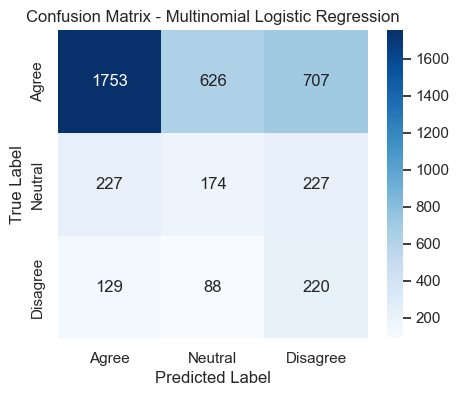


Model Performance:
Multinomial Logistic Regression: 0.5172


In [751]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Multinomial Logistic Regression
# Function to Train & Evaluate Models
def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name):
    """Train Logistic Regression and evaluate performance."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute Accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Print Classification Report
    print(f"\nClassification Report ({model_name}):\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Agree", "Neutral", "Disagree"], yticklabels=["Agree", "Neutral", "Disagree"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    return acc

# Train Multinomial Logistic Regression
logistic_multinomial = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=500, class_weight="balanced")
acc_multi = train_and_evaluate(logistic_multinomial, X_train_logistic, X_test_logistic, y_train, y_test, "Multinomial Logistic Regression")

# Compute Performance
print("\nModel Performance:")
print(f"Multinomial Logistic Regression: {acc_multi:.4f}")


In [753]:
# One-vs-All (OvA) Logistic Regression

In [755]:
# Convert multi-class target to binary for each class
y_train_agree = (y_train == 1).astype(int)
y_train_neutral = (y_train == 2).astype(int)
y_train_disagree = (y_train == 3).astype(int)

y_test_agree = (y_test == 1).astype(int)
y_test_neutral = (y_test == 2).astype(int)
y_test_disagree = (y_test == 3).astype(int)


In [757]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
logreg = LogisticRegression(solver="lbfgs", max_iter=500, class_weight="balanced")

# Train separate models for each class
model_agree = logreg.fit(X_train, y_train_agree)
model_neutral = logreg.fit(X_train, y_train_neutral)
model_disagree = logreg.fit(X_train, y_train_disagree)


Classification Report for Agree vs. Others
              precision    recall  f1-score   support

           0       0.19      0.45      0.26      1065
           1       0.63      0.32      0.42      3086

    accuracy                           0.35      4151
   macro avg       0.41      0.39      0.34      4151
weighted avg       0.52      0.35      0.38      4151



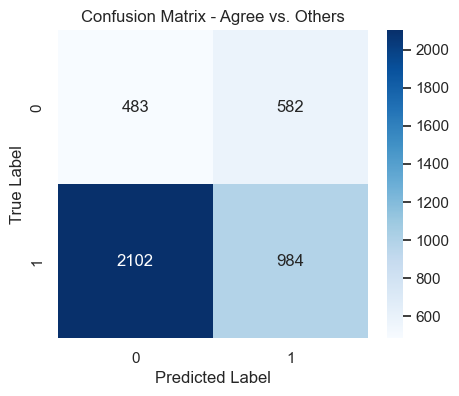

Classification Report for Neutral vs. Others
              precision    recall  f1-score   support

           0       0.88      0.64      0.74      3523
           1       0.20      0.49      0.28       628

    accuracy                           0.62      4151
   macro avg       0.54      0.57      0.51      4151
weighted avg       0.77      0.62      0.67      4151



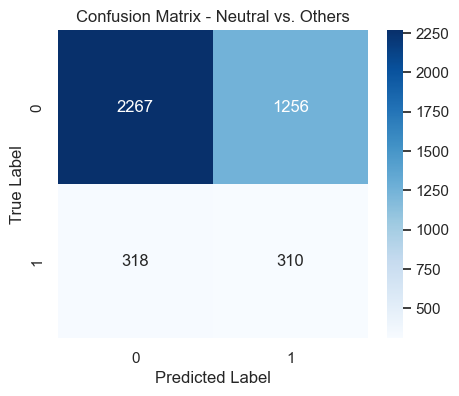

Classification Report for Disagree vs. Others
              precision    recall  f1-score   support

           0       0.94      0.65      0.77      3714
           1       0.17      0.62      0.27       437

    accuracy                           0.65      4151
   macro avg       0.55      0.64      0.52      4151
weighted avg       0.86      0.65      0.72      4151



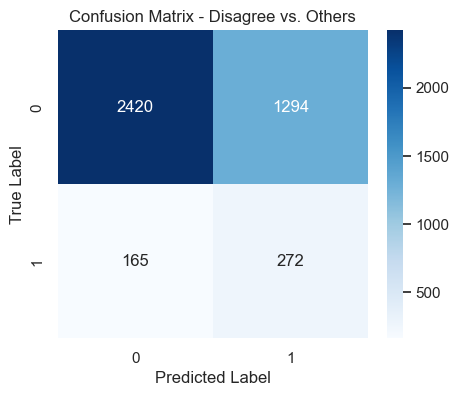

In [759]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, label):
    """Evaluate a binary logistic regression model."""
    y_pred = model.predict(X_test)
    
    # Print Classification Report
    print(f"Classification Report for {label} vs. Others")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {label} vs. Others")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Evaluate all three models
evaluate_model(model_agree, X_test, y_test_agree, "Agree")
evaluate_model(model_neutral, X_test, y_test_neutral, "Neutral")
evaluate_model(model_disagree, X_test, y_test_disagree, "Disagree")


One-vs-All (OvA) Multi-Class Accuracy: 0.7434


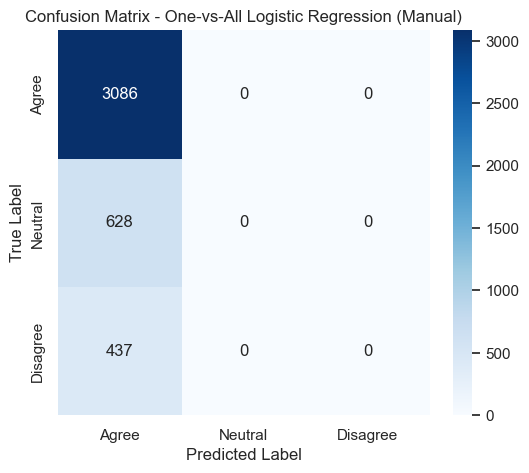

In [761]:
import numpy as np

# Get Probabilities for Each Class
y_prob_agree = model_agree.predict_proba(X_test)[:, 1]  # Probability of being "Agree"
y_prob_neutral = model_neutral.predict_proba(X_test)[:, 1]  # Probability of being "Neutral"
y_prob_disagree = model_disagree.predict_proba(X_test)[:, 1]  # Probability of being "Disagree"

# Stack Probabilities to Identify the Class with the Highest Confidence
y_prob_stack = np.vstack([y_prob_agree, y_prob_neutral, y_prob_disagree]).T

# Assign Final Predicted Label as the Class with Maximum Probability
y_pred_final = np.argmax(y_prob_stack, axis=1) + 1  # Adding 1 to match class labels {1,2,3}

# Compute One-vs-All Accuracy
from sklearn.metrics import accuracy_score
ova_accuracy = accuracy_score(y_test, y_pred_final)
print(f"One-vs-All (OvA) Multi-Class Accuracy: {ova_accuracy:.4f}")

# Compute One-vs-All Confusion Matrix
cm_ova = confusion_matrix(y_test, y_pred_final)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ova, annot=True, fmt="d", cmap="Blues", xticklabels=["Agree", "Neutral", "Disagree"], yticklabels=["Agree", "Neutral", "Disagree"])
plt.title("Confusion Matrix - One-vs-All Logistic Regression (Manual)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Optimized Threshold for Agree: 0.142
Optimized Threshold for Neutral: 0.422
Optimized Threshold for Disagree: 0.618

One-vs-All (Optimized) Multi-Class Accuracy: 0.6974


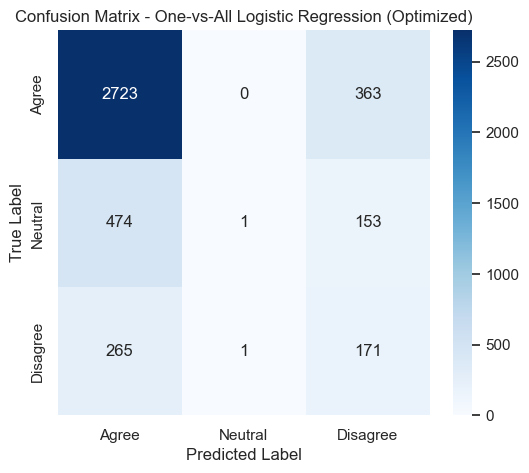

In [221]:
# Computing the Optimized Thresholds and Perform Evaluation

# Ensure that models predict probabilities for each class
y_prob_agree = model_agree.predict_proba(X_test)[:, 1]  # Probability of being "Agree"
y_prob_neutral = model_neutral.predict_proba(X_test)[:, 1]  # Probability of being "Neutral"
y_prob_disagree = model_disagree.predict_proba(X_test)[:, 1]  # Probability of being "Disagree"


# Compute precision-recall curves
prec_agree, rec_agree, thresholds_agree = precision_recall_curve(y_test_agree, y_prob_agree)
prec_neutral, rec_neutral, thresholds_neutral = precision_recall_curve(y_test_neutral, y_prob_neutral)
prec_disagree, rec_disagree, thresholds_disagree = precision_recall_curve(y_test_disagree, y_prob_disagree)

# Compute F1 score for each threshold
f1_scores_agree = 2 * (prec_agree * rec_agree) / (prec_agree + rec_agree + 1e-9)
f1_scores_neutral = 2 * (prec_neutral * rec_neutral) / (prec_neutral + rec_neutral + 1e-9)
f1_scores_disagree = 2 * (prec_disagree * rec_disagree) / (prec_disagree + rec_disagree + 1e-9)

# Select threshold with highest F1 score
best_threshold_agree = thresholds_agree[np.argmax(f1_scores_agree)]
best_threshold_neutral = thresholds_neutral[np.argmax(f1_scores_neutral)]
best_threshold_disagree = thresholds_disagree[np.argmax(f1_scores_disagree)]

print(f"Optimized Threshold for Agree: {best_threshold_agree:.3f}")
print(f"Optimized Threshold for Neutral: {best_threshold_neutral:.3f}")
print(f"Optimized Threshold for Disagree: {best_threshold_disagree:.3f}")

# Initialize predictions to class "Neutral" (default)
y_pred_final = np.full(len(X_test), 2)  # Neutral as default (Class 2)

# Assign class if probability exceeds the optimized threshold
y_pred_final[y_prob_agree >= best_threshold_agree] = 1  # Assign "Agree" if threshold met
y_pred_final[y_prob_disagree >= best_threshold_disagree] = 3  # Assign "Disagree" if threshold met

# Compute final accuracy
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"\nOne-vs-All (Optimized) Multi-Class Accuracy: {final_accuracy:.4f}")

# Confusion Matrix
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues", xticklabels=["Agree", "Neutral", "Disagree"], yticklabels=["Agree", "Neutral", "Disagree"])
plt.title("Confusion Matrix - One-vs-All Logistic Regression (Optimized)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### 4-3 Model Training  and Model Comparison
<a id="model-training-and-model-comparison"></a>
#### 4-3-1 K-Nearest Neighbors (KNN)
<a id="KNN"></a>

In [741]:
# Load the preprocessed dataset (Mutual Info selected features for KNN & SVM)
X_train = pd.read_csv("train_knn_svm_mi.csv")
X_test = pd.read_csv("test_knn_svm_mi.csv")
# Load target variable
train_full = pd.read_csv("train_transformed.csv")
test_full = pd.read_csv("test_transformed.csv")

y_train = train_full["inc_redist"]
y_test = test_full["inc_redist"]

# Convert multi-class target to binary for each class
y_train_agree = (y_train == 1).astype(int)
y_train_neutral = (y_train == 2).astype(int)
y_train_disagree = (y_train == 3).astype(int)

y_test_agree = (y_test == 1).astype(int)
y_test_neutral = (y_test == 2).astype(int)
y_test_disagree = (y_test == 3).astype(int)


In [743]:
# Define the number of neighbors (can be optimized later)
n_neighbors = 5

# Initialize KNN models for One-vs-All (OvA)
knn_agree = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_neutral = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_disagree = KNeighborsClassifier(n_neighbors=n_neighbors)

# Train separate models for each class
knn_agree.fit(X_train, y_train_agree)
knn_neutral.fit(X_train, y_train_neutral)
knn_disagree.fit(X_train, y_train_disagree)

KNeighborsClassifier()

Classification Report for Agree vs. Others:
              precision    recall  f1-score   support

           0       0.44      0.24      0.31      1065
           1       0.77      0.90      0.83      3086

    accuracy                           0.73      4151
   macro avg       0.61      0.57      0.57      4151
weighted avg       0.69      0.73      0.70      4151



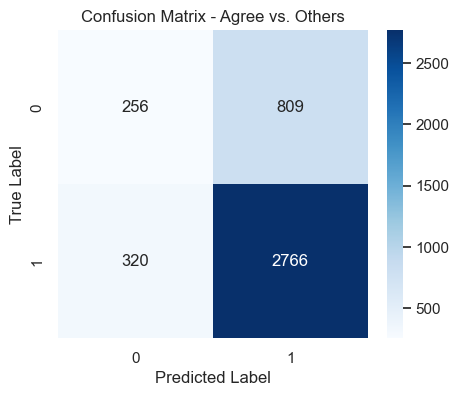

Classification Report for Neutral vs. Others:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      3523
           1       0.24      0.05      0.08       628

    accuracy                           0.83      4151
   macro avg       0.54      0.51      0.50      4151
weighted avg       0.76      0.83      0.78      4151



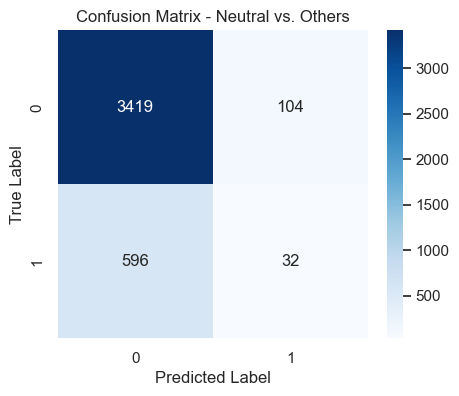

Classification Report for Disagree vs. Others:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3714
           1       0.30      0.06      0.10       437

    accuracy                           0.89      4151
   macro avg       0.60      0.52      0.52      4151
weighted avg       0.84      0.89      0.85      4151



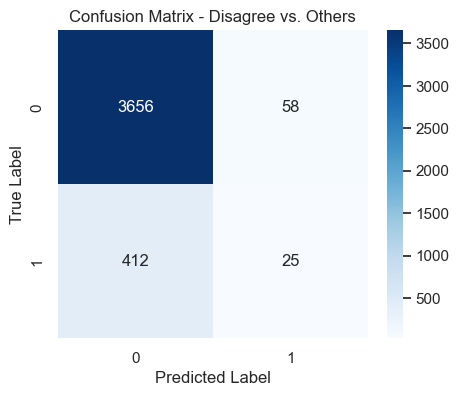

In [745]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate each binary KNN model separately
def evaluate_ova_model(model, X_test, y_test, label):
    """Evaluate a binary KNN model."""
    y_pred = model.predict(X_test)
    
    # Print classification report
    print(f"Classification Report for {label} vs. Others:")
    print(classification_report(y_test, y_pred))

    # Compute Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {label} vs. Others")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Evaluate each class separately
evaluate_ova_model(knn_agree, X_test, y_test_agree, "Agree")
evaluate_ova_model(knn_neutral, X_test, y_test_neutral, "Neutral")
evaluate_ova_model(knn_disagree, X_test, y_test_disagree, "Disagree")


Optimized Threshold for Agree: 0.200
Optimized Threshold for Neutral: 0.200
Optimized Threshold for Disagree: 0.400
One-vs-All (Optimized) Multi-Class Accuracy: 0.7179
Classification Report - One-vs-All KNN (Optimized):
              precision    recall  f1-score   support

           1     0.7682    0.9323    0.8423      3086
           2     0.2000    0.0016    0.0032       628
           3     0.2544    0.2334    0.2434       437

    accuracy                         0.7179      4151
   macro avg     0.4075    0.3891    0.3630      4151
weighted avg     0.6282    0.7179    0.6523      4151



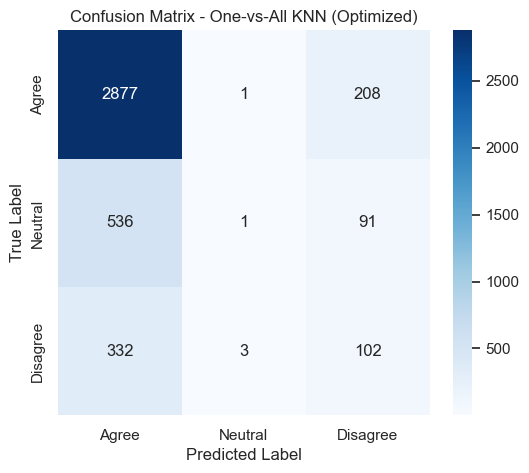

In [747]:
# Computing the Optimized Thresholds and Perform Evaluation

# Predict probabilities for each class using trained KNN models
y_prob_agree = knn_agree.predict_proba(X_test)[:, 1]  # Probability of "Agree"
y_prob_neutral = knn_neutral.predict_proba(X_test)[:, 1]  # Probability of "Neutral"
y_prob_disagree = knn_disagree.predict_proba(X_test)[:, 1]  # Probability of "Disagree"

# Compute precision-recall curves
prec_agree, rec_agree, thresholds_agree = precision_recall_curve(y_test_agree, y_prob_agree)
prec_neutral, rec_neutral, thresholds_neutral = precision_recall_curve(y_test_neutral, y_prob_neutral)
prec_disagree, rec_disagree, thresholds_disagree = precision_recall_curve(y_test_disagree, y_prob_disagree)

# Compute F1 scores for each threshold
f1_scores_agree = 2 * (prec_agree * rec_agree) / (prec_agree + rec_agree + 1e-9)
f1_scores_neutral = 2 * (prec_neutral * rec_neutral) / (prec_neutral + rec_neutral + 1e-9)
f1_scores_disagree = 2 * (prec_disagree * rec_disagree) / (prec_disagree + rec_disagree + 1e-9)

# Select threshold with highest F1 score
best_threshold_agree = thresholds_agree[np.argmax(f1_scores_agree)]
best_threshold_neutral = thresholds_neutral[np.argmax(f1_scores_neutral)]
best_threshold_disagree = thresholds_disagree[np.argmax(f1_scores_disagree)]

print(f"Optimized Threshold for Agree: {best_threshold_agree:.3f}")
print(f"Optimized Threshold for Neutral: {best_threshold_neutral:.3f}")
print(f"Optimized Threshold for Disagree: {best_threshold_disagree:.3f}")

# Initialize predictions to class "Neutral" (default)
y_pred_final = np.full(len(X_test), 2)  # Neutral as default (Class 2)

# Assign class if probability exceeds the optimized threshold
y_pred_final[y_prob_agree >= best_threshold_agree] = 1  # Assign "Agree" if threshold met
y_pred_final[y_prob_disagree >= best_threshold_disagree] = 3  # Assign "Disagree" if threshold met

# Compute final accuracy
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"One-vs-All (Optimized) Multi-Class Accuracy: {final_accuracy:.4f}")

# Print Classification Report
print("Classification Report - One-vs-All KNN (Optimized):")
print(classification_report(y_test, y_pred_final, digits=4))

# Confusion Matrix
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues", xticklabels=["Agree", "Neutral", "Disagree"], yticklabels=["Agree", "Neutral", "Disagree"])
plt.title("Confusion Matrix - One-vs-All KNN (Optimized)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### 4-3-2 Support Vector Machine (SVM)
<a id="SVM"></a>

In [472]:
# Load the dataset
X_train = pd.read_csv("train_knn_svm_mi.csv")  # Mutual Info dataset for KNN & SVM
X_test = pd.read_csv("test_knn_svm_mi.csv")

# Load target variable
train_full = pd.read_csv("train_transformed.csv")
test_full = pd.read_csv("test_transformed.csv")

y_train = train_full["inc_redist"]
y_test = test_full["inc_redist"]

# Convert multi-class target to binary for each class
y_train_agree = (y_train == 1).astype(int)
y_train_neutral = (y_train == 2).astype(int)
y_train_disagree = (y_train == 3).astype(int)

y_test_agree = (y_test == 1).astype(int)
y_test_neutral = (y_test == 2).astype(int)
y_test_disagree = (y_test == 3).astype(int)


In [474]:
# Train SVM models (Using linear kernel, balanced class weights)
svm_agree = SVC(kernel="linear", probability=True, class_weight="balanced", random_state=42)
svm_neutral = SVC(kernel="linear", probability=True, class_weight="balanced", random_state=42)
svm_disagree = SVC(kernel="linear", probability=True, class_weight="balanced", random_state=42)

# Fit models to training data
svm_agree.fit(X_train, y_train_agree)
svm_neutral.fit(X_train, y_train_neutral)
svm_disagree.fit(X_train, y_train_disagree)



SVC(class_weight='balanced', kernel='linear', probability=True, random_state=42)

Classification Report for Agree vs. Others
              precision    recall  f1-score   support

           0       0.36      0.57      0.45      1065
           1       0.82      0.65      0.73      3086

    accuracy                           0.63      4151
   macro avg       0.59      0.61      0.59      4151
weighted avg       0.70      0.63      0.65      4151



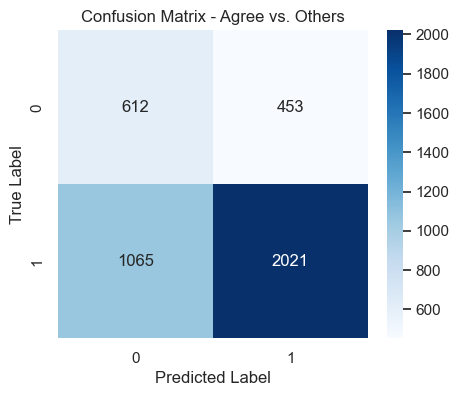

Classification Report for Neutral vs. Others
              precision    recall  f1-score   support

           0       0.89      0.59      0.71      3523
           1       0.20      0.59      0.30       628

    accuracy                           0.59      4151
   macro avg       0.55      0.59      0.50      4151
weighted avg       0.79      0.59      0.65      4151



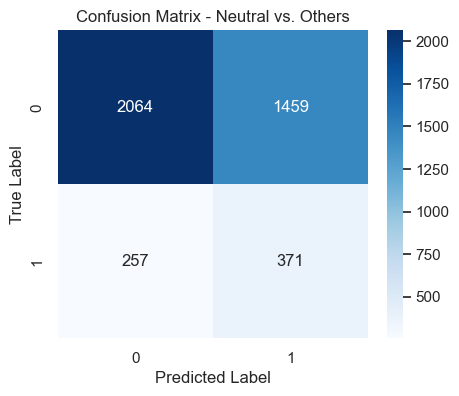

Classification Report for Disagree vs. Others
              precision    recall  f1-score   support

           0       0.93      0.68      0.79      3714
           1       0.18      0.59      0.27       437

    accuracy                           0.67      4151
   macro avg       0.56      0.63      0.53      4151
weighted avg       0.85      0.67      0.73      4151



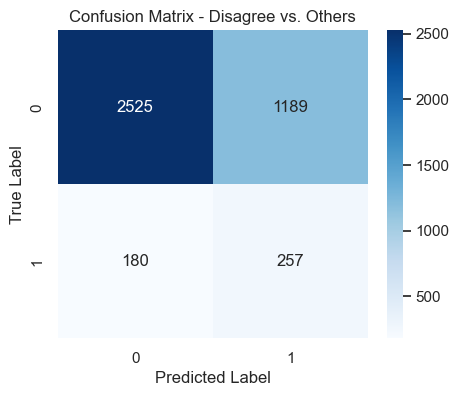

In [476]:
def evaluate_model(model, X_test, y_test, label):
    """Evaluate a binary SVM model"""
    y_pred = model.predict(X_test)

    # Print Classification Report
    print(f"Classification Report for {label} vs. Others")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {label} vs. Others")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Evaluate all three models
evaluate_model(svm_agree, X_test, y_test_agree, "Agree")
evaluate_model(svm_neutral, X_test, y_test_neutral, "Neutral")
evaluate_model(svm_disagree, X_test, y_test_disagree, "Disagree")



Optimized Threshold for Agree: 0.494
Optimized Threshold for Neutral: 0.151
Optimized Threshold for Disagree: 0.155
One-vs-All (Optimized) Multi-Class Accuracy: 0.6885
Classification Report - One-vs-All SVM (linear) (Optimized):
              precision    recall  f1-score   support

           1     0.7886    0.8655    0.8253      3086
           2     0.0000    0.0000    0.0000       628
           3     0.2448    0.4279    0.3114       437

    accuracy                         0.6885      4151
   macro avg     0.3445    0.4311    0.3789      4151
weighted avg     0.6120    0.6885    0.6463      4151



/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


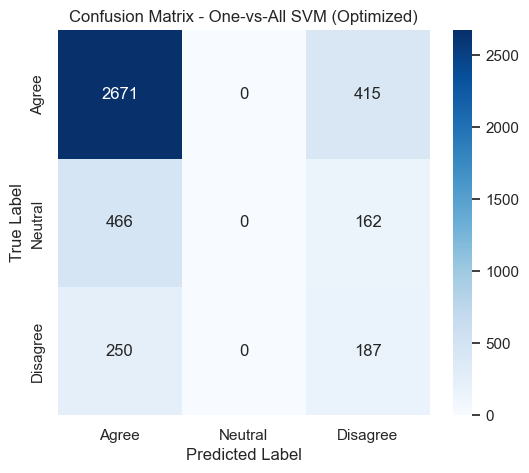

In [478]:
# Computing the Optimized Thresholds and Perform Evaluation

# Predict probabilities for each class using trained SVM models
y_prob_agree = svm_agree.predict_proba(X_test)[:, 1]  # Probability of "Agree"
y_prob_neutral = svm_neutral.predict_proba(X_test)[:, 1]  # Probability of "Neutral"
y_prob_disagree = svm_disagree.predict_proba(X_test)[:, 1]  # Probability of "Disagree"

# Compute precision-recall curves
prec_agree, rec_agree, thresholds_agree = precision_recall_curve(y_test_agree, y_prob_agree)
prec_neutral, rec_neutral, thresholds_neutral = precision_recall_curve(y_test_neutral, y_prob_neutral)
prec_disagree, rec_disagree, thresholds_disagree = precision_recall_curve(y_test_disagree, y_prob_disagree)

# Compute F1 scores for each threshold
f1_scores_agree = 2 * (prec_agree * rec_agree) / (prec_agree + rec_agree + 1e-9)
f1_scores_neutral = 2 * (prec_neutral * rec_neutral) / (prec_neutral + rec_neutral + 1e-9)
f1_scores_disagree = 2 * (prec_disagree * rec_disagree) / (prec_disagree + rec_disagree + 1e-9)

# Select threshold with highest F1 score
best_threshold_agree = thresholds_agree[np.argmax(f1_scores_agree)]
best_threshold_neutral = thresholds_neutral[np.argmax(f1_scores_neutral)]
best_threshold_disagree = thresholds_disagree[np.argmax(f1_scores_disagree)]

print(f"Optimized Threshold for Agree: {best_threshold_agree:.3f}")
print(f"Optimized Threshold for Neutral: {best_threshold_neutral:.3f}")
print(f"Optimized Threshold for Disagree: {best_threshold_disagree:.3f}")

# Initialize predictions to class "Neutral" (default)
y_pred_final = np.full(len(X_test), 2)  # Neutral as default (Class 2)

# Assign class if probability exceeds the optimized threshold
y_pred_final[y_prob_agree >= best_threshold_agree] = 1  # Assign "Agree" if threshold met
y_pred_final[y_prob_disagree >= best_threshold_disagree] = 3  # Assign "Disagree" if threshold met

# Compute final accuracy
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"One-vs-All (Optimized) Multi-Class Accuracy: {final_accuracy:.4f}")

# Print Classification Report
print("Classification Report - One-vs-All SVM (linear) (Optimized):")
print(classification_report(y_test, y_pred_final, digits=4))

# Confusion Matrix
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues", xticklabels=["Agree", "Neutral", "Disagree"], yticklabels=["Agree", "Neutral", "Disagree"])
plt.title("Confusion Matrix - One-vs-All SVM (Optimized)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [480]:
# Train SVM models (Using rbf kernel, balanced class weights)
svm_agree = SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42)
svm_neutral = SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42)
svm_disagree = SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42)

# Fit models to training data
svm_agree.fit(X_train, y_train_agree)
svm_neutral.fit(X_train, y_train_neutral)
svm_disagree.fit(X_train, y_train_disagree)

SVC(class_weight='balanced', probability=True, random_state=42)

Classification Report for Agree vs. Others
              precision    recall  f1-score   support

           0       0.38      0.61      0.47      1065
           1       0.83      0.65      0.73      3086

    accuracy                           0.64      4151
   macro avg       0.60      0.63      0.60      4151
weighted avg       0.71      0.64      0.66      4151



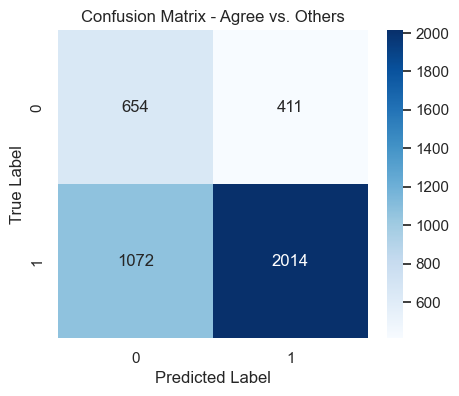

Classification Report for Neutral vs. Others
              precision    recall  f1-score   support

           0       0.90      0.54      0.68      3523
           1       0.20      0.64      0.31       628

    accuracy                           0.56      4151
   macro avg       0.55      0.59      0.49      4151
weighted avg       0.79      0.56      0.62      4151



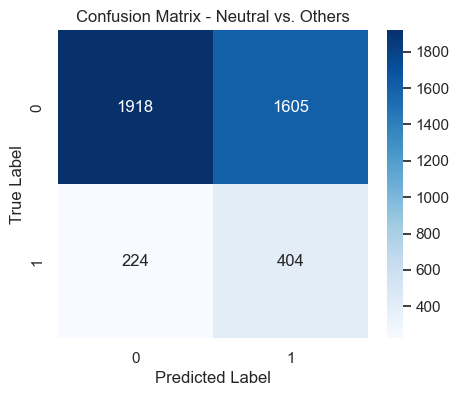

Classification Report for Disagree vs. Others
              precision    recall  f1-score   support

           0       0.94      0.71      0.81      3714
           1       0.20      0.60      0.30       437

    accuracy                           0.70      4151
   macro avg       0.57      0.66      0.55      4151
weighted avg       0.86      0.70      0.76      4151



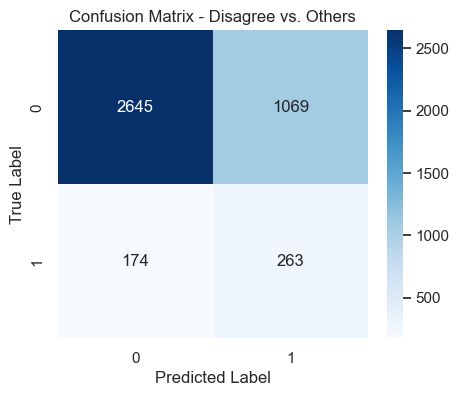

In [481]:
def evaluate_model(model, X_test, y_test, label):
    """Evaluate a binary SVM model"""
    y_pred = model.predict(X_test)

    # Print Classification Report
    print(f"Classification Report for {label} vs. Others")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {label} vs. Others")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Evaluate all three models
evaluate_model(svm_agree, X_test, y_test_agree, "Agree")
evaluate_model(svm_neutral, X_test, y_test_neutral, "Neutral")
evaluate_model(svm_disagree, X_test, y_test_disagree, "Disagree")



\Optimized Threshold for Agree: 0.395
Optimized Threshold for Neutral: 0.142
Optimized Threshold for Disagree: 0.178
One-vs-All (Optimized) Multi-Class Accuracy: 0.7049
Classification Report - One-vs-All SVM (rbf) (Optimized):
              precision    recall  f1-score   support

           1     0.7895    0.8846    0.8344      3086
           2     0.0000    0.0000    0.0000       628
           3     0.2828    0.4485    0.3469       437

    accuracy                         0.7049      4151
   macro avg     0.3574    0.4444    0.3938      4151
weighted avg     0.6167    0.7049    0.6568      4151



/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


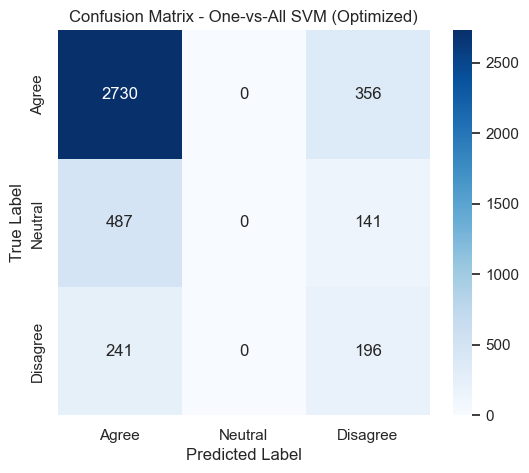

In [482]:
# Computing the Optimized Thresholds and Perform Evaluation

# Predict probabilities for each class using trained SVM models
y_prob_agree = svm_agree.predict_proba(X_test)[:, 1]  # Probability of "Agree"
y_prob_neutral = svm_neutral.predict_proba(X_test)[:, 1]  # Probability of "Neutral"
y_prob_disagree = svm_disagree.predict_proba(X_test)[:, 1]  # Probability of "Disagree"

# Compute precision-recall curves
prec_agree, rec_agree, thresholds_agree = precision_recall_curve(y_test_agree, y_prob_agree)
prec_neutral, rec_neutral, thresholds_neutral = precision_recall_curve(y_test_neutral, y_prob_neutral)
prec_disagree, rec_disagree, thresholds_disagree = precision_recall_curve(y_test_disagree, y_prob_disagree)

# Compute F1 scores for each threshold
f1_scores_agree = 2 * (prec_agree * rec_agree) / (prec_agree + rec_agree + 1e-9)
f1_scores_neutral = 2 * (prec_neutral * rec_neutral) / (prec_neutral + rec_neutral + 1e-9)
f1_scores_disagree = 2 * (prec_disagree * rec_disagree) / (prec_disagree + rec_disagree + 1e-9)

# Select threshold with highest F1 score
best_threshold_agree = thresholds_agree[np.argmax(f1_scores_agree)]
best_threshold_neutral = thresholds_neutral[np.argmax(f1_scores_neutral)]
best_threshold_disagree = thresholds_disagree[np.argmax(f1_scores_disagree)]

print(f"\Optimized Threshold for Agree: {best_threshold_agree:.3f}")
print(f"Optimized Threshold for Neutral: {best_threshold_neutral:.3f}")
print(f"Optimized Threshold for Disagree: {best_threshold_disagree:.3f}")

# Initialize predictions to class "Neutral" (default)
y_pred_final = np.full(len(X_test), 2)  # Neutral as default (Class 2)

# Assign class if probability exceeds the optimized threshold
y_pred_final[y_prob_agree >= best_threshold_agree] = 1  # Assign "Agree" if threshold met
y_pred_final[y_prob_disagree >= best_threshold_disagree] = 3  # Assign "Disagree" if threshold met

# Compute final accuracy
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"One-vs-All (Optimized) Multi-Class Accuracy: {final_accuracy:.4f}")

# Print Classification Report
print("Classification Report - One-vs-All SVM (rbf) (Optimized):")
print(classification_report(y_test, y_pred_final, digits=4))

# Confusion Matrix
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues", xticklabels=["Agree", "Neutral", "Disagree"], yticklabels=["Agree", "Neutral", "Disagree"])
plt.title("Confusion Matrix - One-vs-All SVM (Optimized)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



#### 4-3-3 Naïve Bayes
<a id="Naïve-Bayes"></a>

In [492]:
# Load dataset (Categorical Educational Mobility)
X_train = pd.read_csv("train_full_models.csv")  # Full dataset after dropping unnecessary features
X_test = pd.read_csv("test_full_models.csv")

# Load target variable
train_full = pd.read_csv("train_transformed.csv")
test_full = pd.read_csv("test_transformed.csv")

y_train = train_full["inc_redist"]
y_test = test_full["inc_redist"]


# Convert multi-class target to binary for each class
y_train_agree = (y_train == 1).astype(int)
y_train_neutral = (y_train == 2).astype(int)
y_train_disagree = (y_train == 3).astype(int)

y_test_agree = (y_test == 1).astype(int)
y_test_neutral = (y_test == 2).astype(int)
y_test_disagree = (y_test == 3).astype(int)


In [494]:
# Initialize Naïve Bayes models
nb_agree = GaussianNB()
nb_neutral = GaussianNB()
nb_disagree = GaussianNB()

# Train separate models for each class
nb_agree.fit(X_train, y_train_agree)
nb_neutral.fit(X_train, y_train_neutral)
nb_disagree.fit(X_train, y_train_disagree)


GaussianNB()

Classification Report for Agree vs. Others
              precision    recall  f1-score   support

           0       0.38      0.38      0.38      1065
           1       0.79      0.78      0.78      3086

    accuracy                           0.68      4151
   macro avg       0.58      0.58      0.58      4151
weighted avg       0.68      0.68      0.68      4151



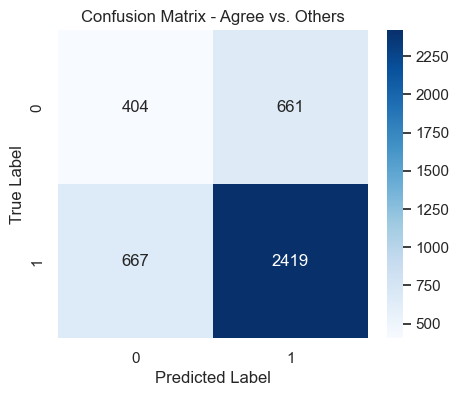

Classification Report for Neutral vs. Others
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3523
           1       0.23      0.13      0.17       628

    accuracy                           0.80      4151
   macro avg       0.54      0.53      0.53      4151
weighted avg       0.76      0.80      0.78      4151



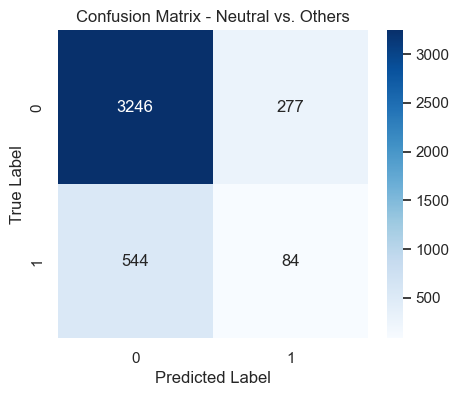

Classification Report for Disagree vs. Others
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      3714
           1       0.20      0.24      0.21       437

    accuracy                           0.82      4151
   macro avg       0.55      0.56      0.56      4151
weighted avg       0.83      0.82      0.82      4151



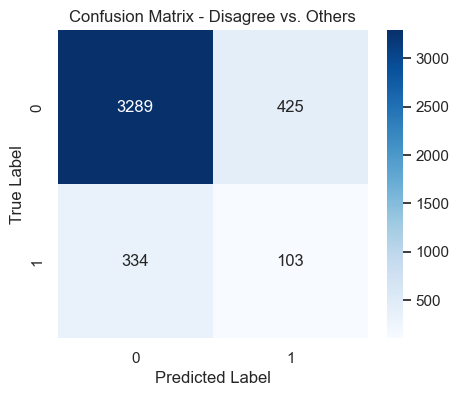

In [496]:
def evaluate_model(model, X_test, y_test, label):
    """Evaluate a binary Naïve Bayes model."""
    y_pred = model.predict(X_test)
    
    # Print Classification Report
    print(f"Classification Report for {label} vs. Others")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {label} vs. Others")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Evaluate all three models
evaluate_model(nb_agree, X_test, y_test_agree, "Agree")
evaluate_model(nb_neutral, X_test, y_test_neutral, "Neutral")
evaluate_model(nb_disagree, X_test, y_test_disagree, "Disagree")


Optimized Threshold for Agree: 0.012
Optimized Threshold for Neutral: 0.092
Optimized Threshold for Disagree: 0.133
One-vs-All (Optimized) Multi-Class Accuracy: 0.5550
Classification Report - One-vs-All Naïve Bayes (Optimized):
              precision    recall  f1-score   support

           1     0.7988    0.6627    0.7244      3086
           2     1.0000    0.0032    0.0063       628
           3     0.1617    0.5881    0.2537       437

    accuracy                         0.5550      4151
   macro avg     0.6535    0.4180    0.3282      4151
weighted avg     0.7622    0.5550    0.5662      4151



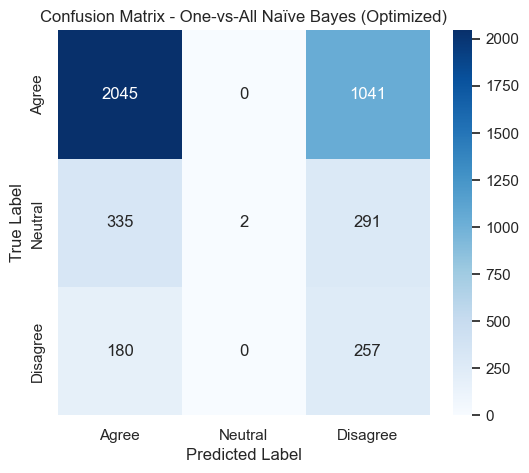

In [500]:
# Computing the Optimized Thresholds and Perform Evaluation

# Get probability predictions
y_prob_agree = nb_agree.predict_proba(X_test)[:, 1]  # Probability of "Agree"
y_prob_neutral = nb_neutral.predict_proba(X_test)[:, 1]  # Probability of "Neutral"
y_prob_disagree = nb_disagree.predict_proba(X_test)[:, 1]  # Probability of "Disagree"

# Compute precision-recall curves
prec_agree, rec_agree, thresholds_agree = precision_recall_curve(y_test_agree, y_prob_agree)
prec_neutral, rec_neutral, thresholds_neutral = precision_recall_curve(y_test_neutral, y_prob_neutral)
prec_disagree, rec_disagree, thresholds_disagree = precision_recall_curve(y_test_disagree, y_prob_disagree)

# Compute F1 score for each threshold
f1_scores_agree = 2 * (prec_agree * rec_agree) / (prec_agree + rec_agree + 1e-9)
f1_scores_neutral = 2 * (prec_neutral * rec_neutral) / (prec_neutral + rec_neutral + 1e-9)
f1_scores_disagree = 2 * (prec_disagree * rec_disagree) / (prec_disagree + rec_disagree + 1e-9)

# Select best thresholds
best_threshold_agree = thresholds_agree[np.argmax(f1_scores_agree)]
best_threshold_neutral = thresholds_neutral[np.argmax(f1_scores_neutral)]
best_threshold_disagree = thresholds_disagree[np.argmax(f1_scores_disagree)]

print(f"Optimized Threshold for Agree: {best_threshold_agree:.3f}")
print(f"Optimized Threshold for Neutral: {best_threshold_neutral:.3f}")
print(f"Optimized Threshold for Disagree: {best_threshold_disagree:.3f}")

# Initialize predictions as "Neutral" (default)
y_pred_final = np.full(len(X_test), 2)  # Neutral as default (Class 2)

# Assign class based on optimized threshold
y_pred_final[y_prob_agree >= best_threshold_agree] = 1  # Assign "Agree"
y_pred_final[y_prob_disagree >= best_threshold_disagree] = 3  # Assign "Disagree"

# Compute final accuracy
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"One-vs-All (Optimized) Multi-Class Accuracy: {final_accuracy:.4f}")

# Print Classification Report
print("Classification Report - One-vs-All Naïve Bayes (Optimized):")
print(classification_report(y_test, y_pred_final, digits=4))

# Confusion Matrix
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues", xticklabels=["Agree", "Neutral", "Disagree"], yticklabels=["Agree", "Neutral", "Disagree"])
plt.title("Confusion Matrix - One-vs-All Naïve Bayes (Optimized)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### 4-3-4 Random Forest
<a id="RF"></a>

In [504]:
# Load preprocessed dataset for Random Forest (Categorical Educational Mobility)
X_train = pd.read_csv("train_full_models.csv")
X_test = pd.read_csv("test_full_models.csv")

# Load target variable
train_full = pd.read_csv("train_transformed.csv")
test_full = pd.read_csv("test_transformed.csv")

y_train = train_full["inc_redist"]
y_test = test_full["inc_redist"]


# Convert multi-class target to binary for each class
y_train_agree = (y_train == 1).astype(int)
y_train_neutral = (y_train == 2).astype(int)
y_train_disagree = (y_train == 3).astype(int)

y_test_agree = (y_test == 1).astype(int)
y_test_neutral = (y_test == 2).astype(int)
y_test_disagree = (y_test == 3).astype(int)



In [506]:
# Define Random Forest model
rf_agree = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_neutral = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_disagree = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")

# Train models
rf_agree.fit(X_train, y_train_agree)
rf_neutral.fit(X_train, y_train_neutral)
rf_disagree.fit(X_train, y_train_disagree)


RandomForestClassifier(class_weight='balanced', random_state=42)

Classification Report for Agree vs. Others
              precision    recall  f1-score   support

           0       0.62      0.15      0.24      1065
           1       0.77      0.97      0.86      3086

    accuracy                           0.76      4151
   macro avg       0.69      0.56      0.55      4151
weighted avg       0.73      0.76      0.70      4151



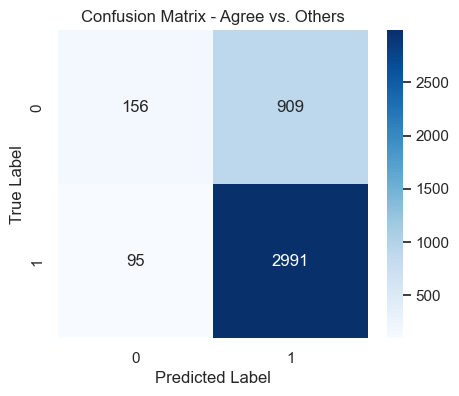

Classification Report for Neutral vs. Others
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3523
           1       0.14      0.00      0.00       628

    accuracy                           0.85      4151
   macro avg       0.50      0.50      0.46      4151
weighted avg       0.74      0.85      0.78      4151



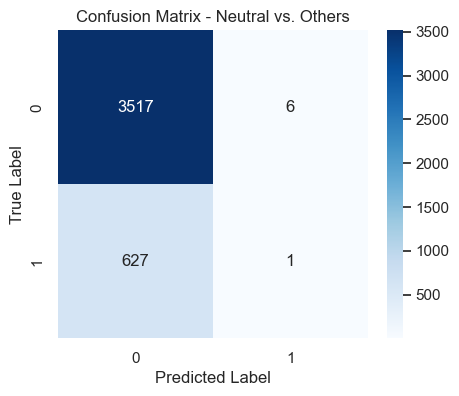

Classification Report for Disagree vs. Others
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      3714
           1       0.55      0.03      0.05       437

    accuracy                           0.90      4151
   macro avg       0.72      0.51      0.50      4151
weighted avg       0.86      0.90      0.85      4151



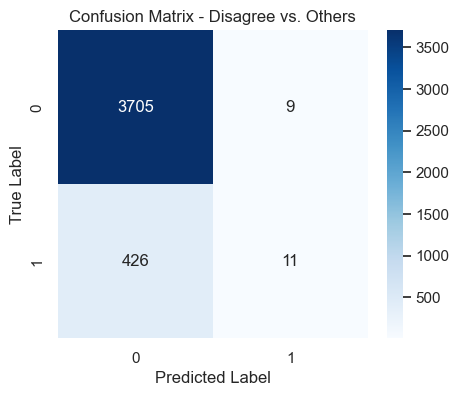

In [508]:
def evaluate_model(model, X_test, y_test, label):
    y_pred = model.predict(X_test)
    print(f"Classification Report for {label} vs. Others")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {label} vs. Others")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Evaluate all three models
evaluate_model(rf_agree, X_test, y_test_agree, "Agree")
evaluate_model(rf_neutral, X_test, y_test_neutral, "Neutral")
evaluate_model(rf_disagree, X_test, y_test_disagree, "Disagree")


Optimized Threshold for Agree: 0.460
Optimized Threshold for Neutral: 0.130
Optimized Threshold for Disagree: 0.190
One-vs-All (Optimized) Multi-Class Accuracy: 0.7128
Classification Report - One-vs-All Random Forest (Optimized):
              precision    recall  f1-score   support

           1     0.7854    0.9025    0.8399      3086
           2     0.2917    0.0111    0.0215       628
           3     0.2874    0.3822    0.3281       437

    accuracy                         0.7128      4151
   macro avg     0.4548    0.4319    0.3965      4151
weighted avg     0.6583    0.7128    0.6622      4151



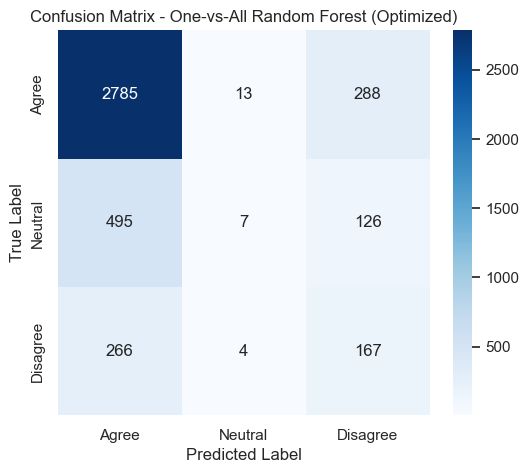

In [510]:
# Computing the Optimized Thresholds and Perform Evaluation

# Predict probabilities for each class
y_prob_agree = rf_agree.predict_proba(X_test)[:, 1]
y_prob_neutral = rf_neutral.predict_proba(X_test)[:, 1]
y_prob_disagree = rf_disagree.predict_proba(X_test)[:, 1]

# Compute precision-recall curves
prec_agree, rec_agree, thresholds_agree = precision_recall_curve(y_test_agree, y_prob_agree)
prec_neutral, rec_neutral, thresholds_neutral = precision_recall_curve(y_test_neutral, y_prob_neutral)
prec_disagree, rec_disagree, thresholds_disagree = precision_recall_curve(y_test_disagree, y_prob_disagree)

# Compute F1 score for each threshold
f1_scores_agree = 2 * (prec_agree * rec_agree) / (prec_agree + rec_agree + 1e-9)
f1_scores_neutral = 2 * (prec_neutral * rec_neutral) / (prec_neutral + rec_neutral + 1e-9)
f1_scores_disagree = 2 * (prec_disagree * rec_disagree) / (prec_disagree + rec_disagree + 1e-9)

# Select threshold with highest F1 score
best_threshold_agree = thresholds_agree[np.argmax(f1_scores_agree)]
best_threshold_neutral = thresholds_neutral[np.argmax(f1_scores_neutral)]
best_threshold_disagree = thresholds_disagree[np.argmax(f1_scores_disagree)]

print(f"Optimized Threshold for Agree: {best_threshold_agree:.3f}")
print(f"Optimized Threshold for Neutral: {best_threshold_neutral:.3f}")
print(f"Optimized Threshold for Disagree: {best_threshold_disagree:.3f}")

# Initialize predictions to class "Neutral" (default)
y_pred_final = np.full(len(X_test), 2)  # Neutral as default (Class 2)

# Assign class if probability exceeds the optimized threshold
y_pred_final[y_prob_agree >= best_threshold_agree] = 1  # Assign "Agree"
y_pred_final[y_prob_disagree >= best_threshold_disagree] = 3  # Assign "Disagree"

# Compute final accuracy
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"One-vs-All (Optimized) Multi-Class Accuracy: {final_accuracy:.4f}")

# Print Classification Report
print("Classification Report - One-vs-All Random Forest (Optimized):")
print(classification_report(y_test, y_pred_final, digits=4))

# Confusion Matrix
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues", xticklabels=["Agree", "Neutral", "Disagree"], yticklabels=["Agree", "Neutral", "Disagree"])
plt.title("Confusion Matrix - One-vs-All Random Forest (Optimized)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### 4-3-5 XGBoost and LightGBM
<a id="XGBC-LGBMC"></a>

In [289]:
!pip3 install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.8 MB 5.1 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [514]:
# Load preprocessed dataset 
X_train = pd.read_csv("train_full_models.csv")
X_test = pd.read_csv("test_full_models.csv")

# Load target variable
train_full = pd.read_csv("train_transformed.csv")
test_full = pd.read_csv("test_transformed.csv")

y_train = train_full["inc_redist"]
y_test = test_full["inc_redist"]


# Convert multi-class target to binary for each class
y_train_agree = (y_train == 1).astype(int)
y_train_neutral = (y_train == 2).astype(int)
y_train_disagree = (y_train == 3).astype(int)

y_test_agree = (y_test == 1).astype(int)
y_test_neutral = (y_test == 2).astype(int)
y_test_disagree = (y_test == 3).astype(int)

In [516]:
# Define the Model training and evaluation for XGBoost and LightGBM

def train_and_evaluate(model, X_train, X_test, y_train, y_test, label):
    """Train Gradient Boosting Model and evaluate performance."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Print Classification Report
    print(f"Classification Report for {label} vs. Others")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {label} vs. Others")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    return model


Classification Report for Agree vs. Others
              precision    recall  f1-score   support

           0       0.54      0.22      0.31      1065
           1       0.78      0.94      0.85      3086

    accuracy                           0.75      4151
   macro avg       0.66      0.58      0.58      4151
weighted avg       0.72      0.75      0.71      4151



/Users/dundun/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:23:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


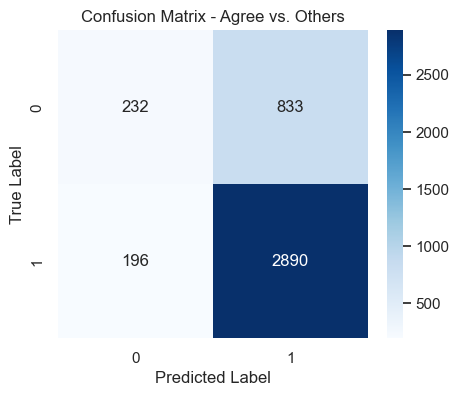

/Users/dundun/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:23:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report for Neutral vs. Others
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      3523
           1       0.22      0.02      0.04       628

    accuracy                           0.84      4151
   macro avg       0.54      0.50      0.48      4151
weighted avg       0.75      0.84      0.78      4151



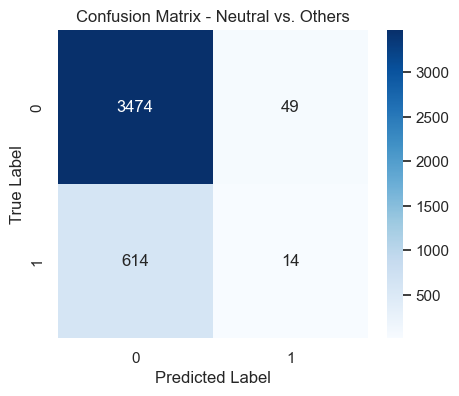

/Users/dundun/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:23:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report for Disagree vs. Others
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3714
           1       0.54      0.10      0.17       437

    accuracy                           0.90      4151
   macro avg       0.72      0.54      0.56      4151
weighted avg       0.86      0.90      0.86      4151



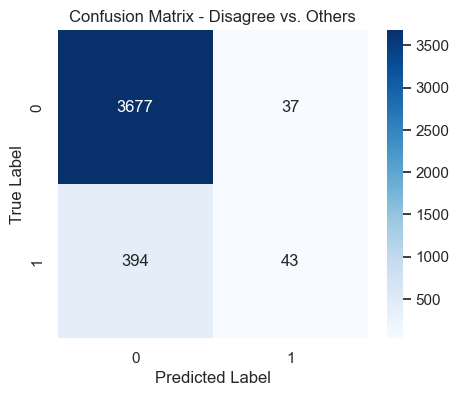

In [518]:
#Training XGBoost for each class

# Initialize XGBoost models for each class
xgb_agree = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_neutral = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_disagree = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Train and evaluate XGBoost models
xgb_agree = train_and_evaluate(xgb_agree, X_train, X_test, y_train_agree, y_test_agree, "Agree")
xgb_neutral = train_and_evaluate(xgb_neutral, X_train, X_test, y_train_neutral, y_test_neutral, "Neutral")
xgb_disagree = train_and_evaluate(xgb_disagree, X_train, X_test, y_train_disagree, y_test_disagree, "Disagree")


[LightGBM] [Info] Number of positive: 12433, number of negative: 4248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 16681, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.745339 -> initscore=1.073906
[LightGBM] [Info] Start training from score 1.073906
Classification Report for Agree vs. Others
              precision    recall  f1-score   support

           0       0.62      0.18      0.28      1065
           1       0.77      0.96      0.86      3086

    accuracy                           0.76      4151
   macro avg       0.70      0.57      0.57      4151
weighted avg       0.73      0.76      0.71      4151



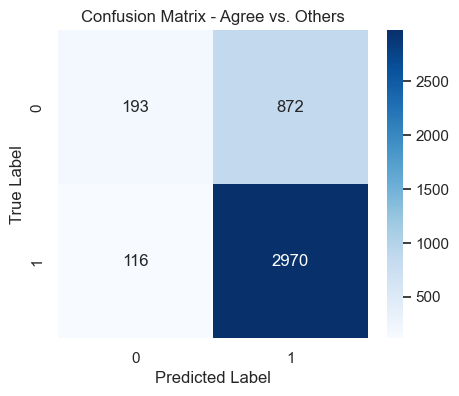

[LightGBM] [Info] Number of positive: 2476, number of negative: 14205
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 16681, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148432 -> initscore=-1.746950
[LightGBM] [Info] Start training from score -1.746950
Classification Report for Neutral vs. Others
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3523
           1       0.11      0.00      0.00       628

    accuracy                           0.85      4151
   macro avg       0.48      0.50      0.46      4151
weighted avg       0.74      0.85      0.78      4151



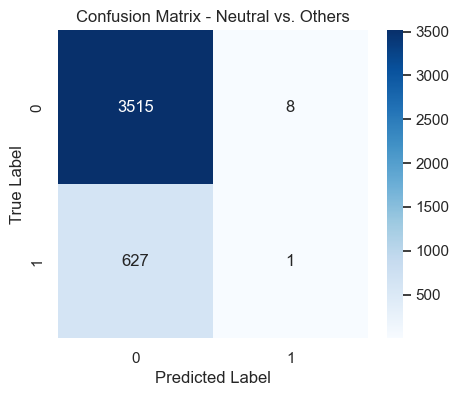

[LightGBM] [Info] Number of positive: 1772, number of negative: 14909
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 16681, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.106229 -> initscore=-2.129856
[LightGBM] [Info] Start training from score -2.129856
Classification Report for Disagree vs. Others
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3714
           1       0.59      0.05      0.09       437

    accuracy                           0.90      4151
   macro avg       0.75      0.52      0.52      4151
weighted avg       0.87      0.90      0.86      4151



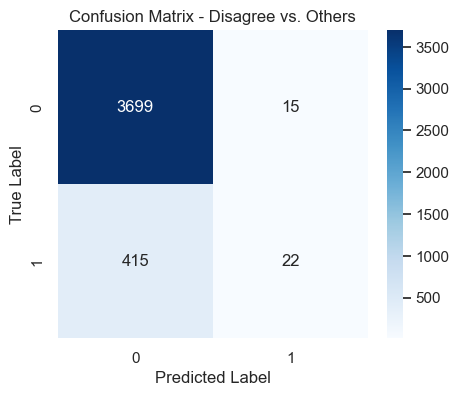

In [520]:
# Training LightGBM for each class 

# Initialize LightGBM models for each class
lgbm_agree = LGBMClassifier()
lgbm_neutral = LGBMClassifier()
lgbm_disagree = LGBMClassifier()

# Train and evaluate LightGBM models
lgbm_agree = train_and_evaluate(lgbm_agree, X_train, X_test, y_train_agree, y_test_agree, "Agree")
lgbm_neutral = train_and_evaluate(lgbm_neutral, X_train, X_test, y_train_neutral, y_test_neutral, "Neutral")
lgbm_disagree = train_and_evaluate(lgbm_disagree, X_train, X_test, y_train_disagree, y_test_disagree, "Disagree")


Optimized Threshold for Agree: 0.376
Optimized Threshold for Neutral: 0.099
Optimized Threshold for Disagree: 0.184
One-vs-All (Optimized) Multi-Class Accuracy: 0.7087
Classification Report - One-vs-All XGBoost (Optimized):
              precision    recall  f1-score   support

           1     0.7841    0.8966    0.8366      3086
           2     0.2836    0.0303    0.0547       628
           3     0.2811    0.3570    0.3145       437

    accuracy                         0.7087      4151
   macro avg     0.4496    0.4280    0.4019      4151
weighted avg     0.6554    0.7087    0.6633      4151



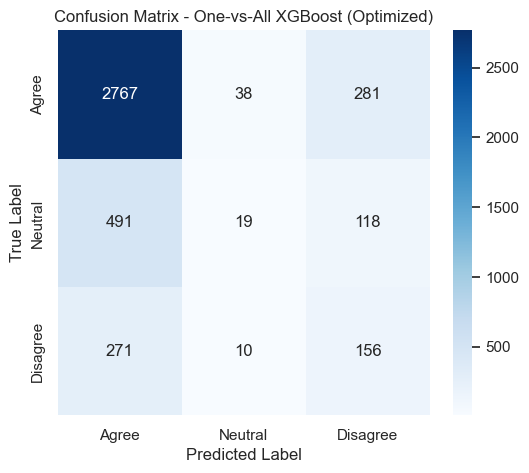

In [522]:
# Computing the Optimized Thresholds and Perform the Evaluation

# Predict Probabilities for Each Class (XGBoost)
y_prob_agree = xgb_agree.predict_proba(X_test)[:, 1]
y_prob_neutral = xgb_neutral.predict_proba(X_test)[:, 1]
y_prob_disagree = xgb_disagree.predict_proba(X_test)[:, 1]

# Compute Precision-Recall Curves
prec_agree, rec_agree, thresholds_agree = precision_recall_curve(y_test_agree, y_prob_agree)
prec_neutral, rec_neutral, thresholds_neutral = precision_recall_curve(y_test_neutral, y_prob_neutral)
prec_disagree, rec_disagree, thresholds_disagree = precision_recall_curve(y_test_disagree, y_prob_disagree)

# Compute F1 Score for Each Threshold
f1_scores_agree = 2 * (prec_agree * rec_agree) / (prec_agree + rec_agree + 1e-9)
f1_scores_neutral = 2 * (prec_neutral * rec_neutral) / (prec_neutral + rec_neutral + 1e-9)
f1_scores_disagree = 2 * (prec_disagree * rec_disagree) / (prec_disagree + rec_disagree + 1e-9)

# Select Best Threshold
best_threshold_agree = thresholds_agree[np.argmax(f1_scores_agree)]
best_threshold_neutral = thresholds_neutral[np.argmax(f1_scores_neutral)]
best_threshold_disagree = thresholds_disagree[np.argmax(f1_scores_disagree)]

print(f"Optimized Threshold for Agree: {best_threshold_agree:.3f}")
print(f"Optimized Threshold for Neutral: {best_threshold_neutral:.3f}")
print(f"Optimized Threshold for Disagree: {best_threshold_disagree:.3f}")

# Initialize Predictions to Class "Neutral"
y_pred_final = np.full(len(X_test), 2)  # Default to Neutral

# Assign Class If Probability Exceeds Threshold
y_pred_final[y_prob_agree >= best_threshold_agree] = 1
y_pred_final[y_prob_disagree >= best_threshold_disagree] = 3

# Compute Final Accuracy
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"One-vs-All (Optimized) Multi-Class Accuracy: {final_accuracy:.4f}")

# Print Classification Report
print("Classification Report - One-vs-All XGBoost (Optimized):")
print(classification_report(y_test, y_pred_final, digits=4))

# Confusion Matrix
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues", xticklabels=["Agree", "Neutral", "Disagree"], yticklabels=["Agree", "Neutral", "Disagree"])
plt.title("Confusion Matrix - One-vs-All XGBoost (Optimized)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Optimized Threshold for Agree: 0.404
Optimized Threshold for Neutral: 0.159
Optimized Threshold for Disagree: 0.197
One-vs-All LightGBM (Optimized) Multi-Class Accuracy: 0.7340
Classification Report - One-vs-All LightGBM (Optimized):
              precision    recall  f1-score   support

           1     0.7817    0.9355    0.8517      3086
           2     0.2941    0.0080    0.0155       628
           3     0.3515    0.3547    0.3531       437

    accuracy                         0.7340      4151
   macro avg     0.4758    0.4327    0.4068      4151
weighted avg     0.6627    0.7340    0.6727      4151



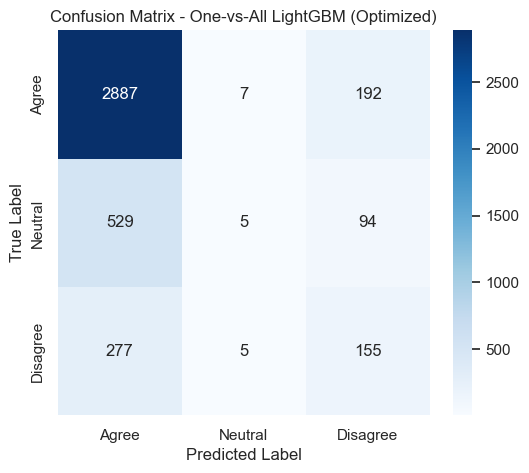

In [524]:
# Computing the Optimized Thresholds and Perform the Evaluation

# Ensure models predict probabilities for each class
y_prob_agree = lgbm_agree.predict_proba(X_test)[:, 1]  # Probability of being "Agree"
y_prob_neutral = lgbm_neutral.predict_proba(X_test)[:, 1]  # Probability of being "Neutral"
y_prob_disagree = lgbm_disagree.predict_proba(X_test)[:, 1]  # Probability of being "Disagree"

# Compute precision-recall curves
prec_agree, rec_agree, thresholds_agree = precision_recall_curve(y_test_agree, y_prob_agree)
prec_neutral, rec_neutral, thresholds_neutral = precision_recall_curve(y_test_neutral, y_prob_neutral)
prec_disagree, rec_disagree, thresholds_disagree = precision_recall_curve(y_test_disagree, y_prob_disagree)

# Compute F1 score for each threshold
f1_scores_agree = 2 * (prec_agree * rec_agree) / (prec_agree + rec_agree + 1e-9)
f1_scores_neutral = 2 * (prec_neutral * rec_neutral) / (prec_neutral + rec_neutral + 1e-9)
f1_scores_disagree = 2 * (prec_disagree * rec_disagree) / (prec_disagree + rec_disagree + 1e-9)

# Select threshold with highest F1 score
best_threshold_agree = thresholds_agree[np.argmax(f1_scores_agree)]
best_threshold_neutral = thresholds_neutral[np.argmax(f1_scores_neutral)]
best_threshold_disagree = thresholds_disagree[np.argmax(f1_scores_disagree)]

print(f"Optimized Threshold for Agree: {best_threshold_agree:.3f}")
print(f"Optimized Threshold for Neutral: {best_threshold_neutral:.3f}")
print(f"Optimized Threshold for Disagree: {best_threshold_disagree:.3f}")

# Initialize predictions to class "Neutral" (default)
y_pred_final = np.full(len(X_test), 2)  # Neutral as default (Class 2)

# Assign class if probability exceeds the optimized threshold
y_pred_final[y_prob_agree >= best_threshold_agree] = 1  # Assign "Agree" if threshold met
y_pred_final[y_prob_disagree >= best_threshold_disagree] = 3  # Assign "Disagree" if threshold met

# Compute final accuracy
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"One-vs-All LightGBM (Optimized) Multi-Class Accuracy: {final_accuracy:.4f}")

# Print Classification Report
print("Classification Report - One-vs-All LightGBM (Optimized):")
print(classification_report(y_test, y_pred_final, digits=4))

# Confusion Matrix
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues", xticklabels=["Agree", "Neutral", "Disagree"], yticklabels=["Agree", "Neutral", "Disagree"])
plt.title("Confusion Matrix - One-vs-All LightGBM (Optimized)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### 4-3-6 Ensemble Method
<a id="multi-model"></a>


Training Models for class: Agree
  ▶️ Logistic Regression - Agree

Classification Report for Logistic Regression - Agree:
              precision    recall  f1-score   support

           0       0.36      0.60      0.45      1065
           1       0.82      0.63      0.71      3086

    accuracy                           0.62      4151
   macro avg       0.59      0.61      0.58      4151
weighted avg       0.70      0.62      0.64      4151

Confusion Matrix for Logistic Regression - Agree:
[[ 641  424]
 [1150 1936]]
  ▶️ SVM - Agree


/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



Classification Report for SVM - Agree:
              precision    recall  f1-score   support

           0       0.35      0.58      0.44      1065
           1       0.81      0.63      0.71      3086

    accuracy                           0.62      4151
   macro avg       0.58      0.61      0.58      4151
weighted avg       0.70      0.62      0.64      4151

Confusion Matrix for SVM - Agree:
[[ 623  442]
 [1144 1942]]
  ▶️ Random Forest - Agree

Classification Report for Random Forest - Agree:
              precision    recall  f1-score   support

           0       0.62      0.15      0.24      1065
           1       0.77      0.97      0.86      3086

    accuracy                           0.76      4151
   macro avg       0.69      0.56      0.55      4151
weighted avg       0.73      0.76      0.70      4151

Confusion Matrix for Random Forest - Agree:
[[ 156  909]
 [  95 2991]]
  ▶️ XGBoost - Agree

Classification Report for XGBoost - Agree:
              precision    recal

/Users/dundun/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:26:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report for LightGBM - Agree:
              precision    recall  f1-score   support

           0       0.62      0.18      0.28      1065
           1       0.77      0.96      0.86      3086

    accuracy                           0.76      4151
   macro avg       0.70      0.57      0.57      4151
weighted avg       0.73      0.76      0.71      4151

Confusion Matrix for LightGBM - Agree:
[[ 193  872]
 [ 116 2970]]

Training Models for class: Neutral
  ▶️ Logistic Regression - Neutral

Classification Report for Logistic Regression - Neutral:
              precision    recall  f1-score   support

           0       0.88      0.59      0.71      3523
           1       0.20      0.56      0.29       628

    accuracy                           0.59      4151
   macro avg       0.54      0.57      0.50      4151
weighted avg       0.78      0.59      0.64      4151

Confusion Matrix for Logistic Regression - Neutral:
[[2079 1444]
 [ 277  351]]
  ▶️ SVM - Neutral


/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



Classification Report for SVM - Neutral:
              precision    recall  f1-score   support

           0       0.88      0.57      0.70      3523
           1       0.20      0.58      0.29       628

    accuracy                           0.58      4151
   macro avg       0.54      0.58      0.49      4151
weighted avg       0.78      0.58      0.64      4151

Confusion Matrix for SVM - Neutral:
[[2025 1498]
 [ 264  364]]
  ▶️ Random Forest - Neutral

Classification Report for Random Forest - Neutral:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3523
           1       0.14      0.00      0.00       628

    accuracy                           0.85      4151
   macro avg       0.50      0.50      0.46      4151
weighted avg       0.74      0.85      0.78      4151

Confusion Matrix for Random Forest - Neutral:
[[3517    6]
 [ 627    1]]
  ▶️ XGBoost - Neutral

Classification Report for XGBoost - Neutral:
              prec

/Users/dundun/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:27:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report for LightGBM - Neutral:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3523
           1       0.11      0.00      0.00       628

    accuracy                           0.85      4151
   macro avg       0.48      0.50      0.46      4151
weighted avg       0.74      0.85      0.78      4151

Confusion Matrix for LightGBM - Neutral:
[[3515    8]
 [ 627    1]]

Training Models for class: Disagree
  ▶️ Logistic Regression - Disagree

Classification Report for Logistic Regression - Disagree:
              precision    recall  f1-score   support

           0       0.94      0.64      0.76      3714
           1       0.17      0.62      0.27       437

    accuracy                           0.64      4151
   macro avg       0.55      0.63      0.52      4151
weighted avg       0.86      0.64      0.71      4151

Confusion Matrix for Logistic Regression - Disagree:
[[2394 1320]
 [ 164  273]]
  ▶️ SVM - Disagree

/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



Classification Report for SVM - Disagree:
              precision    recall  f1-score   support

           0       0.93      0.65      0.77      3714
           1       0.17      0.60      0.27       437

    accuracy                           0.65      4151
   macro avg       0.55      0.63      0.52      4151
weighted avg       0.85      0.65      0.72      4151

Confusion Matrix for SVM - Disagree:
[[2432 1282]
 [ 173  264]]
  ▶️ Random Forest - Disagree

Classification Report for Random Forest - Disagree:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      3714
           1       0.55      0.03      0.05       437

    accuracy                           0.90      4151
   macro avg       0.72      0.51      0.50      4151
weighted avg       0.86      0.90      0.85      4151

Confusion Matrix for Random Forest - Disagree:
[[3705    9]
 [ 426   11]]
  ▶️ XGBoost - Disagree

Classification Report for XGBoost - Disagree:
           

/Users/dundun/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:28:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report for LightGBM - Disagree:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3714
           1       0.59      0.05      0.09       437

    accuracy                           0.90      4151
   macro avg       0.75      0.52      0.52      4151
weighted avg       0.87      0.90      0.86      4151

Confusion Matrix for LightGBM - Disagree:
[[3699   15]
 [ 415   22]]


Model     Class  Accuracy  F1-Score
0   Logistic Regression     Agree  0.620814  0.710981
1                   SVM     Agree  0.617923  0.710055
2         Random Forest     Agree  0.758131  0.856284
3               XGBoost     Agree  0.752108  0.848876
4              LightGBM     Agree  0.761985  0.857390
5   Logistic Regression   Neutral  0.585401  0.289723
6                   SVM   Neutral  0.575524  0.292369
7         Random Forest   Neutral  0.847507  0.003150
8               XGBoost   Neutral  0.840279  0.040521
9              LightGBM   Neutral  0.847025  0.003140
10  Logistic Regression  Disagree  0.642496  0.268966
11                  SVM  Disagree  0.649482  0.266263
12        Random Forest  Disagree  0.895206  0.048140
13              XGBoost  Disagree  0.896170  0.166344
14             LightGBM  Disagree  0.896411  0.092827

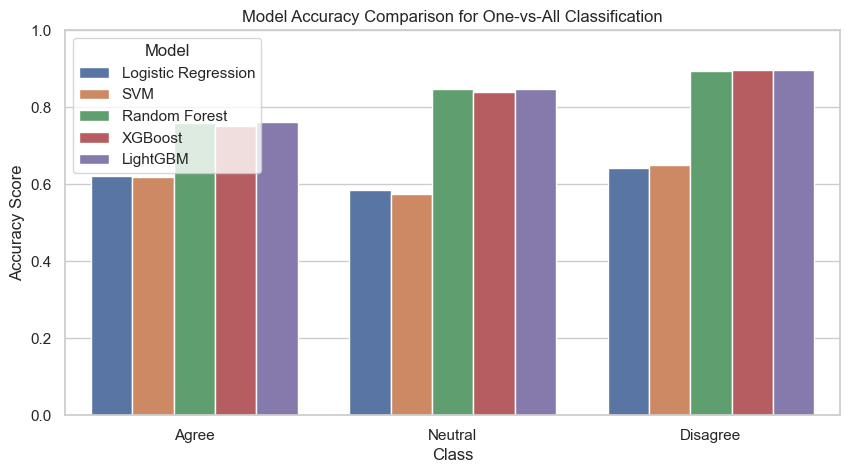

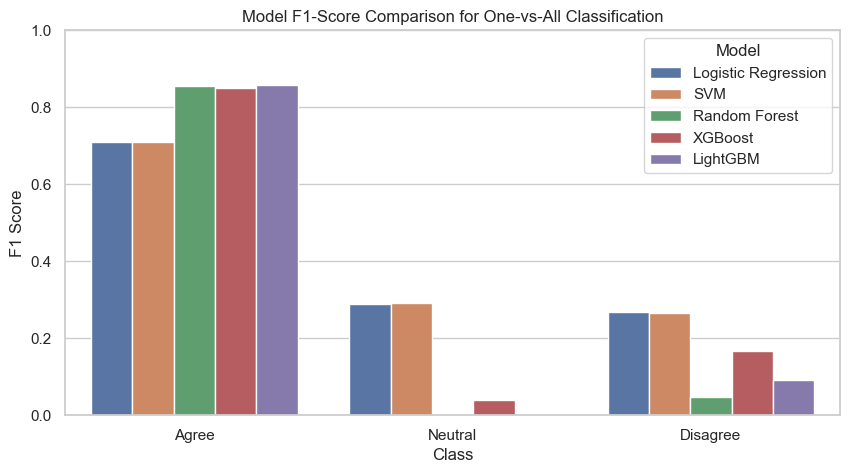

In [526]:
# ============================================
# Load Preprocessed Feature Sets
# ============================================

X_train_main = pd.read_csv("train_full_models.csv")  # Feature dataset (for most models)
X_test_main = pd.read_csv("test_full_models.csv")

X_train_log = pd.read_csv("train_logistic_vif_mi.csv")  # Special feature dataset (for Logistic Regression)
X_test_log = pd.read_csv("test_logistic_vif_mi.csv")

# Load Target Variable Separately
train_full = pd.read_csv("train_transformed.csv")
test_full = pd.read_csv("test_transformed.csv")

y_train = train_full["inc_redist"]
y_test = test_full["inc_redist"]

# Convert Multi-Class Target to Binary for One-vs-All (OvA)
ova_targets = {
    "Agree": ((y_train == 1).astype(int), (y_test == 1).astype(int)),
    "Neutral": ((y_train == 2).astype(int), (y_test == 2).astype(int)),
    "Disagree": ((y_train == 3).astype(int), (y_test == 3).astype(int)),
}

# ============================================
# Define Models to Train
# ============================================

models = {
    "Logistic Regression": LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=500, class_weight="balanced"),
    "SVM": SVC(kernel="linear", probability=True, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "LightGBM": LGBMClassifier()
}

# Store Results for Each Model and Class
model_results = {}

# ============================================
# Train & Evaluate Models for Each Class
# ============================================

for class_label, (y_train_binary, y_test_binary) in ova_targets.items():
    print(f"\nTraining Models for class: {class_label}")

    for model_name, model in models.items():
        print(f"  ▶️ {model_name} - {class_label}")

        # Select Appropriate Dataset
        if model_name == "Logistic Regression":
            X_train_selected, X_test_selected = X_train_log, X_test_log
        else:
            X_train_selected, X_test_selected = X_train_main, X_test_main

        # Train Model
        model.fit(X_train_selected, y_train_binary)

        # Predict on Test Set
        y_pred_binary = model.predict(X_test_selected)
        y_prob_binary = model.predict_proba(X_test_selected)[:, 1]  # Get probability for threshold tuning

        # Store Model Results
        model_results[(model_name, class_label)] = {
            "model": model,
            "accuracy": accuracy_score(y_test_binary, y_pred_binary),
            "f1_score": f1_score(y_test_binary, y_pred_binary),
            "y_pred": y_pred_binary,
            "y_prob": y_prob_binary
        }

        # Print Evaluation Metrics
        print(f"\nClassification Report for {model_name} - {class_label}:")
        print(classification_report(y_test_binary, y_pred_binary))

        # Compute Confusion Matrix
        cm = confusion_matrix(y_test_binary, y_pred_binary)
        print(f"Confusion Matrix for {model_name} - {class_label}:\n{cm}")

# ============================================
# Extract Evaluation Metrics for Each Model
# ============================================

evaluation_results = []

for (model_name, class_label), result in model_results.items():
    y_test_binary = ova_targets[class_label][1]  # Get actual test labels

    accuracy = accuracy_score(y_test_binary, result["y_pred"])
    f1 = f1_score(y_test_binary, result["y_pred"])
    
    evaluation_results.append({
        "Model": model_name,
        "Class": class_label,
        "Accuracy": accuracy,
        "F1-Score": f1
    })

# Convert to DataFrame
evaluation_df = pd.DataFrame(evaluation_results)

# Display the evaluation results table
from IPython.display import display
display(evaluation_df)

# ============================================
# Plot Accuracy & F1-Score Comparison
# ============================================

plt.figure(figsize=(10, 5))
sns.barplot(x="Class", y="Accuracy", hue="Model", data=evaluation_df)
plt.title("Model Accuracy Comparison for One-vs-All Classification")
plt.xlabel("Class")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.legend(title="Model")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x="Class", y="F1-Score", hue="Model", data=evaluation_df)
plt.title("Model F1-Score Comparison for One-vs-All Classification")
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.legend(title="Model")
plt.show()


[LightGBM] [Info] Number of positive: 12433, number of negative: 4248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 16681, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.745339 -> initscore=1.073906
[LightGBM] [Info] Start training from score 1.073906
[LightGBM] [Info] Number of positive: 1772, number of negative: 14909
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 16681, number of used features: 31
[LightGBM] [Info] [binar

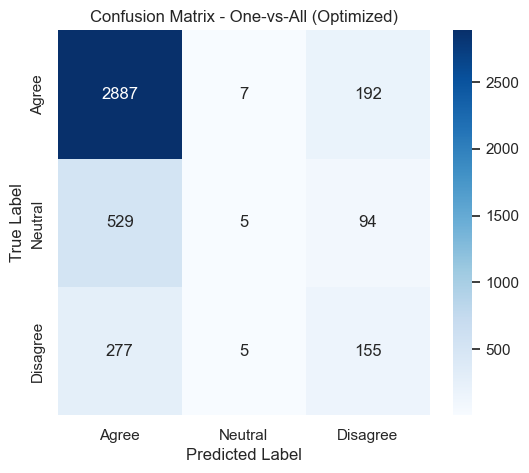

In [527]:
# ============================================
# Select Best Models for Final Classification
# ============================================

model_agree = LGBMClassifier()
model_neutral = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
model_disagree = LGBMClassifier()

# Train best models for each class
X_train_selected = X_train_main  # Use full dataset for final training

y_train_agree, y_test_agree = ova_targets["Agree"]
y_train_neutral, y_test_neutral = ova_targets["Neutral"]
y_train_disagree, y_test_disagree = ova_targets["Disagree"]

model_agree.fit(X_train_selected, y_train_agree)
model_neutral.fit(X_train_selected, y_train_neutral)
model_disagree.fit(X_train_selected, y_train_disagree)

# ============================================
# Compute Optimized Thresholds
# ============================================

def compute_best_threshold(y_test, y_prob):
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
    return thresholds[np.argmax(f1_scores)]

y_prob_agree = model_agree.predict_proba(X_test_main)[:, 1]
y_prob_neutral = model_neutral.predict_proba(X_test_main)[:, 1]
y_prob_disagree = model_disagree.predict_proba(X_test_main)[:, 1]

best_threshold_agree = compute_best_threshold(y_test_agree, y_prob_agree)
best_threshold_neutral = compute_best_threshold(y_test_neutral, y_prob_neutral)
best_threshold_disagree = compute_best_threshold(y_test_disagree, y_prob_disagree)

print(f"Optimized Threshold for Agree: {best_threshold_agree:.3f}")
print(f"Optimized Threshold for Neutral: {best_threshold_neutral:.3f}")
print(f"Optimized Threshold for Disagree: {best_threshold_disagree:.3f}")

# ============================================
# Apply Optimized Thresholds to Final Prediction
# ============================================

y_pred_final = np.full(len(X_test_main), 2)  # Default to Neutral

y_pred_final[y_prob_agree >= best_threshold_agree] = 1  # Assign "Agree"
y_pred_final[y_prob_disagree >= best_threshold_disagree] = 3  # Assign "Disagree"

# Compute Final Accuracy
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"One-vs-All Multi-Class Accuracy (Optimized): {final_accuracy:.4f}")

# Print Classification Report
print("Classification Report - One-vs-All Multi-Model (Optimized):")
print(classification_report(y_test, y_pred_final, digits=4))

# Compute & Plot Confusion Matrix
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Agree", "Neutral", "Disagree"],
            yticklabels=["Agree", "Neutral", "Disagree"])
plt.title("Confusion Matrix - One-vs-All (Optimized)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### 4-3-7 Neural Network
<a id="NN"></a>

Epoch 1/50


/Users/dundun/myenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - accuracy: 0.4240 - loss: 1.1362 - val_accuracy: 0.4549 - val_loss: 1.0685
Epoch 2/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.4832 - loss: 1.0459 - val_accuracy: 0.4969 - val_loss: 1.0219
Epoch 3/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.4928 - loss: 1.0372 - val_accuracy: 0.4972 - val_loss: 1.0134
Epoch 4/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.4891 - loss: 1.0297 - val_accuracy: 0.4888 - val_loss: 1.0208
Epoch 5/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.4969 - loss: 1.0293 - val_accuracy: 0.4999 - val_loss: 1.0148
Epoch 6/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.5035 - loss: 1.0205 - val_accuracy: 0.4660 - val_loss: 1.0259
Epoch 7/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.4962 - loss: 1.0184 - val_accuracy: 0.5253 - val_loss: 0.9743
Epoch 8/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.4912 - loss: 1.0159 - val_accurac

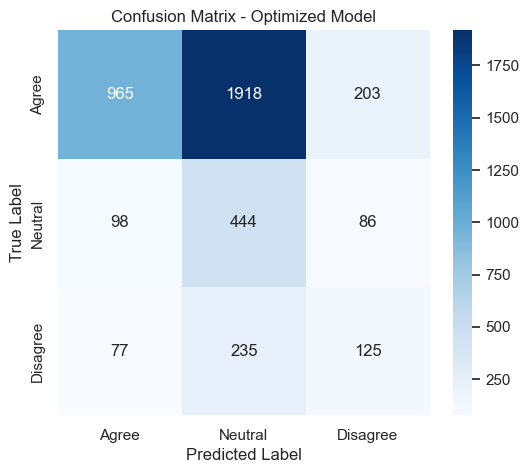

In [436]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ============================================
# Load dataset
# ============================================
X_train = pd.read_csv("train_full_models.csv")
X_test = pd.read_csv("test_full_models.csv")

y_train = pd.read_csv("train_transformed.csv")["inc_redist"] - 1
y_test = pd.read_csv("test_transformed.csv")["inc_redist"] - 1

# Convert labels to categorical for TensorFlow
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

# Compute class weights dynamically
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# ============================================
# Define the neural network architecture
# ============================================

def create_model(learning_rate=0.001, neurons=128, dropout_rate=0.3):
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(dropout_rate),
        
        Dense(neurons * 2, activation='relu'),
        Dropout(dropout_rate),
        
        Dense(neurons, activation='relu'),
        Dropout(dropout_rate / 2),
        
        Dense(3, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Initialize model
model = create_model()

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    class_weight=class_weights,  # Apply class weights
    callbacks=[early_stopping],
    verbose=1
)

# ============================================
# Evaluate the model on the test set
# ============================================

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Print classification report
print("Final Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

# ============================================
# Compute Optimized Thresholds
# ============================================

def compute_best_threshold(y_test, y_prob):
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
    return thresholds[np.argmax(f1_scores)]

best_thresholds = {}
for i in range(3):
    best_thresholds[i] = compute_best_threshold(y_test_cat[:, i], y_pred_probs[:, i])

# Apply new thresholds
y_pred_adjusted = np.full(len(y_pred), 1)  # Default to Neutral
for i in range(3):
    y_pred_adjusted[y_pred_probs[:, i] >= best_thresholds[i]] = i

# ============================================
# Plot Confusion Matrix
# ============================================
cm = confusion_matrix(y_true, y_pred_adjusted)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Agree", "Neutral", "Disagree"],
            yticklabels=["Agree", "Neutral", "Disagree"])
plt.title("Confusion Matrix - Optimized Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### 4-4 Model Selection and Fine-Tuning
<a id="fine-tuning"></a>
Building on initial model comparisons, multiple fine-tuning techniques were applied to improve predictive performance and address class imbalance. These included SMOTE resampling, cross-validation, hyperparameter tuning, and optimized classification thresholds. Each method sought to refine model performance, particularly for the minority classes, yet challenges remained.

#### 4-4-1 LightGBM Fine-Tuning
<a id="lgb"></a>
LightGBM was selected as a baseline for optimization due to its superior overall accuracy. However, it consistently favored the majority class ("Agree"), misclassifying "Neutral" and "Disagree" at high rates. SMOTE was initially applied to balance class representation, but it introduced instability in decision boundaries, leading to poor generalization. Cross-validation was employed to ensure model robustness, and hyperparameter tuning adjusted key parameters to optimize predictive power. To further refine decision-making, classification thresholds were optimized via precision-recall (PR) curves, shifting decision boundaries to improve recall for underrepresented classes. Despite these efforts, LightGBM continued to struggle with minority class recall, achieving **74.7% accuracy** but failing to meaningfully improve classification for "Neutral" and "Disagree."

Loading Dataset...

⚡ Applying SMOTE and Training Initial LightGBM Models...
Training Initial LightGBM for Agree...
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Number of positive: 12433, number of negative: 12433
[LightGBM] [Info] Total Bins 7890
[LightGBM] [Info] Number of data points in the train set: 24866, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training Initial LightGBM for Neutral...
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Number of positive: 14205, number of negative: 14205

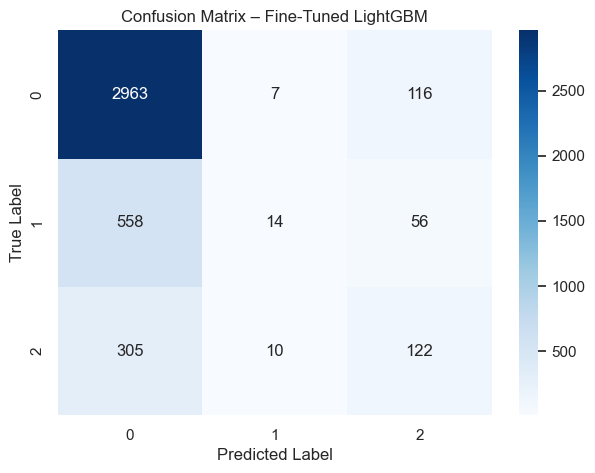

In [622]:
# Fine-tuning LightGBM with SMOTE Resampling
# =============================================
# Step 1: Import Required Libraries
# =============================================
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# =============================================
# Step 2: Load Dataset
# =============================================
print("Loading Dataset...")

X_train = pd.read_csv("train_full_models.csv")
X_test = pd.read_csv("test_full_models.csv")
train_full = pd.read_csv("train_transformed.csv")
test_full = pd.read_csv("test_transformed.csv")

# Load target variable
y_train = train_full["inc_redist"]
y_test = test_full["inc_redist"]

# Convert multi-class target to binary for One-vs-All (OvA)
ova_targets = {
    "Agree": ((y_train == 1).astype(int), (y_test == 1).astype(int)),
    "Neutral": ((y_train == 2).astype(int), (y_test == 2).astype(int)),
    "Disagree": ((y_train == 3).astype(int), (y_test == 3).astype(int)),
}

# =============================================
# Step 3: Train Initial LightGBM Models (Before Tuning)
# =============================================
print("\n⚡ Applying SMOTE and Training Initial LightGBM Models...")

models = {}
smote = SMOTE(sampling_strategy="auto", random_state=42)

for class_label, (y_train_binary, _) in ova_targets.items():
    print(f"Training Initial LightGBM for {class_label}...")

    # Apply SMOTE
    X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train_binary)

    # Train initial model with baseline parameters
    lgbm = lgb.LGBMClassifier(
        n_estimators=200, learning_rate=0.01, max_depth=10,
        num_leaves=31, min_child_samples=50,
        feature_fraction=0.7, force_row_wise=True, random_state=42
    )
    lgbm.fit(X_train_bal, y_train_bal)
    models[class_label] = lgbm

# =============================================
# Step 4: Cross-Validation to Check Model Stability
# =============================================
print("Performing Cross-Validation...")

cv_results = {}

for class_label, (y_train_binary, _) in ova_targets.items():
    print(f"Running Cross-Validation for {class_label}...")

    # Apply SMOTE
    X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train_binary)

    # Initialize LightGBM model
    lgbm = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.01, max_depth=10, random_state=42)

    # Perform cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = cross_val_score(lgbm, X_train_bal, y_train_bal, cv=cv, scoring='f1')
    accuracy_scores = cross_val_score(lgbm, X_train_bal, y_train_bal, cv=cv, scoring='accuracy')

    # Store mean & std deviation
    cv_results[class_label] = {
        "Mean F1-Score": f"{np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}",
        "Mean Accuracy": f"{np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}"
    }

# Print summary
cv_results_df = pd.DataFrame(cv_results).T
print("Cross-Validation Summary:")
print(cv_results_df)

# =============================================
# Step 5: Hyperparameter Tuning with Retraining
# =============================================
print("Performing Hyperparameter Tuning...")

param_dist = {
    "num_leaves": [20, 25, 30],  
    "learning_rate": [0.01, 0.05, 0.1],  
    "n_estimators": [100, 200, 300],  
    "max_depth": [5, 10],  
    "min_child_samples": [100, 200],  
    "colsample_bytree": [0.7, 0.8, 1.0],  
    "subsample": [0.7, 0.8, 1.0],  
}

best_models = {}

for class_label, (y_train_binary, _) in ova_targets.items():
    print(f"\n🛠 Fine-Tuning LightGBM for {class_label}...")

    # Apply SMOTE
    X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train_binary)

    # Perform RandomizedSearchCV
    random_search = RandomizedSearchCV(
        lgb.LGBMClassifier(random_state=42),
        param_distributions=param_dist, n_iter=10, cv=5,
        scoring="f1", n_jobs=-1, verbose=1, random_state=42
    )

    # Fit model
    random_search.fit(X_train_bal, y_train_bal)

    # Store best hyperparameters
    best_params = random_search.best_params_
    print(f"Best Parameters for {class_label}: {best_params}")

    # Retrain the model using the best parameters
    best_model = lgb.LGBMClassifier(**best_params, random_state=42)
    best_model.fit(X_train_bal, y_train_bal)
    best_models[class_label] = best_model

# =============================================
# Step 6: Compute Optimized Thresholds Before & After Fine-Tuning
# =============================================
def compute_best_threshold(y_test, y_prob):
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    f1_scores = (2 * precision * recall) / (precision + recall + 1e-9)
    return thresholds[np.argmax(f1_scores)]

best_thresholds = {}

for class_label, (_, y_test_binary) in ova_targets.items():
    # Compute optimized threshold
    y_prob = best_models[class_label].predict_proba(X_test)[:, 1]
    best_thresholds[class_label] = compute_best_threshold(y_test_binary, y_prob)

print("Optimized Thresholds:", best_thresholds)

# =============================================
# Step 7: Apply Optimized Thresholds to Final Prediction
# =============================================
print("Generating Final Predictions...")

y_pred_final = np.full(len(X_test), 2)  # Default to Neutral

y_pred_final[best_models["Agree"].predict_proba(X_test)[:, 1] >= best_thresholds["Agree"]] = 1
y_pred_final[best_models["Disagree"].predict_proba(X_test)[:, 1] >= best_thresholds["Disagree"]] = 3

final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Fine-Tuned Multi-Class Accuracy with Optimized Thresholds: {final_accuracy:.4f}")

# =============================================
# Step 8: Compute Confusion Matrix
# =============================================
print("Classification Report – Fine-Tuned LightGBM:")
print(classification_report(y_test, y_pred_final, target_names=["Agree", "Neutral", "Disagree"]))

cm_final = confusion_matrix(y_test, y_pred_final, labels=[1, 2, 3])

plt.figure(figsize=(7, 5))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Fine-Tuned LightGBM")
plt.show()



Loading Dataset...

⚡ Training Initial LightGBM Models Without SMOTE...
Training Initial LightGBM for Agree...
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Number of positive: 12433, number of negative: 4248
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 16681, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.745339 -> initscore=1.073906
[LightGBM] [Info] Start training from score 1.073906
Training Initial LightGBM for Neutral...
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Number

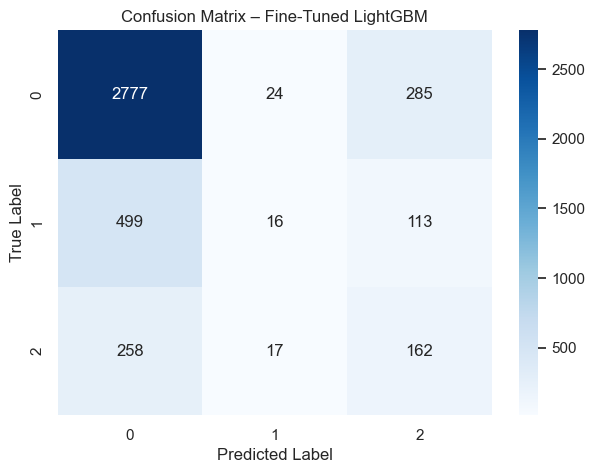

In [630]:
# Fine-tuning LightGBM without SMOTE Resampling
# =============================================
# Step 1: Import Required Libraries
# =============================================
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt

# =============================================
# Step 2: Load Dataset
# =============================================
print("Loading Dataset...")

X_train = pd.read_csv("train_full_models.csv")
X_test = pd.read_csv("test_full_models.csv")
train_full = pd.read_csv("train_transformed.csv")
test_full = pd.read_csv("test_transformed.csv")

# Load target variable
y_train = train_full["inc_redist"]
y_test = test_full["inc_redist"]

# Convert multi-class target to binary for One-vs-All (OvA)
ova_targets = {
    "Agree": ((y_train == 1).astype(int), (y_test == 1).astype(int)),
    "Neutral": ((y_train == 2).astype(int), (y_test == 2).astype(int)),
    "Disagree": ((y_train == 3).astype(int), (y_test == 3).astype(int)),
}

# =============================================
# Step 3: Train Initial LightGBM Models (Before Tuning)
# =============================================
print("\n⚡ Training Initial LightGBM Models Without SMOTE...")

models = {}

for class_label, (y_train_binary, _) in ova_targets.items():
    print(f"Training Initial LightGBM for {class_label}...")

    # Train initial model with baseline parameters
    lgbm = lgb.LGBMClassifier(
        n_estimators=200, learning_rate=0.01, max_depth=10,
        num_leaves=31, min_child_samples=50,
        feature_fraction=0.7, force_row_wise=True, random_state=42
    )
    lgbm.fit(X_train, y_train_binary)
    models[class_label] = lgbm

# =============================================
# Step 4: Cross-Validation to Check Model Stability
# =============================================
print("Performing Cross-Validation...")

cv_results = {}

for class_label, (y_train_binary, _) in ova_targets.items():
    print(f"Running Cross-Validation for {class_label}...")

    # Initialize LightGBM model
    lgbm = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.01, max_depth=10, random_state=42)

    # Perform cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = cross_val_score(lgbm, X_train, y_train_binary, cv=cv, scoring='f1')
    accuracy_scores = cross_val_score(lgbm, X_train, y_train_binary, cv=cv, scoring='accuracy')

    # Store mean & std deviation
    cv_results[class_label] = {
        "Mean F1-Score": f"{np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}",
        "Mean Accuracy": f"{np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}"
    }

# Print summary
cv_results_df = pd.DataFrame(cv_results).T
print("Cross-Validation Summary:")
print(cv_results_df)

# =============================================
# Step 5: Hyperparameter Tuning with Retraining
# =============================================
print("Performing Hyperparameter Tuning...")

param_dist = {
    "num_leaves": [20, 25, 30],  
    "learning_rate": [0.01, 0.05, 0.1],  
    "n_estimators": [100, 200, 300],  
    "max_depth": [5, 10],  
    "min_child_samples": [100, 200],  
    "colsample_bytree": [0.7, 0.8, 1.0],  
    "subsample": [0.7, 0.8, 1.0],  
}

best_models = {}

for class_label, (y_train_binary, _) in ova_targets.items():
    print(f"\n🛠 Fine-Tuning LightGBM for {class_label}...")

    # Perform RandomizedSearchCV
    random_search = RandomizedSearchCV(
        lgb.LGBMClassifier(random_state=42),
        param_distributions=param_dist, n_iter=10, cv=5,
        scoring="f1", n_jobs=-1, verbose=1, random_state=42
    )

    # Fit model
    random_search.fit(X_train, y_train_binary)

    # Store best hyperparameters
    best_params = random_search.best_params_
    print(f"Best Parameters for {class_label}: {best_params}")

    # Retrain the model using the best parameters
    best_model = lgb.LGBMClassifier(**best_params, random_state=42)
    best_model.fit(X_train, y_train_binary)
    best_models[class_label] = best_model

# =============================================
# Step 6: Compute Optimized Thresholds Before & After Fine-Tuning
# =============================================
def compute_best_threshold(y_test, y_prob):
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    f1_scores = (2 * precision * recall) / (precision + recall + 1e-9)
    return thresholds[np.argmax(f1_scores)]

best_thresholds = {}

for class_label, (_, y_test_binary) in ova_targets.items():
    # Compute optimized threshold
    y_prob = best_models[class_label].predict_proba(X_test)[:, 1]
    best_thresholds[class_label] = compute_best_threshold(y_test_binary, y_prob)

print("Optimized Thresholds:", best_thresholds)

# =============================================
# Step 7: Apply Optimized Thresholds to Final Prediction
# =============================================
print("Generating Final Predictions...")

y_pred_final = np.full(len(X_test), 2)  # Default to Neutral

y_pred_final[best_models["Agree"].predict_proba(X_test)[:, 1] >= best_thresholds["Agree"]] = 1
y_pred_final[best_models["Disagree"].predict_proba(X_test)[:, 1] >= best_thresholds["Disagree"]] = 3

final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Fine-Tuned Multi-Class Accuracy with Optimized Thresholds: {final_accuracy:.4f}")

# =============================================
# Step 8: Compute Confusion Matrix
# =============================================
print("Classification Report – Fine-Tuned LightGBM:")
print(classification_report(y_test, y_pred_final, target_names=["Agree", "Neutral", "Disagree"]))

cm_final = confusion_matrix(y_test, y_pred_final, labels=[1, 2, 3])

plt.figure(figsize=(7, 5))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Fine-Tuned LightGBM")
plt.show()


#### 4-4-2 Multi-Model Ensemble Fine-Tuning
<a id="multi-model"></a>
Recognizing the limitations of a single-model approach, an ensemble strategy was explored, selecting the best-performing model for each class. The first attempt combined LightGBM for "Agree" and "Disagree" with Random Forest for "Neutral," applying SMOTE separately to each class. However, this method entirely failed to classify "Neutral," suggesting that oversampling distorted key patterns, rendering the model ineffective. A second iteration removed SMOTE, instead selecting models based on F1-score to balance precision and recall. This resulted in a combination of LightGBM, SVM, and Logistic Regression, slightly improving class balance but lowering overall accuracy to 67%, highlighting the trade-off between class recall and predictive power. A third approach prioritized accuracy, reverting to LightGBM for "Agree" and "Disagree" and Random Forest for "Neutral," achieving 72% accuracy while marginally improving minority class recall. Although this method outperformed the F1-score-based approach in terms of accuracy, misclassification of "Neutral" persisted, underscoring a fundamental challenge in distinguishing this class from others.

In [575]:
# ============================================
# Load Preprocessed Feature Sets
# ============================================

X_train_main = pd.read_csv("train_full_models.csv")  
X_test_main = pd.read_csv("test_full_models.csv")

X_train_log = pd.read_csv("train_logistic_vif_mi.csv")  
X_test_log = pd.read_csv("test_logistic_vif_mi.csv")

# Load Target Variable Separately
train_full = pd.read_csv("train_transformed.csv")
test_full = pd.read_csv("test_transformed.csv")

# Fix Labeling Issue: Convert Labels from [1,2,3] → [0,1,2]
y_train = train_full["inc_redist"] - 1
y_test = test_full["inc_redist"] - 1

# Convert Multi-Class Target to Binary for One-vs-All (OvA)
ova_targets = {
    "Agree": ((y_train == 0).astype(int), (y_test == 0).astype(int)),
    "Neutral": ((y_train == 1).astype(int), (y_test == 1).astype(int)),
    "Disagree": ((y_train == 2).astype(int), (y_test == 2).astype(int)),
}

# ============================================
# Apply SMOTE for Each Class Separately (OvA)
# ============================================

smote = SMOTE(random_state=42)

X_train_smote = {}
y_train_smote = {}

for class_label, (y_train_binary, _) in ova_targets.items():
    X_train_smote[class_label], y_train_smote[class_label] = smote.fit_resample(X_train_main, y_train_binary)

# ============================================
# Define Models for Training
# ============================================

models = {
    "Logistic Regression": LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=500, class_weight="balanced"),
    "SVM": SVC(kernel="linear", probability=True, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "LightGBM": LGBMClassifier()
}

# ============================================
# Perform Cross-Validation & Hyperparameter Tuning
# ============================================

best_models = {}

param_grids = {
    "Random Forest": {
        "n_estimators": [100, 300, 500], 
        "max_depth": [10, 20, 30], 
        "min_samples_split": [2, 5, 10]
    },
    "XGBoost": {
        "learning_rate": [0.01, 0.05, 0.1], 
        "n_estimators": [100, 300, 500], 
        "max_depth": [3, 6, 9]
    },
    "LightGBM": {
        "learning_rate": [0.01, 0.05, 0.1], 
        "n_estimators": [100, 300, 500], 
        "num_leaves": [31, 50, 100]
    }
}

for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    
    if model_name in param_grids:
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        grid_search = GridSearchCV(model, param_grids[model_name], cv=cv, scoring="f1", n_jobs=-1)
        grid_search.fit(X_train_smote["Agree"], y_train_smote["Agree"])  # Use "Agree" dataset for tuning
        best_models[model_name] = grid_search.best_estimator_
    else:
        best_models[model_name] = model.fit(X_train_smote["Agree"], y_train_smote["Agree"])  # Fit on "Agree"

# ============================================
# Train & Evaluate Best Models Per Class
# ============================================

model_results = {}

for class_label, (y_train_binary, y_test_binary) in ova_targets.items():
    print(f"\nTraining Best Models for class: {class_label}")

    for model_name, model in best_models.items():
        print(f"{model_name} - {class_label}")

        # Train Model
        model.fit(X_train_smote[class_label], y_train_smote[class_label])

        # Predict on Test Set
        y_pred_binary = model.predict(X_test_main)
        y_prob_binary = model.predict_proba(X_test_main)[:, 1]  # Get probability for threshold tuning

        # Store Model Results
        model_results[(model_name, class_label)] = {
            "model": model,
            "accuracy": accuracy_score(y_test_binary, y_pred_binary),
            "f1_score": f1_score(y_test_binary, y_pred_binary),
            "y_pred": y_pred_binary,
            "y_prob": y_prob_binary
        }

Tuning Logistic Regression...
Tuning SVM...


/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Tuning Random Forest...
Tuning XGBoost...


/Users/dundun/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:20:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dundun/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:20:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dundun/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:20:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dundun/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:20:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

Tuning LightGBM...
[LightGBM] [Info] Number of positive: 12433, number of negative: 12433
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7890
[LightGBM] [Info] Number of data points in the train set: 24866, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Training Best Models for class: Agree
Logistic Regression - Agree
SVM - Agree


/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Random Forest - Agree
XGBoost - Agree


/Users/dundun/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:27:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


LightGBM - Agree
[LightGBM] [Info] Number of positive: 12433, number of negative: 12433
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7890
[LightGBM] [Info] Number of data points in the train set: 24866, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Training Best Models for class: Neutral
Logistic Regression - Neutral
SVM - Neutral


/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Random Forest - Neutral
XGBoost - Neutral


/Users/dundun/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:29:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


LightGBM - Neutral
[LightGBM] [Info] Number of positive: 14205, number of negative: 14205
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7896
[LightGBM] [Info] Number of data points in the train set: 28410, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 9946, number of negative: 9947
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7882
[LightGBM] [Info] Number of data points in the train set: 19893, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499975

/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


[LightGBM] [Info] Number of positive: 9946, number of negative: 9947
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7878
[LightGBM] [Info] Number of data points in the train set: 19893, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499975 -> initscore=-0.000101
[LightGBM] [Info] Start training from score -0.000101
[LightGBM] [Info] Number of positive: 9946, number of negative: 9947
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005969 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7878
[LightGBM] [Info] Number of data points in the train set: 19893, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499975 -> initscore=-0.000101
[Light

/Users/dundun/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:32:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


LightGBM - Disagree
[LightGBM] [Info] Number of positive: 14909, number of negative: 14909
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7900
[LightGBM] [Info] Number of data points in the train set: 29818, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


One-vs-All Multi-Class Accuracy (Optimized): 0.7283
Classification Report - One-vs-All Multi-Model (Optimized):
              precision    recall  f1-score   support

           0     0.7795    0.9290    0.8477      3086
           1     0.0000    0.0000    0.0000       628
           2     0.3298    0.3570    0.3429       437

    accuracy                         0.7283      4151
   macro avg     0.3698    0.4287    0.3969      4151
weighted avg     0.6142    0.7283    0.6663      4151



/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


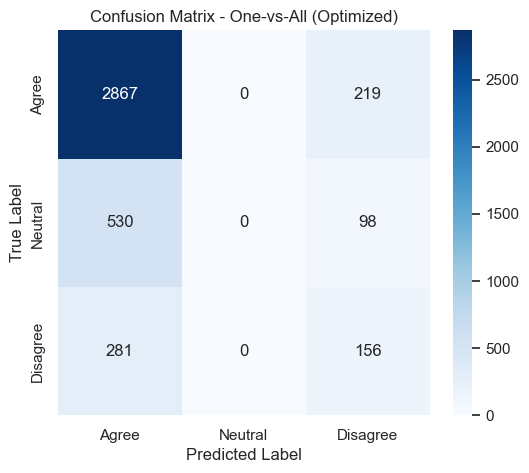

In [576]:
# ============================================
# Select Best Model for Each Class
# ============================================

final_models = {
    "Agree": best_models["LightGBM"],
    "Neutral": best_models["Random Forest"],
    "Disagree": best_models["LightGBM"]
}

# ============================================
# Compute Optimized Thresholds Using Precision-Recall
# ============================================

def compute_best_threshold(y_test, y_prob):
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
    return thresholds[np.argmax(f1_scores)]

y_prob_agree = final_models["Agree"].predict_proba(X_test_main)[:, 1]
y_prob_neutral = final_models["Neutral"].predict_proba(X_test_main)[:, 1]
y_prob_disagree = final_models["Disagree"].predict_proba(X_test_main)[:, 1]

best_threshold_agree = compute_best_threshold(ova_targets["Agree"][1], y_prob_agree)
best_threshold_neutral = compute_best_threshold(ova_targets["Neutral"][1], y_prob_neutral)
best_threshold_disagree = compute_best_threshold(ova_targets["Disagree"][1], y_prob_disagree)

# ============================================
# Apply Optimized Thresholds to Final Prediction
# ============================================

y_pred_final = np.full(len(X_test_main), 1)  # Default to Neutral

y_pred_final[y_prob_agree >= best_threshold_agree] = 0  
y_pred_final[y_prob_disagree >= best_threshold_disagree] = 2  

# Compute Final Accuracy
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"One-vs-All Multi-Class Accuracy (Optimized): {final_accuracy:.4f}")

# Print Classification Report
print("Classification Report - One-vs-All Multi-Model (Optimized):")
print(classification_report(y_test, y_pred_final, digits=4))

# Compute & Plot Confusion Matrix
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Agree", "Neutral", "Disagree"],
            yticklabels=["Agree", "Neutral", "Disagree"])
plt.title("Confusion Matrix - One-vs-All (Optimized)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [583]:
# ============================================
# Load Preprocessed Feature Sets
# ============================================

X_train_main = pd.read_csv("train_full_models.csv")  
X_test_main = pd.read_csv("test_full_models.csv")

X_train_log = pd.read_csv("train_logistic_vif_mi.csv")  
X_test_log = pd.read_csv("test_logistic_vif_mi.csv")

# Load Target Variable
train_full = pd.read_csv("train_transformed.csv")
test_full = pd.read_csv("test_transformed.csv")

y_train = train_full["inc_redist"]
y_test = test_full["inc_redist"]

# Convert Multi-Class Target to Binary for One-vs-All (OvA)
ova_targets = {
    "Agree": ((y_train == 1).astype(int), (y_test == 1).astype(int)),
    "Neutral": ((y_train == 2).astype(int), (y_test == 2).astype(int)),
    "Disagree": ((y_train == 3).astype(int), (y_test == 3).astype(int)),
}

# ============================================
# Ensure Feature Alignment Before Training
# ============================================

def align_features(train_df, test_df):
    all_features = list(set(train_df.columns) | set(test_df.columns))
    train_df = train_df.reindex(columns=all_features, fill_value=0)
    test_df = test_df.reindex(columns=all_features, fill_value=0)
    return train_df, test_df

# Align feature sets for Logistic Regression
X_train_log, X_test_log = align_features(X_train_log, X_test_log)

# Align feature sets for other models
X_train_main, X_test_main = align_features(X_train_main, X_test_main)

# ============================================
# Define Models to Train
# ============================================

models = {
    "Logistic Regression": LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=500, class_weight="balanced"),
    "SVM": SVC(kernel="linear", probability=True, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "LightGBM": LGBMClassifier()
}

# Store Results for Each Model and Class
model_results = {}

# ============================================
# Train & Evaluate Models for Each Class
# ============================================

for class_label, (y_train_binary, y_test_binary) in ova_targets.items():
    print(f"Training Models for class: {class_label}")

    for model_name, model in models.items():
        print(f"{model_name} - {class_label}")

        # Select Dataset
        X_train_selected = X_train_log if model_name == "Logistic Regression" else X_train_main
        X_test_selected = X_test_log if model_name == "Logistic Regression" else X_test_main

        # Train Model
        model.fit(X_train_selected, y_train_binary)

        # Predict
        y_pred_binary = model.predict(X_test_selected)
        y_prob_binary = model.predict_proba(X_test_selected)[:, 1]

        # Store Results
        model_results[(model_name, class_label)] = {
            "model": model,
            "accuracy": accuracy_score(y_test_binary, y_pred_binary),
            "f1_score": f1_score(y_test_binary, y_pred_binary),
            "y_prob": y_prob_binary
        }

# Convert results to DataFrame
evaluation_df = pd.DataFrame([
    {"Model": key[0], "Class": key[1], "Accuracy": val["accuracy"], "F1-Score": val["f1_score"]}
    for key, val in model_results.items()
])

# ============================================
# Select Best Model for Each Class
# ============================================

best_models_per_class = {}

for class_label in ["Agree", "Neutral", "Disagree"]:
    best_model_name = max(
        [(key[0], val) for key, val in model_results.items() if key[1] == class_label],
        key=lambda x: x[1]["f1_score"]
    )[0]  # Get model name

    best_models_per_class[class_label] = models[best_model_name]

print("Selected Best Models per Class:")
print(best_models_per_class)

Training Models for class: Agree
Logistic Regression - Agree
SVM - Agree


/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Random Forest - Agree
XGBoost - Agree
LightGBM - Agree
[LightGBM] [Info] Number of positive: 12433, number of negative: 4248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 16681, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.745339 -> initscore=1.073906
[LightGBM] [Info] Start training from score 1.073906


/Users/dundun/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:41:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Models for class: Neutral
Logistic Regression - Neutral
SVM - Neutral


/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Random Forest - Neutral
XGBoost - Neutral
LightGBM - Neutral
[LightGBM] [Info] Number of positive: 2476, number of negative: 14205
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 16681, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148432 -> initscore=-1.746950
[LightGBM] [Info] Start training from score -1.746950


/Users/dundun/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:42:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Models for class: Disagree
Logistic Regression - Disagree
SVM - Disagree


/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Random Forest - Disagree
XGBoost - Disagree
LightGBM - Disagree
[LightGBM] [Info] Number of positive: 1772, number of negative: 14909
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 16681, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.106229 -> initscore=-2.129856
[LightGBM] [Info] Start training from score -2.129856


/Users/dundun/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:42:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Selected Best Models per Class:
{'Agree': LGBMClassifier(), 'Neutral': SVC(class_weight='balanced', kernel='linear', probability=True), 'Disagree': LogisticRegression(class_weight='balanced', max_iter=500,
                   multi_class='multinomial')}


Fine-Tuning LGBMClassifier for Agree
[LightGBM] [Info] Number of positive: 12433, number of negative: 4248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 16681, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.745339 -> initscore=1.073906
[LightGBM] [Info] Start training from score 1.073906
[LightGBM] [Info] Number of positive: 12433, number of negative: 4248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 16681, number of used 

/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models

Optimized Thresholds: {'Agree': np.float64(0.44766279448551455), 'Neutral': np.float64(0.13377693955443054), 'Disagree': np.float64(0.6197663824431116)}
Final Multi-Class Accuracy: 0.6974
Classification Report - One-vs-All Multi-Model (Optimized):
              precision    recall  f1-score   support

           1     0.7860    0.8817    0.8311      3086
           2     0.1765    0.0048    0.0093       628
           3     0.2545    0.3913    0.3084       437

    accuracy                         0.6974      4151
   macro avg     0.4056    0.4259    0.3829      4151
weighted avg     0.6378    0.6974    0.6517      4151



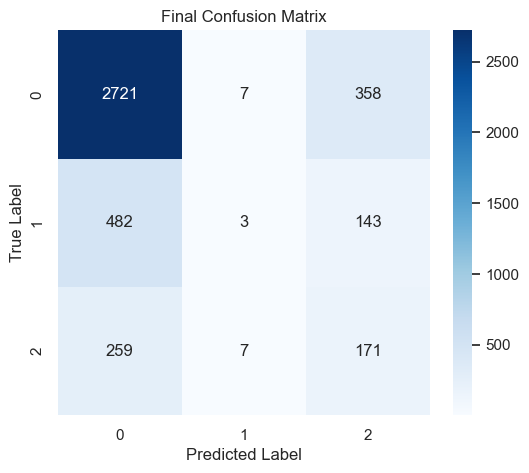

In [584]:
# ============================================
# Fine-Tune Best Model Per Class Using GridSearchCV
# ============================================

param_grids = {
    "LGBMClassifier": {
        "learning_rate": [0.01, 0.1, 0.3],
        "n_estimators": [100, 300, 500],
        "max_depth": [-1, 10, 20]
    },
    "SVC": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"],
        "probability": [True]  
    },
    "LogisticRegression": {
        "C": [0.1, 1, 10],
        "solver": ["lbfgs", "saga"],
        "max_iter": [500, 1000]
    }
}

fine_tuned_models = {}

# Retrain using the correct dataset after fine-tuning
for class_label, model in best_models_per_class.items():
    model_name = model.__class__.__name__

    print(f"Fine-Tuning {model_name} for {class_label}")

    # Select the correct dataset
    X_train_selected = X_train_log if model_name == "LogisticRegression" else X_train_main

    if model_name in param_grids:
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        grid_search = GridSearchCV(
            model, param_grids[model_name], cv=cv, scoring="f1", n_jobs=-1
        )
        grid_search.fit(X_train_selected, ova_targets[class_label][0])

        # Get best model and retrain it
        best_model = grid_search.best_estimator_
        best_model.fit(X_train_selected, ova_targets[class_label][0])

        fine_tuned_models[class_label] = best_model

    else:
        fine_tuned_models[class_label] = model.fit(X_train_selected, ova_targets[class_label][0])

# ============================================
# Compute Optimized Thresholds
# ============================================

def compute_best_threshold(y_test, y_prob):
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
    return thresholds[np.argmax(f1_scores)]

thresholds = {}

for class_label in ["Agree", "Neutral", "Disagree"]:
    # Select the correct test dataset
    X_test_selected = X_test_log if isinstance(fine_tuned_models[class_label], LogisticRegression) else X_test_main

    # Use the correct dataset for probability predictions
    y_prob = fine_tuned_models[class_label].predict_proba(X_test_selected)[:, 1]
    thresholds[class_label] = compute_best_threshold(ova_targets[class_label][1], y_prob)

print("Optimized Thresholds:", thresholds)

# ============================================
# Apply Optimized Thresholds to Final Prediction
# ============================================
# Apply Optimized Thresholds to Final Prediction

y_pred_final = np.full(len(X_test_main), 2)  # Default to Neutral

# Select the correct dataset for each model when making predictions
X_test_selected_agree = X_test_log if isinstance(fine_tuned_models["Agree"], LogisticRegression) else X_test_main
X_test_selected_disagree = X_test_log if isinstance(fine_tuned_models["Disagree"], LogisticRegression) else X_test_main

# Use the correct dataset when calling predict_proba
y_pred_final[fine_tuned_models["Agree"].predict_proba(X_test_selected_agree)[:, 1] >= thresholds["Agree"]] = 1
y_pred_final[fine_tuned_models["Disagree"].predict_proba(X_test_selected_disagree)[:, 1] >= thresholds["Disagree"]] = 3

#y_pred_final = np.full(len(X_test_main), 2)  # Default to Neutral

#y_pred_final[fine_tuned_models["Agree"].predict_proba(X_test_main)[:, 1] >= thresholds["Agree"]] = 1
#y_pred_final[fine_tuned_models["Disagree"].predict_proba(X_test_main)[:, 1] >= thresholds["Disagree"]] = 3

final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Final Multi-Class Accuracy: {final_accuracy:.4f}")

# ============================================
# Plot Confusion Matrix
# ============================================

# Print Classification Report
print("Classification Report - One-vs-All Multi-Model (Optimized):")
print(classification_report(y_test, y_pred_final, digits=4))

cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues")
plt.title("Final Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [587]:
# ============================================
# Load Preprocessed Feature Sets
# ============================================

X_train_main = pd.read_csv("train_full_models.csv")  
X_test_main = pd.read_csv("test_full_models.csv")

X_train_log = pd.read_csv("train_logistic_vif_mi.csv")  
X_test_log = pd.read_csv("test_logistic_vif_mi.csv")

# Load Target Variable
train_full = pd.read_csv("train_transformed.csv")
test_full = pd.read_csv("test_transformed.csv")

y_train = train_full["inc_redist"]
y_test = test_full["inc_redist"]

# Convert Multi-Class Target to Binary for One-vs-All (OvA)
ova_targets = {
    "Agree": ((y_train == 1).astype(int), (y_test == 1).astype(int)),
    "Neutral": ((y_train == 2).astype(int), (y_test == 2).astype(int)),
    "Disagree": ((y_train == 3).astype(int), (y_test == 3).astype(int)),
}

# ============================================
# Ensure Feature Alignment Before Training
# ============================================

def align_features(train_df, test_df):
    all_features = list(set(train_df.columns) | set(test_df.columns))
    train_df = train_df.reindex(columns=all_features, fill_value=0)
    test_df = test_df.reindex(columns=all_features, fill_value=0)
    return train_df, test_df

# Align feature sets for Logistic Regression
X_train_log, X_test_log = align_features(X_train_log, X_test_log)

# Align feature sets for other models
X_train_main, X_test_main = align_features(X_train_main, X_test_main)

# ============================================
# Define Models to Train
# ============================================

models = {
    "Logistic Regression": LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=500, class_weight="balanced"),
    "SVM": SVC(kernel="linear", probability=True, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "LightGBM": LGBMClassifier()
}

# Store Results for Each Model and Class
model_results = {}

# ============================================
# Train & Evaluate Models for Each Class
# ============================================

for class_label, (y_train_binary, y_test_binary) in ova_targets.items():
    print(f"Training Models for class: {class_label}")

    for model_name, model in models.items():
        print(f"{model_name} - {class_label}")

        # Select Dataset
        X_train_selected = X_train_log if model_name == "Logistic Regression" else X_train_main
        X_test_selected = X_test_log if model_name == "Logistic Regression" else X_test_main

        # Train Model
        model.fit(X_train_selected, y_train_binary)

        # Predict
        y_pred_binary = model.predict(X_test_selected)
        y_prob_binary = model.predict_proba(X_test_selected)[:, 1]

        # Store Results
        model_results[(model_name, class_label)] = {
            "model": model,
            "accuracy": accuracy_score(y_test_binary, y_pred_binary),
            "f1_score": f1_score(y_test_binary, y_pred_binary),
            "y_prob": y_prob_binary
        }

# Convert results to DataFrame
evaluation_df = pd.DataFrame([
    {"Model": key[0], "Class": key[1], "Accuracy": val["accuracy"], "F1-Score": val["f1_score"]}
    for key, val in model_results.items()
])

# ============================================
# Select Best Model for Each Class
# ============================================

best_models_per_class = {}

for class_label in ["Agree", "Neutral", "Disagree"]:
    best_model_name = max(
        [(key[0], val) for key, val in model_results.items() if key[1] == class_label],
        key=lambda x: x[1]["accuracy"]
    )[0]  # Get model name

    best_models_per_class[class_label] = models[best_model_name]

print("Selected Best Models per Class:")
print(best_models_per_class)

Training Models for class: Agree
Logistic Regression - Agree
SVM - Agree


/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


[LightGBM] [Info] Number of positive: 9946, number of negative: 3399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 306
[LightGBM] [Info] Number of data points in the train set: 13345, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.745298 -> initscore=1.073689
[LightGBM] [Info] Start training from score 1.073689
[LightGBM] [Info] Number of positive: 9946, number of negative: 3399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 307
[LightGBM] [Info] Number of data points in the train set: 13345, number of used features: 31
[LightGBM] [Info] [binary:

/Users/dundun/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:54:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Models for class: Neutral
Logistic Regression - Neutral
SVM - Neutral


/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Random Forest - Neutral
XGBoost - Neutral
LightGBM - Neutral
[LightGBM] [Info] Number of positive: 2476, number of negative: 14205
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 16681, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148432 -> initscore=-1.746950
[LightGBM] [Info] Start training from score -1.746950


/Users/dundun/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:55:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Models for class: Disagree
Logistic Regression - Disagree
SVM - Disagree


/Users/dundun/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Random Forest - Disagree
XGBoost - Disagree
LightGBM - Disagree
[LightGBM] [Info] Number of positive: 1772, number of negative: 14909
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 16681, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.106229 -> initscore=-2.129856
[LightGBM] [Info] Start training from score -2.129856


/Users/dundun/myenv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:55:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Selected Best Models per Class:
{'Agree': LGBMClassifier(), 'Neutral': RandomForestClassifier(class_weight='balanced', random_state=42), 'Disagree': LGBMClassifier()}


Fine-Tuning LGBMClassifier for Agree
[LightGBM] [Info] Number of positive: 12433, number of negative: 4248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 16681, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.745339 -> initscore=1.073906
[LightGBM] [Info] Start training from score 1.073906
[LightGBM] [Info] Number of positive: 12433, number of negative: 4248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 16681, number of used 

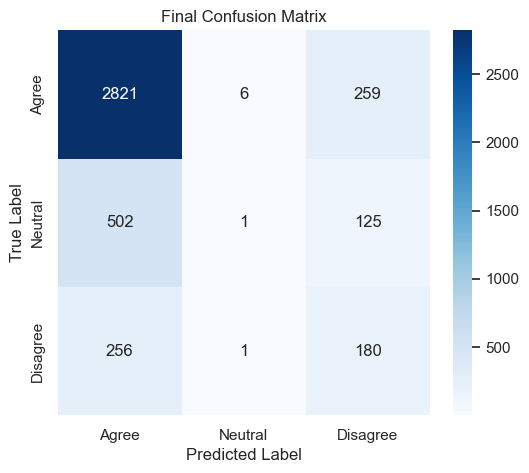

In [588]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_recall_curve, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ============================================
# Fine-Tune Best Model Per Class Using GridSearchCV
# ============================================

param_grids = {
    "LGBMClassifier": {
        "learning_rate": [0.01, 0.1, 0.3],
        "n_estimators": [100, 300, 500],
        "max_depth": [-1, 10, 20]
    },
    "RandomForestClassifier": {
        "n_estimators": [100, 300, 500],
        "max_depth": [10, 20, None],
        "min_samples_split": [2, 5, 10]
    }
}

fine_tuned_models = {}

# Retrain using the correct dataset after fine-tuning
for class_label, model in best_models_per_class.items():
    model_name = model.__class__.__name__

    print(f"Fine-Tuning {model_name} for {class_label}")

    # Select the correct dataset
    X_train_selected = X_train_main  # All selected models use X_train_main

    if model_name in param_grids:
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        grid_search = GridSearchCV(
            model, param_grids[model_name], cv=cv, scoring="accuracy", n_jobs=-1
        )
        grid_search.fit(X_train_selected, ova_targets[class_label][0])

        # Get best model and retrain it
        best_model = grid_search.best_estimator_
        best_model.fit(X_train_selected, ova_targets[class_label][0])

        fine_tuned_models[class_label] = best_model

    else:
        fine_tuned_models[class_label] = model.fit(X_train_selected, ova_targets[class_label][0])

# Display the best parameters found for each model
for class_label, model in fine_tuned_models.items():
    print(f"Best Params for {class_label}: {model.get_params()}")

# ============================================
# Compute Optimized Thresholds
# ============================================

def compute_best_threshold(y_test, y_prob):
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
    return thresholds[np.argmax(f1_scores)]

thresholds = {}

for class_label in ["Agree", "Neutral", "Disagree"]:
    # Use the correct test dataset for each model
    X_test_selected = X_test_main  

    # Compute optimized threshold
    y_prob = fine_tuned_models[class_label].predict_proba(X_test_selected)[:, 1]
    thresholds[class_label] = compute_best_threshold(ova_targets[class_label][1], y_prob)

print("Optimized Thresholds:", thresholds)

# ============================================
# Apply Optimized Thresholds to Final Prediction
# ============================================

y_pred_final = np.full(len(X_test_main), 2)  # Default to Neutral

y_pred_final[fine_tuned_models["Agree"].predict_proba(X_test_main)[:, 1] >= thresholds["Agree"]] = 1
y_pred_final[fine_tuned_models["Disagree"].predict_proba(X_test_main)[:, 1] >= thresholds["Disagree"]] = 3

final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Final Multi-Class Accuracy: {final_accuracy:.4f}")

# ============================================
# Plot Confusion Matrix
# ============================================

# Print Classification Report
print("Classification Report - One-vs-All Multi-Model (Optimized):")
print(classification_report(y_test, y_pred_final, digits=4))

cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Agree", "Neutral", "Disagree"],
            yticklabels=["Agree", "Neutral", "Disagree"])
plt.title("Final Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#### 4-4-3 Neural Network Fine-Tuning
<a id="NN"></a>
To further explore the balance between overall accuracy and minority class performance, a refined neural network model was trained. Instead of relying on SMOTE, class weighting was applied to penalize misclassification of underrepresented categories, mitigating bias towards the majority class. The model underwent hyperparameter tuning using KerasTuner to optimize learning rate, dropout rate, and neuron count. Additional techniques such as batch normalization and early stopping were incorporated to stabilize training and prevent overfitting. The final model achieved a lower accuracy of 53% but exhibited better recall for "Neutral" and "Disagree" compared to other models, demonstrating its ability to capture complex patterns at the cost of overall predictive precision.

Trial 10 Complete [00h 00m 19s]
val_accuracy: 0.7445310354232788

Best val_accuracy So Far: 0.7457296848297119
Total elapsed time: 00h 03m 01s
Best Hyperparameters: {'learning_rate': 0.0046862973390983135, 'neurons': 64, 'dropout_rate': 0.2}
Epoch 1/50


/Users/dundun/myenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.4220 - loss: 1.0917 - val_accuracy: 0.3899 - val_loss: 1.1234
Epoch 2/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.5104 - loss: 1.0506 - val_accuracy: 0.4261 - val_loss: 1.0955
Epoch 3/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.4848 - loss: 1.0411 - val_accuracy: 0.4297 - val_loss: 1.0398
Epoch 4/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.5361 - loss: 1.0459 - val_accuracy: 0.4300 - val_loss: 1.0977
Epoch 5/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.5477 - loss: 1.0428 - val_accuracy: 0.4480 - val_loss: 1.0183
Epoch 6/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.5241 - loss: 1.0369 - val_accuracy: 0.4339 - val_loss: 1.0714
Epoch 7/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.4934 - loss: 1.0334 - val_accuracy: 0.4576 - val_loss: 1.0194
Epoch 8/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.4910 - loss: 1.0380 - val_accurac

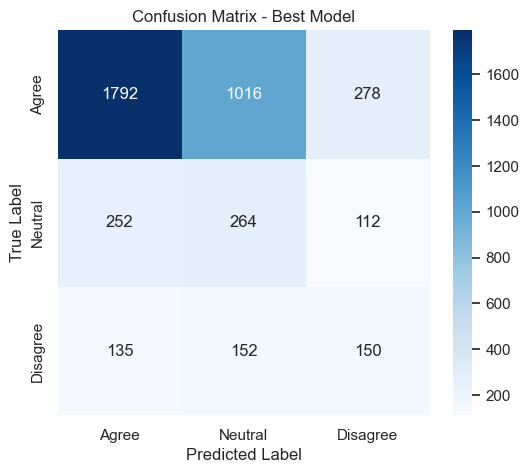

In [450]:
# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ============================================
# Load Dataset
# ============================================
X_train = pd.read_csv("train_full_models.csv")
X_test = pd.read_csv("test_full_models.csv")

y_train = pd.read_csv("train_transformed.csv")["inc_redist"]
y_test = pd.read_csv("test_transformed.csv")["inc_redist"]

# Convert labels from (1,2,3) → (0,1,2)
y_train = y_train - 1
y_test = y_test - 1

# One-hot encode the target variable
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

# ============================================
# Compute Class Weights Instead of SMOTE
# ============================================
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Class Weights:", class_weights_dict)

# ============================================
# Define Neural Network Model Function
# ============================================
def create_model(hp):
    learning_rate = hp.Float("learning_rate", min_value=0.0001, max_value=0.01, sampling="log")
    neurons = hp.Int("neurons", min_value=32, max_value=128, step=32)
    dropout_rate = hp.Float("dropout_rate", min_value=0.2, max_value=0.5, step=0.1)
    
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(dropout_rate),
        
        Dense(neurons * 2, activation='relu'),
        Dropout(dropout_rate),
        
        Dense(neurons, activation='relu'),
        Dropout(dropout_rate / 2),
        
        Dense(3, activation='softmax')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),  # Fix: Now correctly extracts float
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model


# ============================================
# Custom Wrapper to Fix `__sklearn_tags__` Issue
# ============================================
class FixedKerasClassifier(KerasClassifier):
    def __sklearn_tags__(self):
        return {"non_deterministic": True}

# ============================================
# Hyperparameter Tuning with KerasTuner
# ============================================
tuner = RandomSearch(
    create_model,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=2,  # Run each combination 2 times for stability
    directory='tuner_results',
    project_name='tune_nn'
)

tuner.search(X_train, y_train_cat, epochs=30, validation_split=0.2, batch_size=32)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:", best_hps.values)

# ============================================
# Train Final Model with Best Hyperparameters
# ============================================
best_model = tuner.hypermodel.build(best_hps)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = best_model.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    class_weight=class_weights_dict,  # Apply class weights
    callbacks=[early_stopping],
    verbose=1
)

# ============================================
# Evaluate the Model on Test Set
# ============================================
test_loss, test_acc = best_model.evaluate(X_test, y_test_cat, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

# Get predictions
y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Print Classification Report
print("\nFinal Classification Report:")
print(classification_report(y_true, y_pred))

# ============================================
# Confusion Matrix
# ============================================
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Agree", "Neutral", "Disagree"],
            yticklabels=["Agree", "Neutral", "Disagree"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best Model")
plt.show()


### 4-5 Final Model Performance & Interpretation
<a id="model-selection"></a>
#### 4-5-1 Final Model Performance 
<a id="final-model-training"></a>
Despite extensive fine-tuning efforts, no approach fully resolved the class imbalance issue. Each method presented trade-offs: LightGBM and ensemble models maintained higher accuracy but failed to adequately classify minority classes, while the neural network improved class balance at the expense of predictive power. Given these limitations, this section examines feature importance using **SHAP values** for the **LightGBM model** to investigate whether misclassification issues stem from feature selection rather than model limitations.

Loading Dataset...

⚡ Applying SMOTE and Training Initial LightGBM Models...
Training Initial LightGBM for Agree...
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Number of positive: 12433, number of negative: 12433
[LightGBM] [Info] Total Bins 7890
[LightGBM] [Info] Number of data points in the train set: 24866, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training Initial LightGBM for Neutral...
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Number of positive: 14205, number of negative: 14205

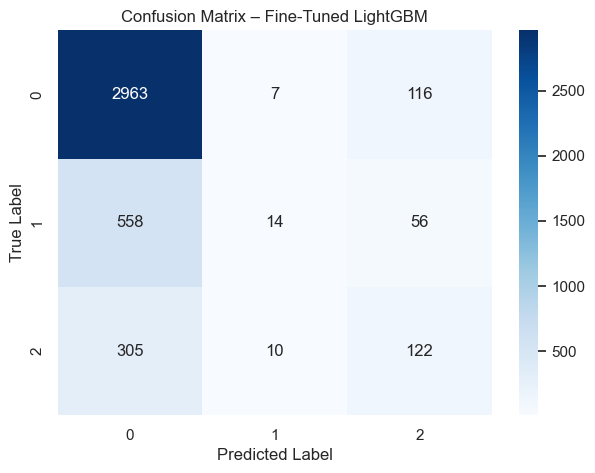

In [622]:
# =============================================
# Step 1: Import Required Libraries
# =============================================
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# =============================================
# Step 2: Load Dataset
# =============================================
print("Loading Dataset...")

X_train = pd.read_csv("train_full_models.csv")
X_test = pd.read_csv("test_full_models.csv")
train_full = pd.read_csv("train_transformed.csv")
test_full = pd.read_csv("test_transformed.csv")

# Load target variable
y_train = train_full["inc_redist"]
y_test = test_full["inc_redist"]

# Convert multi-class target to binary for One-vs-All (OvA)
ova_targets = {
    "Agree": ((y_train == 1).astype(int), (y_test == 1).astype(int)),
    "Neutral": ((y_train == 2).astype(int), (y_test == 2).astype(int)),
    "Disagree": ((y_train == 3).astype(int), (y_test == 3).astype(int)),
}

# =============================================
# Step 3: Train Initial LightGBM Models (Before Tuning)
# =============================================
print("\n⚡ Applying SMOTE and Training Initial LightGBM Models...")

models = {}
smote = SMOTE(sampling_strategy="auto", random_state=42)

for class_label, (y_train_binary, _) in ova_targets.items():
    print(f"Training Initial LightGBM for {class_label}...")

    # Apply SMOTE
    X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train_binary)

    # Train initial model with baseline parameters
    lgbm = lgb.LGBMClassifier(
        n_estimators=200, learning_rate=0.01, max_depth=10,
        num_leaves=31, min_child_samples=50,
        feature_fraction=0.7, force_row_wise=True, random_state=42
    )
    lgbm.fit(X_train_bal, y_train_bal)
    models[class_label] = lgbm

# =============================================
# Step 4: Cross-Validation to Check Model Stability
# =============================================
print("Performing Cross-Validation...")

cv_results = {}

for class_label, (y_train_binary, _) in ova_targets.items():
    print(f"Running Cross-Validation for {class_label}...")

    # Apply SMOTE
    X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train_binary)

    # Initialize LightGBM model
    lgbm = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.01, max_depth=10, random_state=42)

    # Perform cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = cross_val_score(lgbm, X_train_bal, y_train_bal, cv=cv, scoring='f1')
    accuracy_scores = cross_val_score(lgbm, X_train_bal, y_train_bal, cv=cv, scoring='accuracy')

    # Store mean & std deviation
    cv_results[class_label] = {
        "Mean F1-Score": f"{np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}",
        "Mean Accuracy": f"{np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}"
    }

# Print summary
cv_results_df = pd.DataFrame(cv_results).T
print("Cross-Validation Summary:")
print(cv_results_df)

# =============================================
# Step 5: Hyperparameter Tuning with Retraining
# =============================================
print("Performing Hyperparameter Tuning...")

param_dist = {
    "num_leaves": [20, 25, 30],  
    "learning_rate": [0.01, 0.05, 0.1],  
    "n_estimators": [100, 200, 300],  
    "max_depth": [5, 10],  
    "min_child_samples": [100, 200],  
    "colsample_bytree": [0.7, 0.8, 1.0],  
    "subsample": [0.7, 0.8, 1.0],  
}

best_models = {}

for class_label, (y_train_binary, _) in ova_targets.items():
    print(f"Fine-Tuning LightGBM for {class_label}...")

    # Apply SMOTE
    X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train_binary)

    # Perform RandomizedSearchCV
    random_search = RandomizedSearchCV(
        lgb.LGBMClassifier(random_state=42),
        param_distributions=param_dist, n_iter=10, cv=5,
        scoring="f1", n_jobs=-1, verbose=1, random_state=42
    )

    # Fit model
    random_search.fit(X_train_bal, y_train_bal)

    # Store best hyperparameters
    best_params = random_search.best_params_
    print(f"Best Parameters for {class_label}: {best_params}")

    # Retrain the model using the best parameters
    best_model = lgb.LGBMClassifier(**best_params, random_state=42)
    best_model.fit(X_train_bal, y_train_bal)
    best_models[class_label] = best_model

# =============================================
# Step 6: Compute Optimized Thresholds Before & After Fine-Tuning
# =============================================
def compute_best_threshold(y_test, y_prob):
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    f1_scores = (2 * precision * recall) / (precision + recall + 1e-9)
    return thresholds[np.argmax(f1_scores)]

best_thresholds = {}

for class_label, (_, y_test_binary) in ova_targets.items():
    # Compute optimized threshold
    y_prob = best_models[class_label].predict_proba(X_test)[:, 1]
    best_thresholds[class_label] = compute_best_threshold(y_test_binary, y_prob)

print("Optimized Thresholds:", best_thresholds)

# =============================================
# Step 7: Apply Optimized Thresholds to Final Prediction
# =============================================
print("Generating Final Predictions...")

y_pred_final = np.full(len(X_test), 2)  # Default to Neutral

y_pred_final[best_models["Agree"].predict_proba(X_test)[:, 1] >= best_thresholds["Agree"]] = 1
y_pred_final[best_models["Disagree"].predict_proba(X_test)[:, 1] >= best_thresholds["Disagree"]] = 3

final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Fine-Tuned Multi-Class Accuracy with Optimized Thresholds: {final_accuracy:.4f}")

# =============================================
# Step 8: Compute Confusion Matrix
# =============================================
print("Classification Report – Fine-Tuned LightGBM:")
print(classification_report(y_test, y_pred_final, target_names=["Agree", "Neutral", "Disagree"]))

cm_final = confusion_matrix(y_test, y_pred_final, labels=[1, 2, 3])

plt.figure(figsize=(7, 5))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Fine-Tuned LightGBM")
plt.show()



#### 4-5-2 Final Model Interpretation
<a id="model-interpretation"></a>

/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_39755/2419935755.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


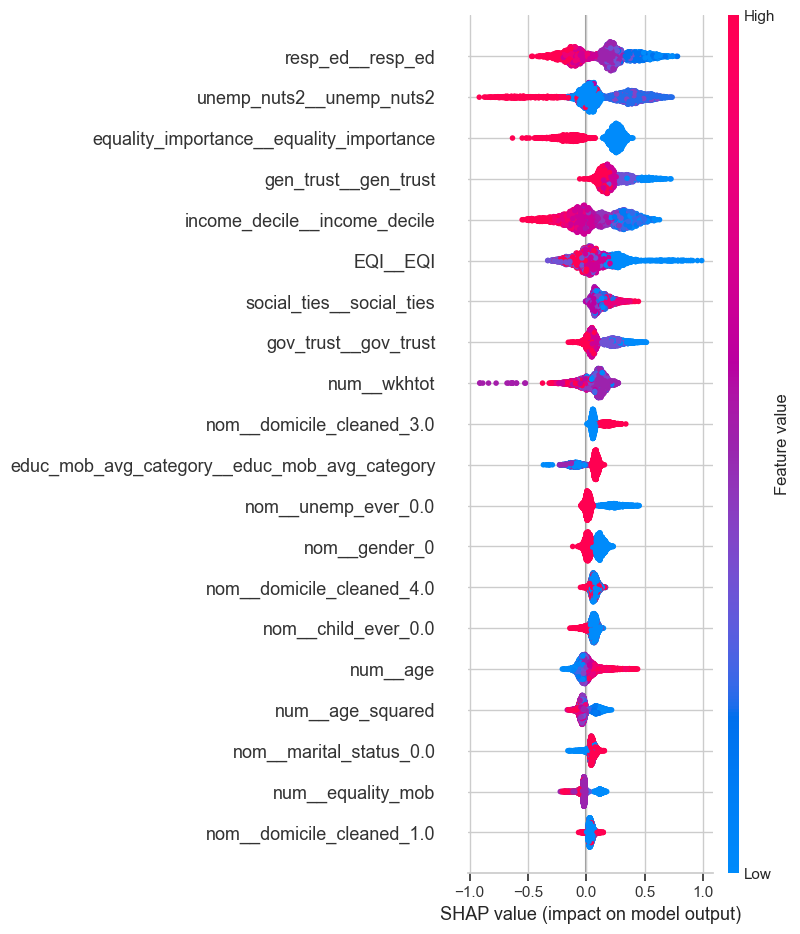

In [724]:
import shap
explainer = shap.Explainer(final_models["Agree"])  # Example for "Agree"
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_39755/177475072.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


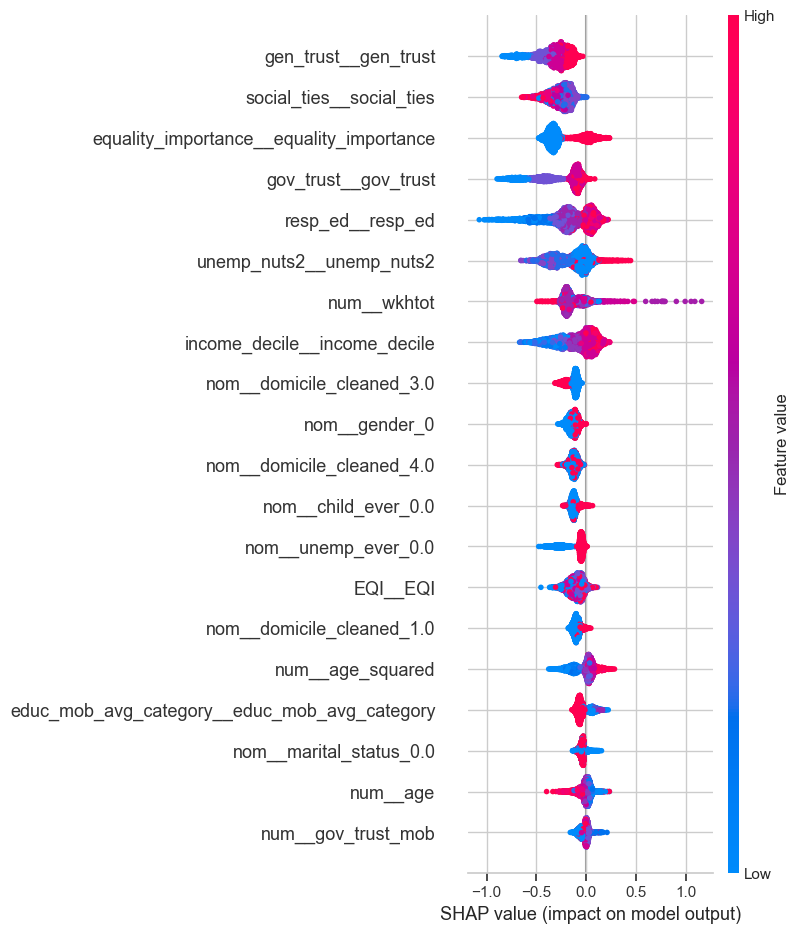

<Figure size 640x480 with 0 Axes>

In [708]:
import shap
explainer = shap.Explainer(final_models["Neutral"])  # Example for "Agree"
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_39755/813512082.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


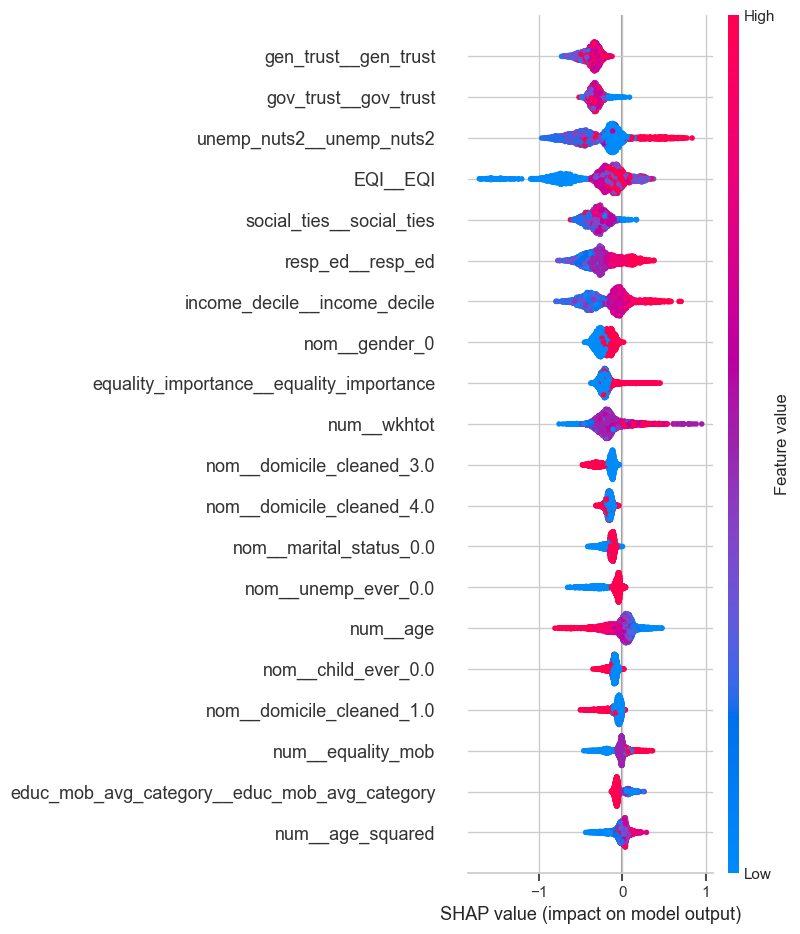

In [730]:
import shap
explainer = shap.Explainer(final_models["Disagree"])  # Example for "Agree"
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

In [718]:
import shap
explainer = shap.Explainer(final_models["Disagree"])  # Example for "Agree"
fig = shap.summary_plot(shap_values, X_test, show=False)  # Disable automatic display
plt.savefig("shap_summary_disagree.png", dpi=300, bbox_inches="tight")
plt.close()


/var/folders/8_/b04pl0w94mg7rjmbvrtzsd6w0000gn/T/ipykernel_39755/1880792622.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  fig = shap.summary_plot(shap_values, X_test, show=False)  # Disable automatic display


In [614]:
print(X_train.columns)  # Ensure this feature exists


Index(['num__age', 'num__wkhtot', 'num__gov_trust_mob', 'num__equality_mob',
       'num__age_squared', 'educ_mob_avg_category__educ_mob_avg_category',
       'gen_trust__gen_trust', 'gov_trust__gov_trust',
       'equality_importance__equality_importance',
       'income_decile__income_decile', 'resp_ed__resp_ed', 'EQI__EQI',
       'unemp_nuts2__unemp_nuts2', 'social_ties__social_ties', 'nom__gender_0',
       'nom__gender_1', 'nom__marital_status_0.0', 'nom__marital_status_1.0',
       'nom__marital_status_2.0', 'nom__marital_status_3.0',
       'nom__union_member_0.0', 'nom__union_member_1.0', 'nom__child_ever_0.0',
       'nom__child_ever_1.0', 'nom__domicile_cleaned_1.0',
       'nom__domicile_cleaned_2.0', 'nom__domicile_cleaned_3.0',
       'nom__domicile_cleaned_4.0', 'nom__domicile_cleaned_5.0',
       'nom__unemp_ever_0.0', 'nom__unemp_ever_1.0'],
      dtype='object')


Top Correlations with Educational Mobility:
educ_mob_avg_category__educ_mob_avg_category    1.000000
num__equality_mob                               0.769182
num__gov_trust_mob                              0.656444
resp_ed__resp_ed                                0.396628
income_decile__income_decile                    0.083154
gen_trust__gen_trust                            0.076523
EQI__EQI                                        0.069191
nom__union_member_1.0                           0.062733
nom__marital_status_0.0                         0.059536
gov_trust__gov_trust                            0.058620
Name: educ_mob_avg_category__educ_mob_avg_category, dtype: float64


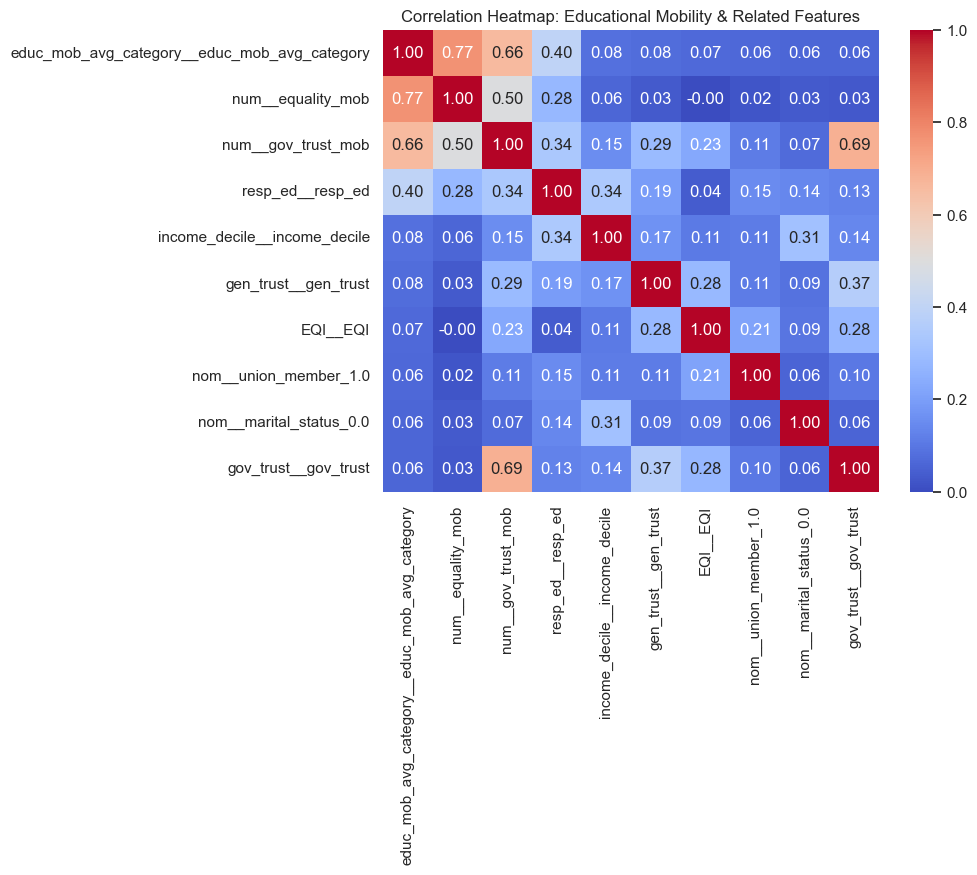

In [616]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = X_train.corr()

# Focus on educational mobility's correlation with other features
educ_mob_corr = correlation_matrix["educ_mob_avg_category__educ_mob_avg_category"].sort_values(ascending=False)

# Display top correlated features
print("Top Correlations with Educational Mobility:")
print(educ_mob_corr.head(10))  # Show top 10

# Plot correlation heatmap for top features
top_features = educ_mob_corr.index[:10]  # Select top correlated features
plt.figure(figsize=(8, 6))
sns.heatmap(X_train[top_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Educational Mobility & Related Features")
plt.show()


## 5. Discussion and Limitation
<a id="limitations"></a>
This analysis faced several challenges arising from both data constraints and methodological limitations.

#### Class Imbalance in the Dependent Variable

First, **class imbalance** in the dependent variable (`inc_redist`) posed a fundamental challenge. This reflects real-world attitudes, where redistributive policies often receive broad public endorsement. However, it also introduces methodological concerns, as standard machine learning models inherently favor the majority class, leading to poor recall for minority categories (Fernández et al., 2018). 

While resampling methods like **SMOTE** were tested, they introduced noise and disrupted class boundaries, particularly for the heterogeneous *Neutral* class. This suggests that synthetic oversampling may not be appropriate when the minority class lacks clear structure.

#### Feature Selection and Model Performance

Second, **feature selection** significantly shaped model performance. Although **educational mobility** was theoretically expected to drive redistributive preferences, **SHAP analysis** revealed that broader **socioeconomic factors**, such as **trust in institutions** and **perceptions of equality**, were more influential. 

This is supported by prior research suggesting that **macroeconomic structures** often shape attitudes more than individual mobility experiences (Alesina and Giuliano, 2011). The weak correlation between educational mobility and dominant predictors suggests that its impact may be **context-dependent** or mediated by unobserved factors. These results raise concerns about whether **key determinants** were missing from the dataset or inadequately captured.

#### Trade-off Between Accuracy and Class Balance

Third, a **persistent trade-off** between **overall accuracy** and **class balance** remained unresolved. **LightGBM** achieved the highest accuracy but struggled to predict *Neutral*, reinforcing the challenge of **classification threshold biases**. 

Alternative approaches, including **multi-model ensembles** and **neural networks**, sought to improve class balance through **F1-score optimization** and **class weighting**. However, these strategies often led to a decline in **overall accuracy**. This reflects a broader challenge in **multi-class classification**, where improving minority class representation often comes at the expense of overall predictive power (Alesina and Giuliano, 2011).

#### Future Research Directions

Future research should explore **alternative approaches** to mitigate these challenges:

- **Cost-sensitive learning** and **more nuanced resampling methods** could provide better balance than standard oversampling.
- **Improved feature selection**, incorporating **ideological beliefs, perceptions of inequality, or longitudinal data**, may enhance the model’s ability to capture redistributive attitudes.
- Finally, shifting from **traditional classification models** to **ordinal or latent variable approaches** could offer deeper insights into attitudinal shifts over time (Zhang and Zhou, 2014).. 
nwith more **flexible machine learning approaches**, such as **XGBoost** or **LightGBM**, while ensuring that **class imbalance** and **feature dominance** do not distort conclusions.



## 6. Conclusion
<a id="summary"></a>
Overall, this analysis demonstrated the potential of machine learning techniques in predicting redistributive preferences while highlighting the persistent challenges in modelling complex social attitudes. Despite extensive model tuning and feature selection, class imbalance and structural limitations in the data constrained predictive performance, particularly for minority classes. These findings suggest that improving classification accuracy may require not only methodological refinements but also a reassessment of the theoretical constructs and data representation used to capture redistributive attitudes. Future work should explore alternative modelling frameworks, more nuanced feature selection, and approaches that balance interpretability with predictive power to enhance understanding in this domain.

## 7. References
<a id="references"></a>

- Alesina, A. & Giuliano, P. (2011). *Preferences for Redistribution*. Handbook of Social Economics, 1(1), pp. 93–131.

- Alesina, A. & La Ferrara, E. (2005). *Preferences for redistribution in the land of opportunities*. Journal of Public Economics, 89(5-6), pp. 897–931.

- Brownlee, J. (2020). *How to Avoid Data Leakage When Performing Data Preparation*. [Machine Learning Mastery](https://www.machinelearningmastery.com/data-preparation-without-data-leakage/). *(Accessed: 18 Mar. 2025)*

- Charron, N., Lapuente, V., Bauhr, M. & Annoni, P. (2022). *Cambio y Continuidad en la Calidad de Gobierno*. Journal of Regional Research - Investigaciones Regionales, 53(2). [DOI](https://doi.org/10.38191/iirr-jorr.22.008)

- Chetty, R., Hendren, N., Kline, P. & Saez, E. (2014). *Where is the land of opportunity? The geography of intergenerational mobility in the United States*. The Quarterly Journal of Economics, 129(4), pp. 1553–1623. [Link](https://academic.oup.com/qje/article-abstract/129/4/1553/1853754)

- Corneo, G. & Gruner, H.P. (2002). *Individual preferences for political redistribution*. Journal of Public Economics, 83(1), pp. 83–107.

- Dormann, C.F. et al. (2013). *Collinearity: a review of methods to deal with it and a simulation study evaluating their performance*. Ecography, 36(1), pp. 27–46. [DOI](https://doi.org/10.1111/j.1600-0587.2012.07348.x)

- Dotti, N.F., Fratesi, U. & Lenzi, C. (2021). *The urban–rural education gap: do cities indeed make us smarter?* Journal of Economic Geography, 21(5), pp. 683–704. [Link](https://academic.oup.com/joeg/article/21/5/683/5998980)

- European Social Survey (ESS), 2024. *ESS10 Multilevel Data, edition 1.0*. [ESS Data Portal](https://ess.sikt.no/en/datafile/1ae049b3-0bc3-408e-91a0-0546b2d02cce/35?tab=0)

- Fernández, A., García, S., Galar, M., Prati, R.C., Krawczyk, B. & Herrera, F. (2018). *Learning from Imbalanced Data Sets*. Springer. [DOI](https://doi.org/10.1007/978-3-319-98074-4)

- He, H. & Garcia, E.A. (2009). *Learning from imbalanced data*. IEEE Transactions on Knowledge and Data Engineering, 21(9), pp. 1263–1284. [DOI](https://doi.org/10.1109/TKDE.2008.239)

- Helliwell, J.F. & Putnam, R.D. (1995). *Economic growth and social capital in Italy*. Eastern Economic Journal, 21(3), pp. 295–307. [JSTOR](https://www.jstor.org/stable/40325895)

- Jerrim, J. & Macmillan, L. (2015). *Income inequality, intergenerational mobility, and the Great Gatsby Curve: Is education the key?* Social Forces, 94(2), pp. 505–533.

- Khan, A.A. (2022). *Balanced Split: A new train-test data splitting strategy for imbalanced datasets*. [arXiv](https://doi.org/10.48550/arxiv.2212.11116)

- Ohtake, F. & Tomioka, J. (2004). *Who Supports Redistribution?* The Japanese Economic Review, 55(4), pp. 333–354.

- Piketty, T. (1995). *Social Mobility and Redistributive Politics*. The Quarterly Journal of Economics, 110(3), pp. 551–584.

- Roemer, J.E. (1998). *Equality of Opportunity*. Cambridge, MA: Harvard University Press.

- Zhang, M.L. & Zhou, Z.H. (2014). *A review on multi-label learning algorithms*. IEEE Transactions on Knowledge and Data Engineering, 26(8), pp. 1819–1837. [DOI](https://doi.org/10.1109/TKDE.2013.39)
109/TKDE.2013.39


## 8. Appendix
<a id="appendix"></a>

### 8-1. Table
<a id="table"></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Data for the table
data = {
    "ISCED LEVEL": [0, 1, 2, 3, 4, 5, 6],
    "NUMERICAL VALUES USED and DEFINITION": [
        "Less than Lower Secondary School",
        "Lower Secondary School",
        "Low-tier Upper Secondary",
        "Upper-tier Upper Secondary",
        "Advanced, non-university",
        "Bachelor’s Degree",
        "Master’s Degree or above",
    ],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 3))  # Adjust figure size as needed
ax.axis("tight")
ax.axis("off")

# Create the table
table(ax, df, loc="center", colWidths=[0.2, 0.7])  # Adjust column width as needed

# Add title
plt.title("Table 8-3: Educational Level (ISCED) applicable to respondent and parents, used to build variable of interest", fontsize=10)

# Save the table as an image (optional)
plt.savefig("educational_level_table.png", bbox_inches="tight", dpi=300)

# Show the table
plt.show()